In [ ]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/IPG2211A2N.csv",index_col="DATE",parse_dates=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2000-01-01 to 2022-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  270 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [ ]:
data.head()

IPG2211A2N
DATE                  
2000-01-01    100.9623
2000-02-01     93.1065
2000-03-01     87.0234
2000-04-01     80.4433
2000-05-01     83.4549

In [ ]:
#Monthly
data_columns=['IPG2211A2N']
#Resample to monthly frequency,aggregating with mean
data_monthly=data[data_columns].resample('M').sum()
data_monthly.head(3)
#the values which we got is mean of monthly values

IPG2211A2N
DATE                  
2000-01-31    100.9623
2000-02-29     93.1065
2000-03-31     87.0234

In [ ]:
data.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', name='DATE', length=270, freq=None)

We see that the start date is 2000-01-01 and end date is 2022-06-01.

In [ ]:
des=data.describe()
des.T

count       mean      std      min      25%      50%         75%  \
IPG2211A2N  270.0  99.086449  9.77124  80.4433  90.7697  98.9574  106.790925   

                 max  
IPG2211A2N  126.5273

In [ ]:
data_monthly.mean()

IPG2211A2N    99.086449
dtype: float64

In [ ]:
data_monthly.median()

IPG2211A2N    98.9574
dtype: float64

In [ ]:
data_monthly.min()

IPG2211A2N    80.4433
dtype: float64

In [ ]:
data_monthly.max()

IPG2211A2N    126.5273
dtype: float64

In [ ]:
# calculate quartiles
from numpy import percentile
quartiles = percentile(data, [25, 50, 75])

In [ ]:
#Printing 5-number summary:
print("The 5-number summary is:")
print("Min is:",data_monthly.min())
print("Max is:",data_monthly.max())
print("Median is:",data_monthly.median())
print("Q1 is:",quartiles[0])
print("Q3 is:",quartiles[2])

The 5-number summary is:
Min is: IPG2211A2N    80.4433
dtype: float64
Max is: IPG2211A2N    126.5273
dtype: float64
Median is: IPG2211A2N    98.9574
dtype: float64
Q1 is: 90.7697
Q3 is: 106.790925


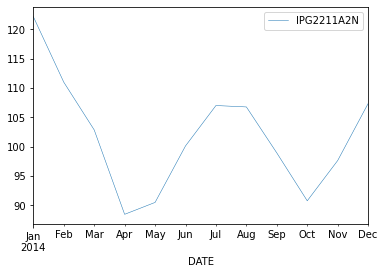

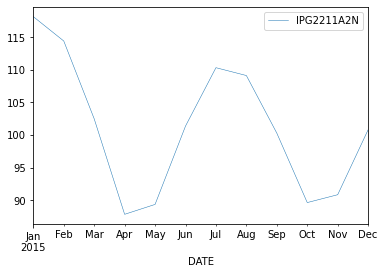

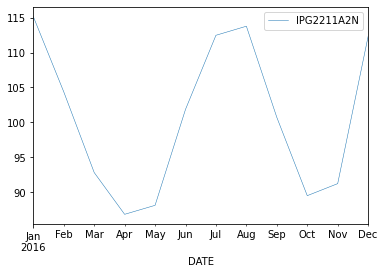

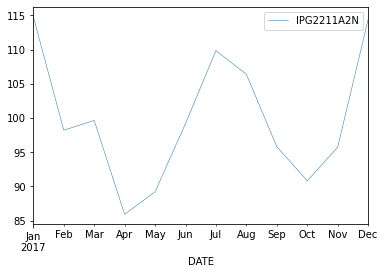

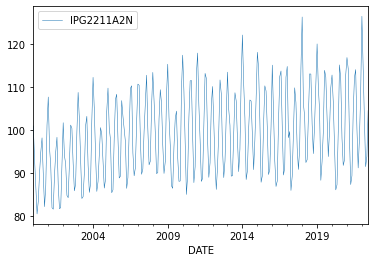

In [ ]:
#Plotting montly sales of the years 2014-2017
cols_plot = ['IPG2211A2N']
data_monthly.loc['2014'][cols_plot].plot(linewidth=0.5);
data_monthly.loc['2015'][cols_plot].plot(linewidth=0.5);
data_monthly.loc['2016'][cols_plot].plot(linewidth=0.5);
data_monthly.loc['2017'][cols_plot].plot(linewidth=0.5);
data_monthly[cols_plot].plot(linewidth=0.5);

## Decomposition of a time series into its components(trend, seasonality,noise):

You can do a classical decomposition of a time series by considering
the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The __seasonal_decompose__ in __statsmodels__ implements this conveniently.

visualize our data using a method called time-series decomposition that allows us to decompose our time series into 3 distinct components:
    - trend,
    - seasonality, and
    - noise.

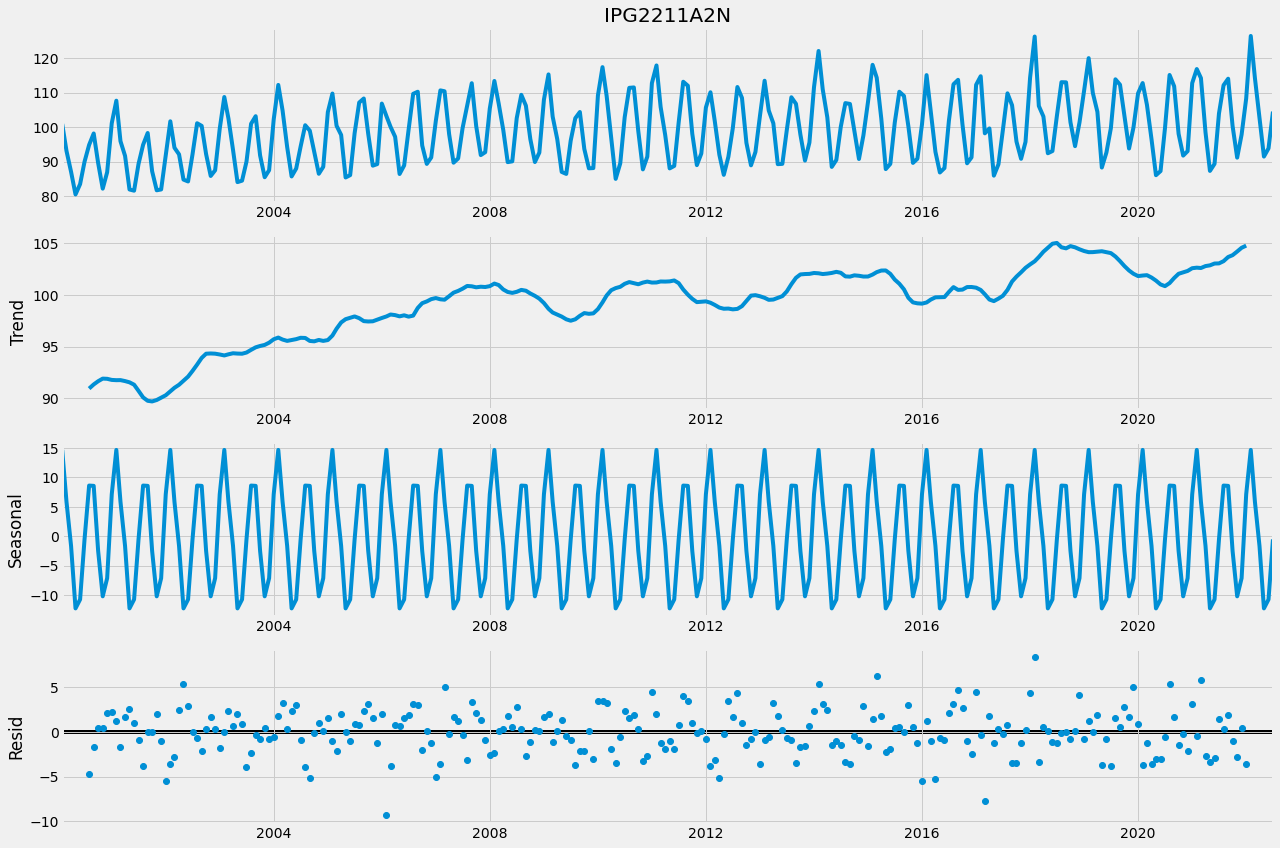

In [ ]:
# Additive Decomposition

rcParams['figure.figsize'] = 18, 12

result_additive = seasonal_decompose(data_monthly['IPG2211A2N'],
                                     model='additive')

fig = result_additive.plot()

Interpretation:We can see that there is an increasing trend and also some noise.

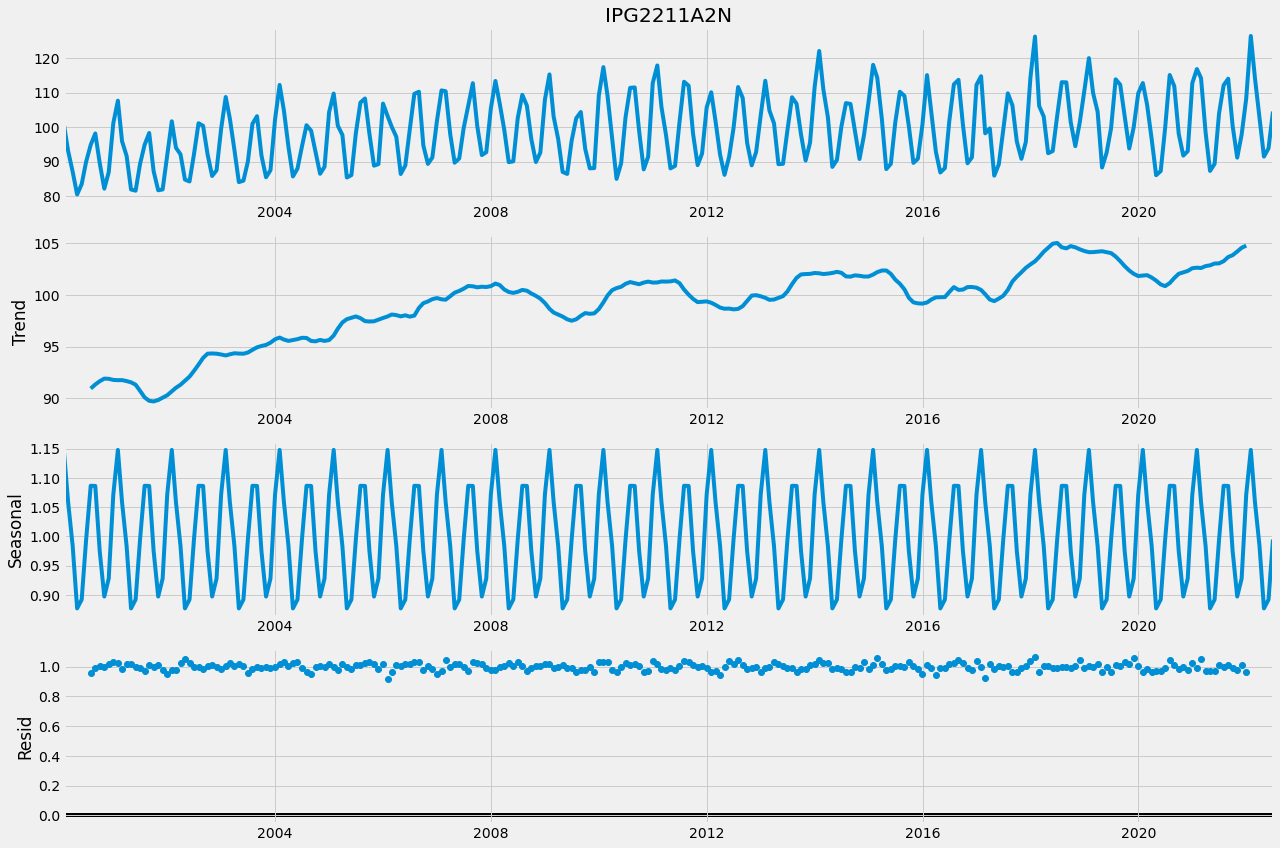

In [ ]:
# Multiplicative Decomposition

rcParams['figure.figsize'] = 18, 12

result_additive = seasonal_decompose(data_monthly['IPG2211A2N'],
                                     model='multiplicative')

fig = result_additive.plot()

In [ ]:
Interpretation:
    By decomposing the time series,we can see that there is seasonality =>time series is not stationary.

c) Set the frequency of 'MS' to the DatetimeIndex and plot the dataset.

In [ ]:
data.index.freq='MS'#frequency taken in terms of months
#MS-Month Start frequency

In [ ]:
data

IPG2211A2N
DATE                  
2000-01-01    100.9623
2000-02-01     93.1065
2000-03-01     87.0234
2000-04-01     80.4433
2000-05-01     83.4549
...                ...
2022-02-01    114.3064
2022-03-01    102.7847
2022-04-01     91.4574
2022-05-01     93.8531
2022-06-01    104.5378

[270 rows x 1 columns]

<AxesSubplot:xlabel='DATE'>

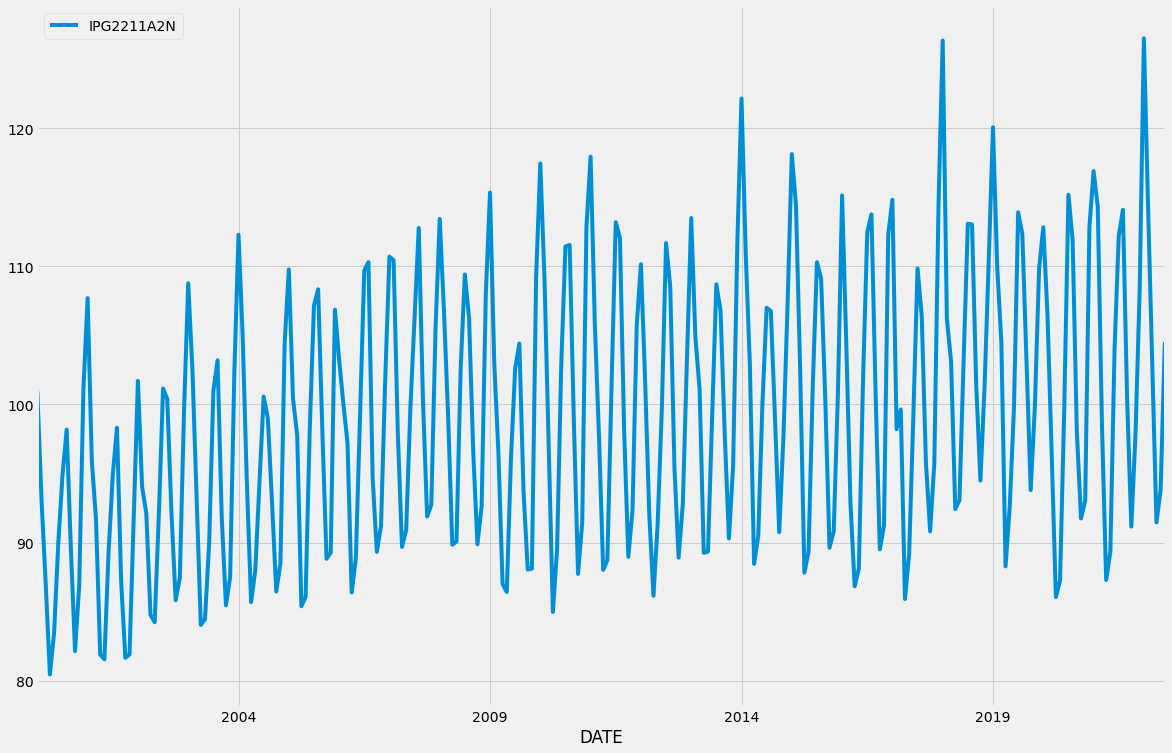

In [ ]:
data.plot()

d) Add a new variable that shows a 12-month Simple Moving Average (SMA) and plot the results.

In [ ]:
#rolling mean or simple moving average(SMA)-the first mean will be 1 year only,
#the 2nd mean will be for 2 years from start year,
#the 3rd mean will be for 3 years from start year
data['12-month-SMA']=data['IPG2211A2N'].rolling(window=12).mean()
#adding new column '12-month-SMA' which consists of SMA.
#Window=12 bcoz we want mean for 12 months

<AxesSubplot:xlabel='DATE'>

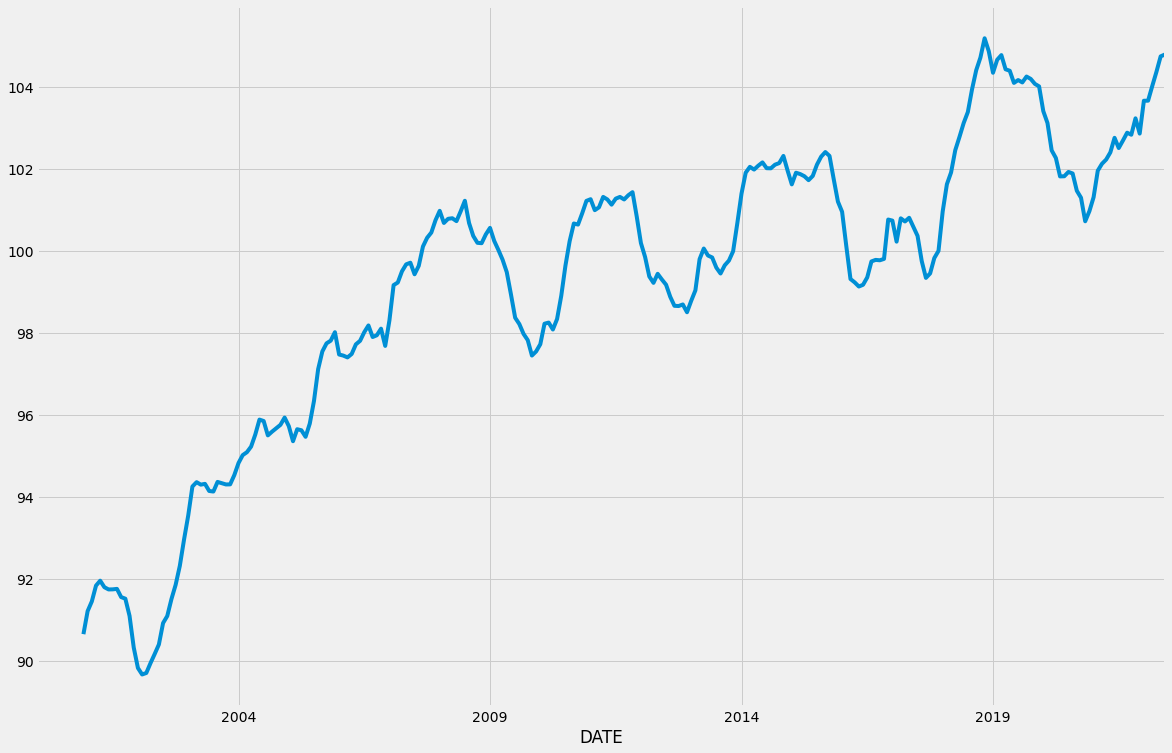

In [ ]:
data['12-month-SMA'].plot()

Interpretation:We see that mean varies here.

e) Add a column that shows an Exponentially Weighted Moving Average (EWMA) with
a span of 12 and plot the result.

# Exponentially Weighted Moving Average
EWMA stands for Exponentially Weighted Moving Average. It processes data in such a way that it gives less importance and weightage to the data which is further past in time.
So it gives more weightage to the data that is recent.

In [ ]:
data['12EWMA'] = data['IPG2211A2N'].ewm(span=12).mean()

In [ ]:
data['12EWMA']

DATE
2000-01-01    100.962300
2000-02-01     96.707075
2000-03-01     92.927534
2000-04-01     88.986749
2000-05-01     87.483766
                 ...    
2022-02-01    107.219572
2022-03-01    106.537284
2022-04-01    104.217302
2022-05-01    102.622809
2022-06-01    102.917423
Freq: MS, Name: 12EWMA, Length: 270, dtype: float64

<AxesSubplot:xlabel='DATE'>

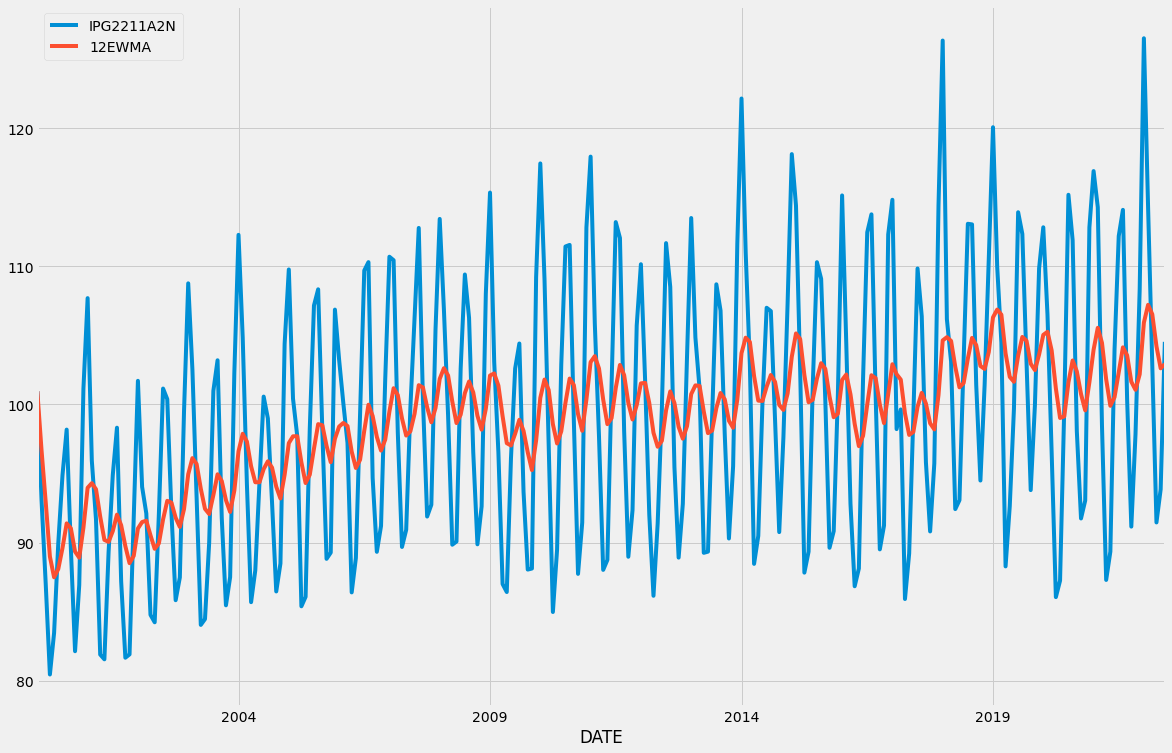

In [ ]:
data[['IPG2211A2N','12EWMA']].plot()

#Check for stationarity using Augmented-Dickey Fuller Test

# Test for stationarity-
    A time series is stationary if the mean and variance are fixed between any 2 equidistant points.No matter where u take the observation,the mean and variance should be same.
    A time series that shows seasonality is not stationary since it is cyclic,it cannot have same mean and variance.

# A test for stationarity involves unit root hypothesis test
Ho:Null hypothesis:The series is non-stationary and it contains a unit root.
H1:Alternative hypothesis:Supports stationarity.

In [ ]:
from statsmodels.tsa.stattools import ccovf,ccf
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [ ]:
print("Augmented Dickey-Fuller Test ")
dftest=adfuller(data['IPG2211A2N'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test 


(-1.6877894365810484,
 0.4374144529407894,
 13,
 256,
 {'1%': -3.4561550092339512,
  '5%': -2.8728972266578676,
  '10%': -2.5728222369384763},
 1321.339712632158)

print("Augmented Dickey-Fuller Test ")
dfout=pd.Series(dftest[0:4],index=['ADF test statistics','p-value','#lags used','#Observations used'])
for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
#f means critical value of f-distribution
print(dfout)

Conclusion:We get p=0.43>0.05=>Ho is accepted.=>Data is non-stationary=>Seasonal data

Double Exponential Smoothing/Holt's Method:
  This method takes trend into account.Forecast cast is still a straight line extending from the most recent value but it has a slope.
Triple Exponential Smoothing/Holt-Winters Method:
  The model has the best forecast as it takes seasonality into account.Regular fluctuations in the future is expected.
  This model attempts to map the seasonal behaviour.    

In [ ]:
#Train and test split
#use upto 230 rows for train and rest data for test
train_data=data.iloc[:231]
test_data=data.iloc[230:]

In [ ]:
#Fitting the model:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit_model=ExponentialSmoothing(train_data['IPG2211A2N'],
                               trend='mul',seasonal='mul',seasonal_periods=12).fit()
#mul stands for seasonality factor-either additive or multiplicative,add,multiple

In [ ]:
test_predictions=fit_model.forecast(40).rename('Forecast')
test_predictions

2019-04-01     92.900260
2019-05-01     94.501143
2019-06-01    105.124403
2019-07-01    114.472747
2019-08-01    114.651781
2019-09-01    103.042482
2019-10-01     94.890550
2019-11-01     98.006514
2019-12-01    113.500389
2020-01-01    121.910788
2020-02-01    112.012730
2020-03-01    104.592331
2020-04-01     93.637100
2020-05-01     95.250682
2020-06-01    105.958200
2020-07-01    115.380691
2020-08-01    115.561144
2020-09-01    103.859767
2020-10-01     95.643177
2020-11-01     98.783855
2020-12-01    114.400620
2021-01-01    122.877726
2021-02-01    112.901162
2021-03-01    105.421908
2021-04-01     94.379786
2021-05-01     96.006165
2021-06-01    106.798610
2021-07-01    116.295836
2021-08-01    116.477721
2021-09-01    104.683533
2021-10-01     96.401773
2021-11-01     99.567362
2021-12-01    115.307991
2022-01-01    123.852334
2022-02-01    113.796640
2022-03-01    106.258064
2022-04-01     95.128361
2022-05-01     96.767640
2022-06-01    107.645686
2022-07-01    117.218239


In [ ]:
len(test_data)

40

In [ ]:
len(test_predictions)

40

train_data['IPG2211A2N'].plot(legend=True,label='TRAIN')
test_data['IPG2211A2N'].plot(legend=True,label='TEST',figsize=(10,12))

<AxesSubplot:xlabel='DATE'>

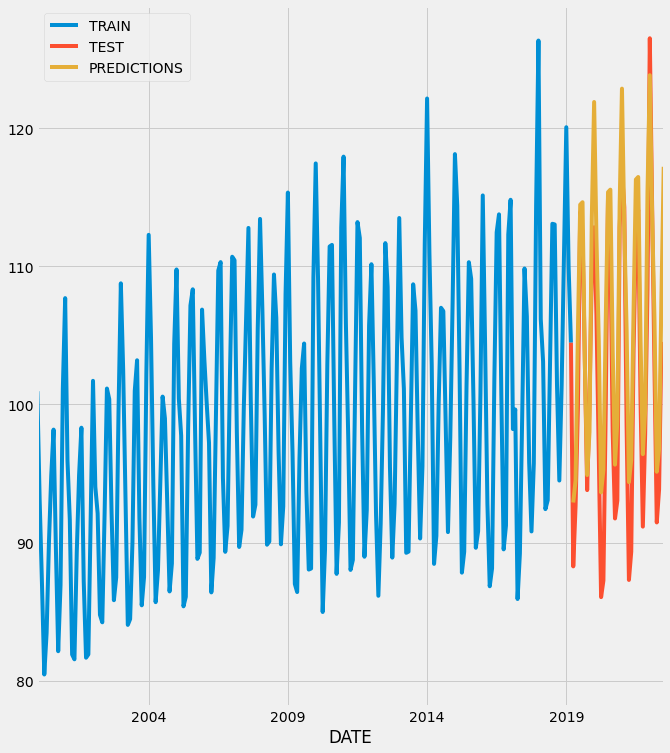

In [ ]:
train_data['IPG2211A2N'].plot(legend=True,label='TRAIN')
test_data['IPG2211A2N'].plot(legend=True,label='TEST',figsize=(10,12))
test_predictions.plot(legend=True,label='PREDICTIONS')

Interpretation:We see that predicted values are nearly equal to the actual values.


Given the dataset “Superstore.xlsx”,
Forecast the sales of the following categories
1. Office Sales
2. Technology
by performing the tasks given below.
a) Check the stationarity using simple moving average and statistical hypothesis test.

b) Determine the order of differencing, d.
c) Determine the order p for autoregressive process ΑR(p).
d) Determine the order q for moving averages MA(q).
e) Fit ARIMA (p, d, q) using Q.4.b, 4.c, and 4.d and report the results with accuracy
metrics.

In [ ]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [ ]:
import pandas as pd

In [ ]:
#Read the dataset and store it in a variable
data=pd.read_excel("/content/Superstore.xls")

In [ ]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
#Shape of the dataset
data.shape

(9994, 21)

In [ ]:
#Unique values and their count in Category column
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Considering Office Supplies category:

In [ ]:
#Get the rows with Category "Office Supplies"
OfficeSupplies=data.loc[data['Category']=='Office Supplies']
OfficeSupplies

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
6          7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
8          9  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
9         10  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9982    9983  US-2016-157728 2016-09-22 2016-09-28  Standard Class   
9984    9985  CA-2015-100251 2015-05-17 2015-05-23  Standard Class   
9985    9986  CA-2015-100251 2015-05-17 2015-05-23  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
6       BH-11710   Brosina Hoffman   Consumer  United States      Los Angeles   
8       BH-11710   Brosina Hoffman   Consumer  United States      Los Angeles   
9       BH-11710   Brosina Hoffman   Consumer  United States      Los Angeles   
...          ...               ...        ...            ...              ...   
9982    RC-19960        Ryan Crowe   Consumer  United States     Grand Rapids   
9984    DV-13465  Dianna Vittorini   Consumer  United States       Long Beach   
9985    DV-13465  Dianna Vittorini   Consumer  United States       Long Beach   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code   Region       Product ID         Category Sub-Category  \
2     ...       90036     West  OFF-LA-10000240  Office Supplies       Labels   
4     ...       33311    South  OFF-ST-10000760  Office Supplies      Storage   
6     ...       90032     West  OFF-AR-10002833  Office Supplies          Art   
8     ...       90032     West  OFF-BI-10003910  Office Supplies      Binders   
9     ...       90032     West  OFF-AP-10002892  Office Supplies   Appliances   
...   ...         ...      ...              ...              ...          ...   
9982  ...       49505  Central  OFF-PA-10002195  Office Supplies        Paper   
9984  ...       11561     East  OFF-LA-10003766  Office Supplies       Labels   
9985  ...       11561     East  OFF-SU-10000898  Office Supplies     Supplies   
9992  ...       92627     West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...       92683     West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name    Sales  Quantity  \
2     Self-Adhesive Address Labels for Typewriters b...   14.620         2   
4                        Eldon Fold 'N Roll Cart System   22.368         2   
6                                            Newell 322    7.280         4   
8     DXL Angle-View Binders with Locking Rings by S...   18.504         3   
9                      Belkin F5C206VTEL 6 Outlet Surge  114.900         5   
...                                                 ...      ...       ...   
9982  RSVP Cards & Envelopes, Blank White, 8-1/2" X ...   35.560         7   
9984                     Self-Adhesive Removable Labels   31.500        10   
9985  Acme Hot Forged Carbon Steel Scissors with Nic...   55.600         4   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.600         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.160         2   

      Discount   Profit  
2          0.0   6.8714  
4          0.2   2.5164  
6          0.0   1.9656  
8          0.2   5.7825  
9          0.0  34.4700  
...        ...      ...  
9982       0.0  16.7132  
9984       0.0  15.1200  
9985       0.0  16.1240  
9992       0.0  13.320

In [ ]:
#Fetch the range of dates in which order is placed
#for the category "Office Supplies"
OfficeSupplies['Order Date'].min(),OfficeSupplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

DATA EXPLORATION

In [ ]:
OfficeSupplies.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# columns to drop
cols = ['Row ID',
        'Order ID',
        'Ship Date',
        'Ship Mode',
        'Customer ID',
        'Customer Name',
        'Segment',
        'Country',
        'City',
        'State',
        'Postal Code',
        'Region',
        'Product ID',
        'Category',
        'Sub-Category',
        'Product Name',
        'Quantity',
        'Discount',
        'Profit']

In [ ]:
OfficeSupplies.drop(cols,axis=1,inplace=True)

In [ ]:
OfficeSupplies

Order Date    Sales
2    2016-06-12   14.620
4    2015-10-11   22.368
6    2014-06-09    7.280
8    2014-06-09   18.504
9    2014-06-09  114.900
...         ...      ...
9982 2016-09-22   35.560
9984 2015-05-17   31.500
9985 2015-05-17   55.600
9992 2017-02-26   29.600
9993 2017-05-04  243.160

[6026 rows x 2 columns]

In [ ]:
#Check for null values
OfficeSupplies.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
#Check if more than 1 sales data is there for a date
#First group by the order date and check sales.
temp=OfficeSupplies.groupby('Order Date')['Sales'].size()

In [ ]:
temp[temp>1].sort_values(ascending=False)

Order Date
2017-12-09    25
2016-11-10    25
2016-09-05    24
2017-12-02    22
2017-09-02    22
              ..
2017-06-27     2
2015-08-15     2
2017-07-02     2
2016-10-22     2
2017-03-07     2
Name: Sales, Length: 987, dtype: int64

In [ ]:
#Aggregate sales by date
OfficeSupplies=OfficeSupplies.groupby('Order Date')['Sales'].sum().reset_index()
OfficeSupplies

Order Date     Sales
0    2014-01-03    16.448
1    2014-01-04   288.060
2    2014-01-05    19.536
3    2014-01-06   685.340
4    2014-01-07    10.430
...         ...       ...
1143 2017-12-26   814.594
1144 2017-12-27    13.248
1145 2017-12-28  1091.244
1146 2017-12-29   282.440
1147 2017-12-30   299.724

[1148 rows x 2 columns]

In [ ]:
#Set the index as date
OfficeSupplies=OfficeSupplies.set_index('Order Date')
OfficeSupplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [ ]:
#Take 10 samples from the indexed data
OfficeSupplies.sample(10)

Sales
Order Date          
2015-07-02   607.284
2014-02-20    12.960
2015-04-05   877.886
2017-04-22   675.060
2014-12-30   774.611
2016-03-21    17.904
2015-10-19  1715.140
2014-10-29    75.880
2017-11-24  2832.945
2014-01-03    16.448

<AxesSubplot:xlabel='Order Date'>

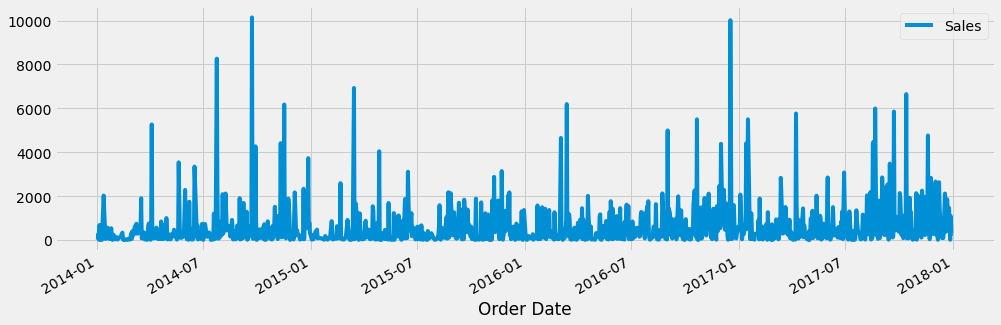

In [ ]:
OfficeSupplies.plot()

In [ ]:
#Add few more columns to OfficeSupplies containing year,month and weekday name
OfficeSupplies['Year']=pd.DatetimeIndex(OfficeSupplies.index).year
OfficeSupplies['Month']=pd.DatetimeIndex(OfficeSupplies.index).month
OfficeSupplies['Day Name']=pd.DatetimeIndex(OfficeSupplies.index).day_name()
OfficeSupplies

Sales  Year  Month   Day Name
Order Date                                  
2014-01-03    16.448  2014      1     Friday
2014-01-04   288.060  2014      1   Saturday
2014-01-05    19.536  2014      1     Sunday
2014-01-06   685.340  2014      1     Monday
2014-01-07    10.430  2014      1    Tuesday
...              ...   ...    ...        ...
2017-12-26   814.594  2017     12    Tuesday
2017-12-27    13.248  2017     12  Wednesday
2017-12-28  1091.244  2017     12   Thursday
2017-12-29   282.440  2017     12     Friday
2017-12-30   299.724  2017     12   Saturday

[1148 rows x 4 columns]

In [ ]:
#display a random sample of 5 rows
OfficeSupplies.sample(5,random_state=0)

Sales  Year  Month   Day Name
Order Date                                  
2017-05-12   554.654  2017      5     Friday
2017-08-23   219.664  2017      8  Wednesday
2017-12-01  1371.450  2017     12     Friday
2017-04-09  1626.710  2017      4     Sunday
2015-09-16    31.120  2015      9  Wednesday

<AxesSubplot:xlabel='Order Date'>

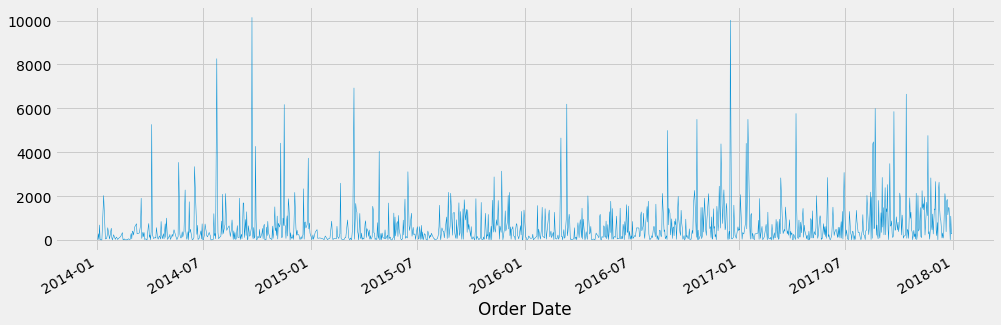

In [ ]:
# create a line plot of the full time series of daily sales,
OfficeSupplies['Sales'].plot(linewidth=0.5)

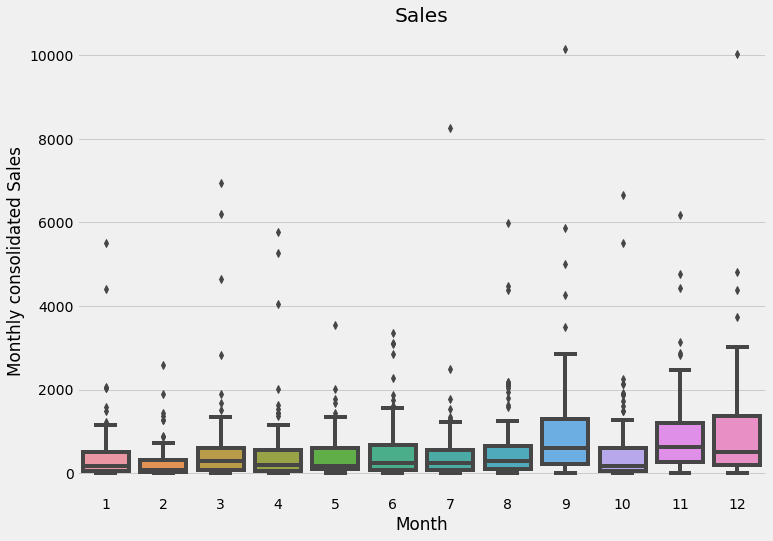

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=OfficeSupplies, x='Month', y='Sales', ax=ax)

ax.set_title('Sales')

ax.set_ylabel('Monthly consolidated Sales');

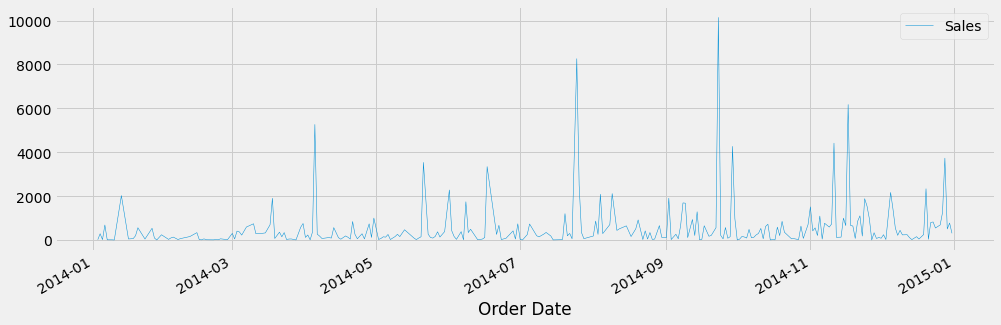

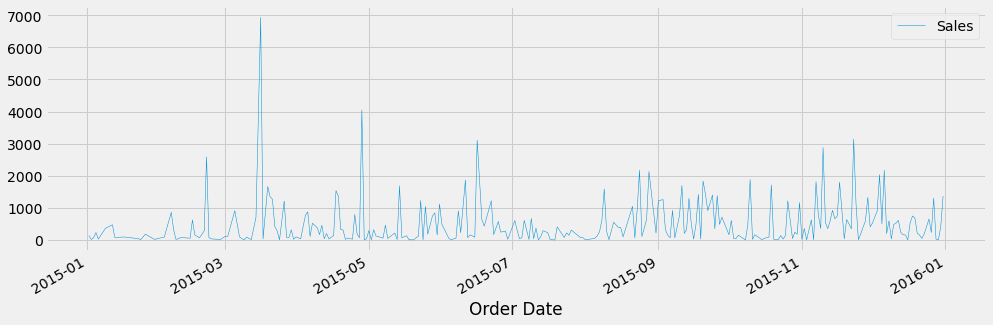

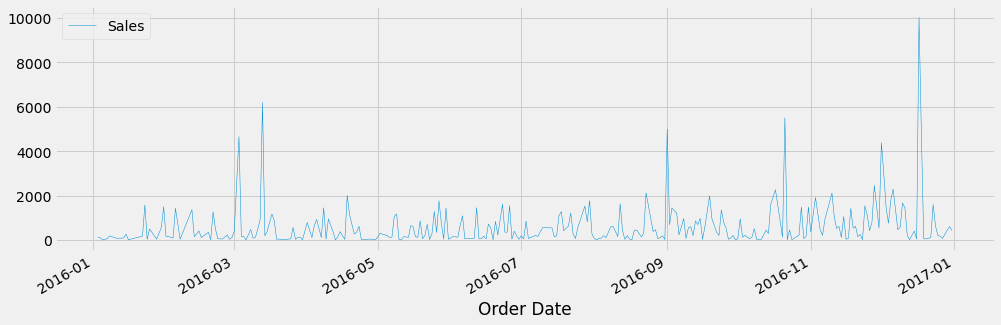

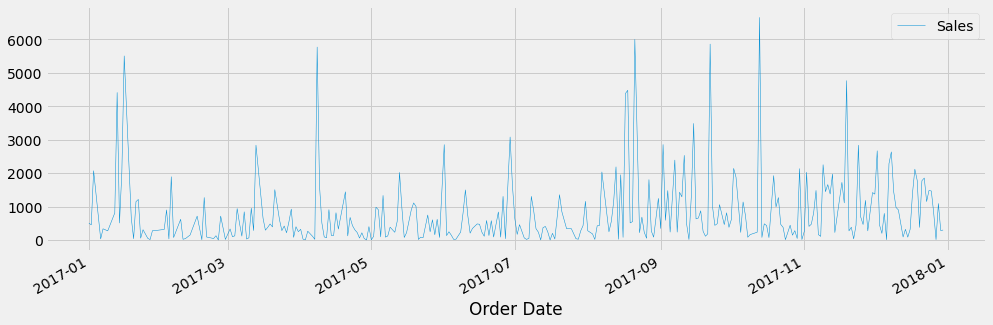

In [ ]:
#Visualizing yearly sales
cols_plot=['Sales']
OfficeSupplies.loc['2014'][cols_plot].plot(linewidth=0.5);
OfficeSupplies.loc['2015'][cols_plot].plot(linewidth=0.5);
OfficeSupplies.loc['2016'][cols_plot].plot(linewidth=0.5);
OfficeSupplies.loc['2017'][cols_plot].plot(linewidth=0.5);

Interpretation: The trend is not obvious from the above plots. There seems an indication of seasonality at the end of years 2014,2015,2017 where the sales decreases.

In [ ]:
#Weekly sales
data_columns=['Sales']
#Resample to weekly frequency,aggregating with mean
OfficeSupplies_weekly=OfficeSupplies[data_columns].resample('W').sum()
OfficeSupplies_weekly
#the values which we got is mean of weekly sales

Sales
Order Date           
2014-01-05    324.044
2014-01-12    708.004
2014-01-19   2337.764
2014-01-26   1143.170
2014-02-02    368.784
...               ...
2017-12-03   7361.490
2017-12-10   8338.718
2017-12-17   3119.328
2017-12-24  10527.387
2017-12-31   3966.515

[209 rows x 1 columns]

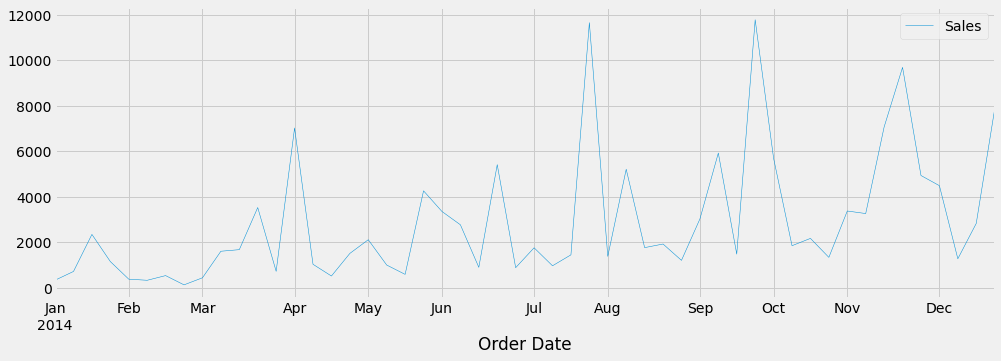

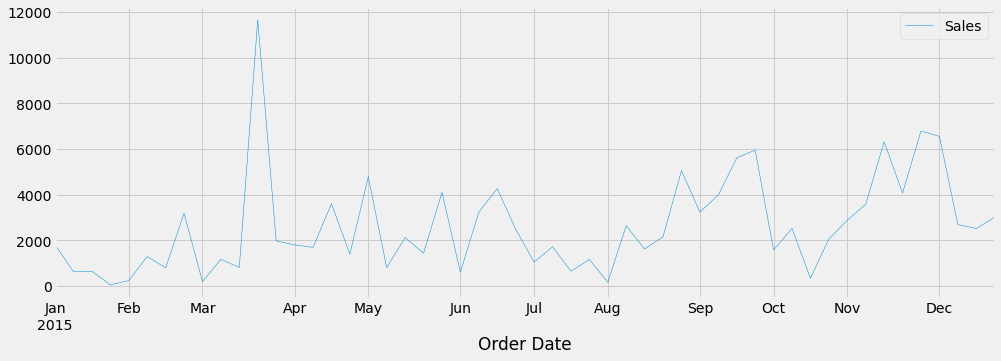

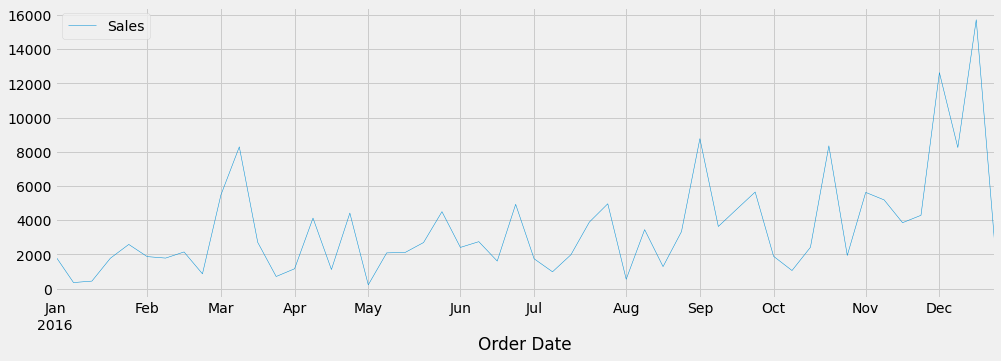

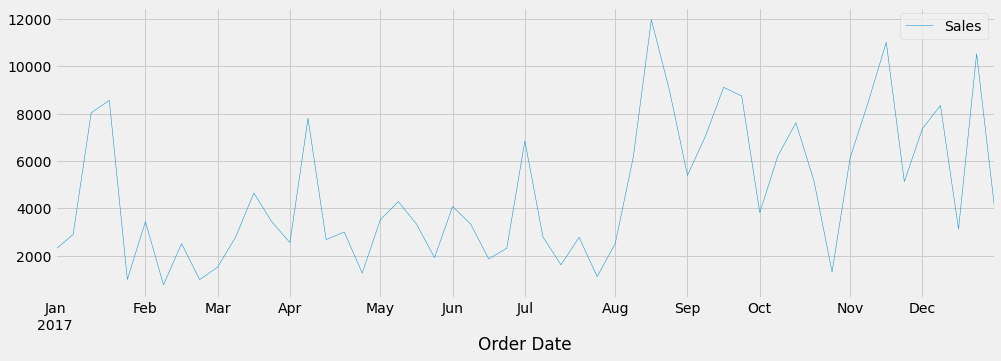

In [ ]:
#Plotting w.r.t weekly sales
cols_plot=['Sales']
OfficeSupplies_weekly.loc['2014'][cols_plot].plot(linewidth=0.5);
OfficeSupplies_weekly.loc['2015'][cols_plot].plot(linewidth=0.5);
OfficeSupplies_weekly.loc['2016'][cols_plot].plot(linewidth=0.5);
OfficeSupplies_weekly.loc['2017'][cols_plot].plot(linewidth=0.5);

In [ ]:
#Monthly sales
data_columns=['Sales']
#Resample to weekly frequency,aggregating with mean
OfficeSupplies_monthly=OfficeSupplies[data_columns].resample('M').sum()
OfficeSupplies_monthly.head(3)
#the values which we got is mean of monthly sales

Sales
Order Date          
2014-01-31  4851.080
2014-02-28  1071.724
2014-03-31  8605.879

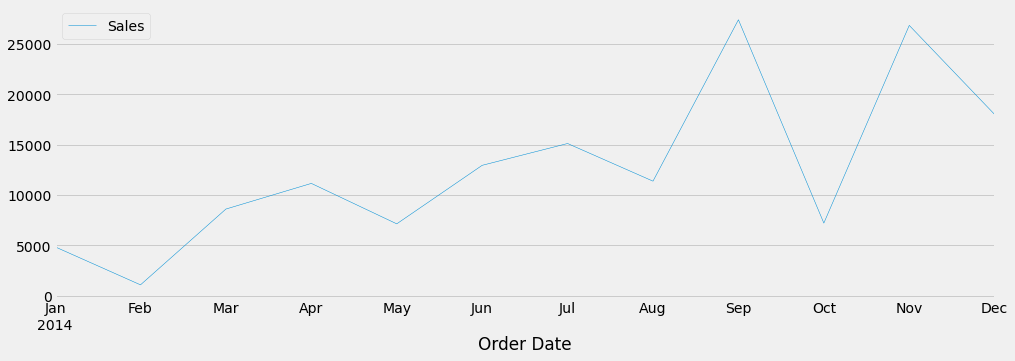

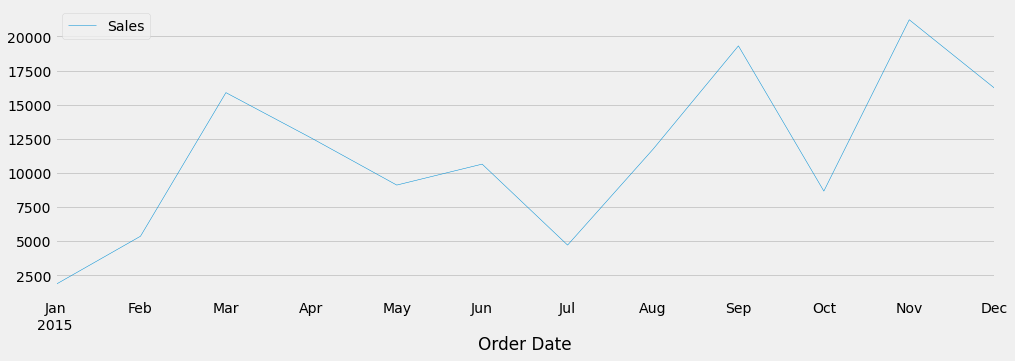

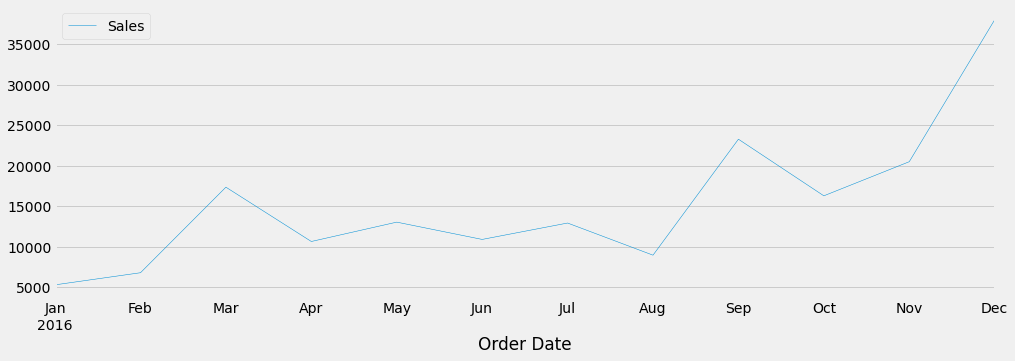

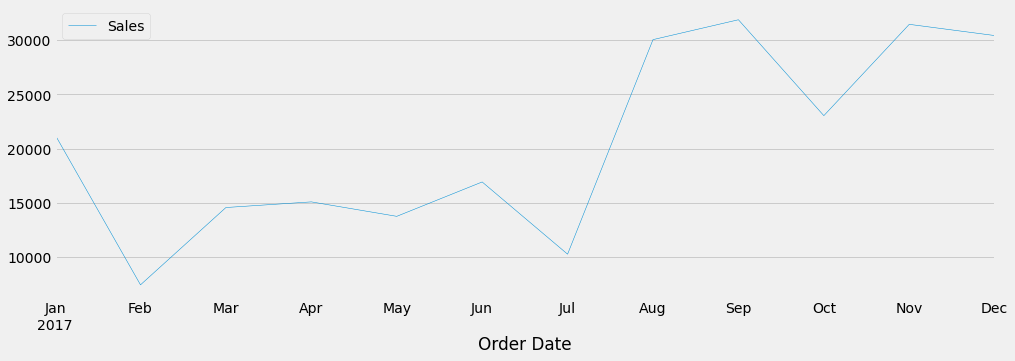

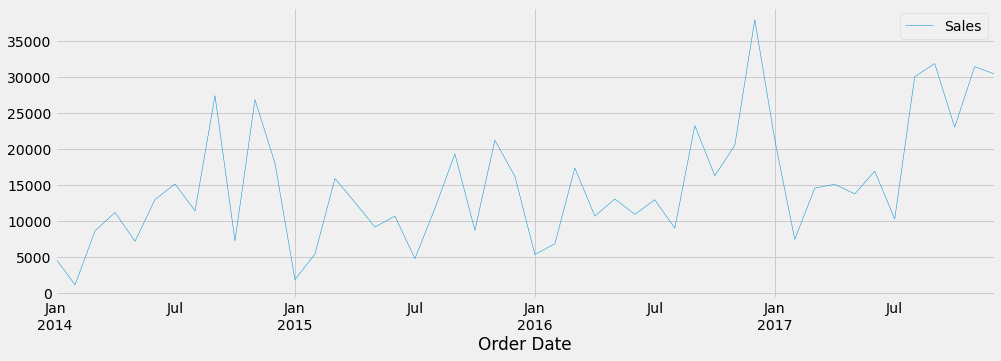

In [ ]:
#Plotting montly sales of all years
cols_plot = ['Sales']
OfficeSupplies_monthly.loc['2014'][cols_plot].plot(linewidth=0.5);
OfficeSupplies_monthly.loc['2015'][cols_plot].plot(linewidth=0.5);
OfficeSupplies_monthly.loc['2016'][cols_plot].plot(linewidth=0.5);
OfficeSupplies_monthly.loc['2017'][cols_plot].plot(linewidth=0.5);
OfficeSupplies_monthly[cols_plot].plot(linewidth=0.5);

Interpretation: We can see the slight uptrend in every year. Sales is up after the month of october. Sales picks up in the last quarter of every year,which indicates seasonality.

In [ ]:
# define a function to check trend and plot

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df,
             marker='.',
             linestyle='-',
             linewidth=0.5,
             color='blue',
             label='Original')

    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o',
             markersize=8,
             linestyle='-',
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()

Slope 1619.9411118881114
NRMSE: 0.2063875895265251


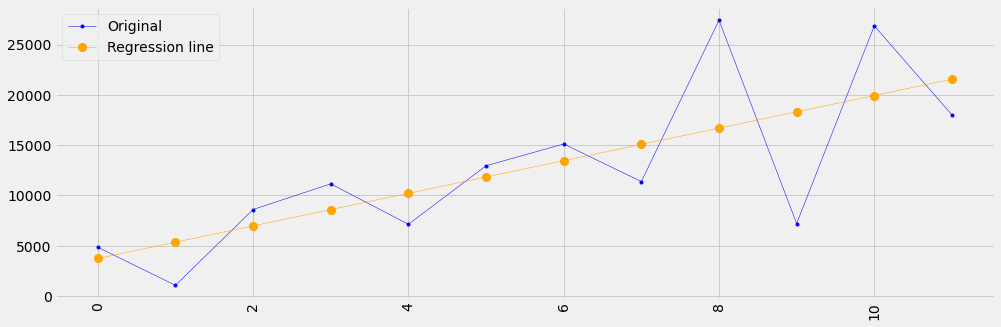

Slope 1000.6321503496499
NRMSE: 0.23352507775377887


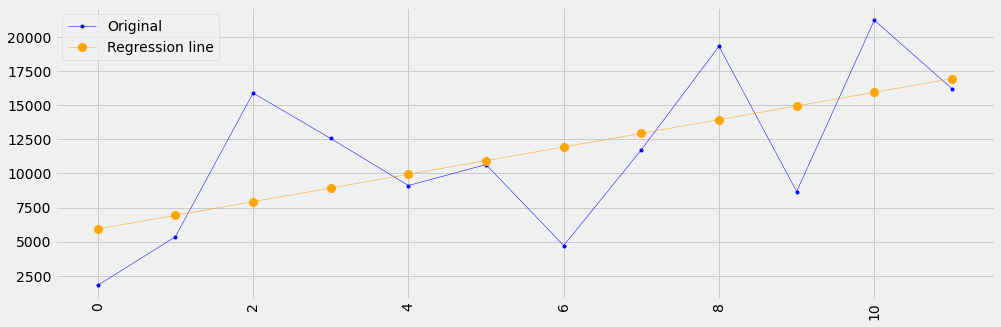

Slope 1847.3245454545447
NRMSE: 0.17367008030647496


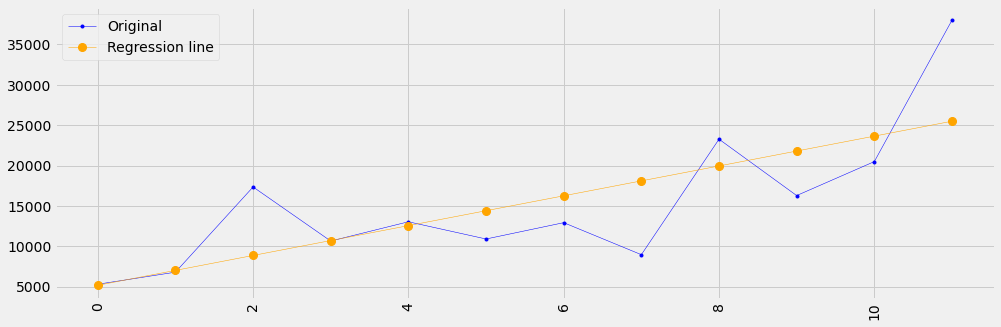

Slope 1759.4229475524469
NRMSE: 0.23720089461894078


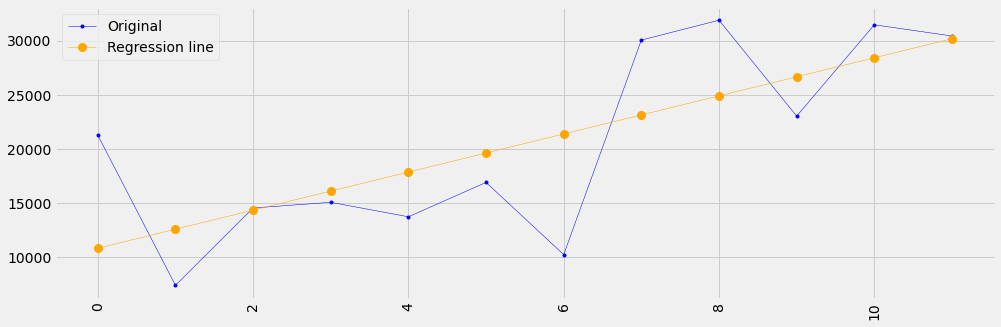

Slope [311.38946114]
NRMSE: 0.19674145534830056


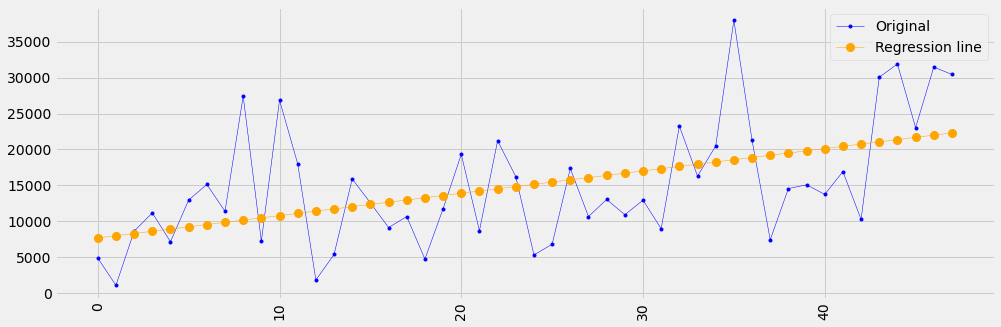

In [ ]:
#check for trend
#the regression line which we get is the trend line
cols_plot = ['Sales']

detect_trend(OfficeSupplies_monthly.loc['2014']['Sales'].values)
detect_trend(OfficeSupplies_monthly.loc['2015']['Sales'].values)
detect_trend(OfficeSupplies_monthly.loc['2016']['Sales'].values)
detect_trend(OfficeSupplies_monthly.loc['2017']['Sales'].values)
detect_trend(OfficeSupplies_monthly[cols_plot].values)

Observation: Trend is more visible in the montly sales. Uptrend in sales numbers every year after the month of october, which indicated seasonality.

<AxesSubplot:xlabel='Order Date'>

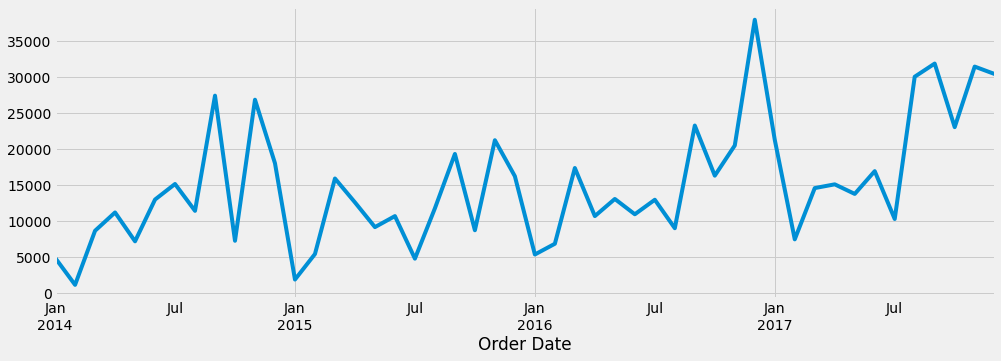

In [ ]:
#Check for stationarity
OfficeSupplies_monthly['Sales'].plot()

<AxesSubplot:>

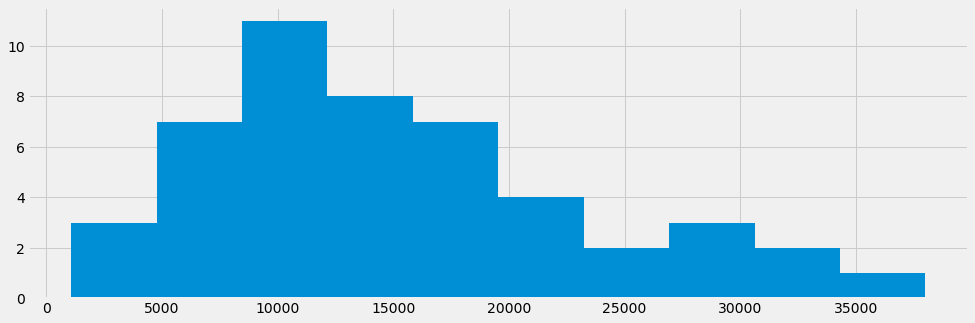

In [ ]:
OfficeSupplies_monthly['Sales'].hist()

In [ ]:
#Split time series into 2 contiguous sequences.
#Calc the mean and variance of each grp of nos and compare the values
X = OfficeSupplies_monthly['Sales'].values
split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     =   12042.08, mean2     =   17918.21
variance1 = 47030450.98, variance2 = 78478754.80


Observation: The mean and variance values are different.

Adfuller test for stationarity test:
    H0:Time series is not stationary
    H1:time series is stationary
    If p-value<0.05:Reject H0

In [ ]:
for year in np.unique(OfficeSupplies.Year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = OfficeSupplies.loc[str(year)]['Sales'].values

    result = adfuller(X)

    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = OfficeSupplies['Sales'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))


For the year :  2014
ADF Statistic: -15.544645
p-value: 0.000000
Critical Values:
	   1%:   -3.455
	   5%:   -2.872
	  10%:   -2.572

For the year :  2015
ADF Statistic: -16.356377
p-value: 0.000000
Critical Values:
	   1%:   -3.455
	   5%:   -2.872
	  10%:   -2.572

For the year :  2016
ADF Statistic: -14.498885
p-value: 0.000000
Critical Values:
	   1%:   -3.453
	   5%:   -2.872
	  10%:   -2.572

For the year :  2017
ADF Statistic: -16.541488
p-value: 0.000000
Critical Values:
	   1%:   -3.452
	   5%:   -2.871
	  10%:   -2.572

For the CONSOLIDATED 4 years
ADF Statistic: -30.973357
p-value: 0.000000
Critical Values:
	   1%:   -3.436
	   5%:   -2.864
	  10%:   -2.568


Conclusion: we get p=0 which is less than 0.05=>H0 rejected =>Data is stationary. =>Non-seasonal data.

Reduce noise:
    Methods used to reduce noise are: Aggregation Smoothing-Moving average Polynomial fitting

1.Smoothing-Moving Average In this approach,we take avg of 'k' consecutive values depending on the frequency of time series. Here we can take the avg over the past 1 yr,i.e.last 12 values. Pandas has specific fns defined for determining rolling statistics.

In [ ]:
ts=OfficeSupplies_monthly['Sales']

In [ ]:
moving_avg=ts.rolling(window=12).mean()

In [ ]:
moving_avg.head()

Order Date
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
Freq: M, Name: Sales, dtype: float64

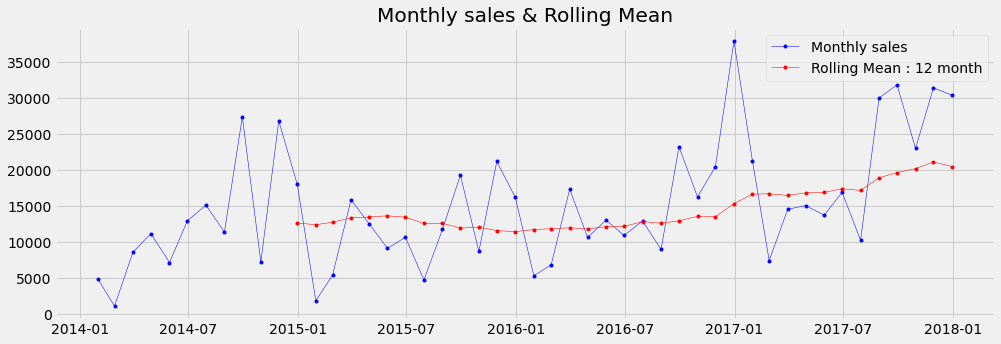

In [ ]:
plt.plot(ts, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

Let the rolling means subtract this from the original series(log transformed).
Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.head(12)

Order Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31            NaN
2014-08-31            NaN
2014-09-30            NaN
2014-10-31            NaN
2014-11-30            NaN
2014-12-31    5358.427667
Freq: M, Name: Sales, dtype: float64

In [ ]:
ts_moving_avg_diff.dropna(inplace=True)

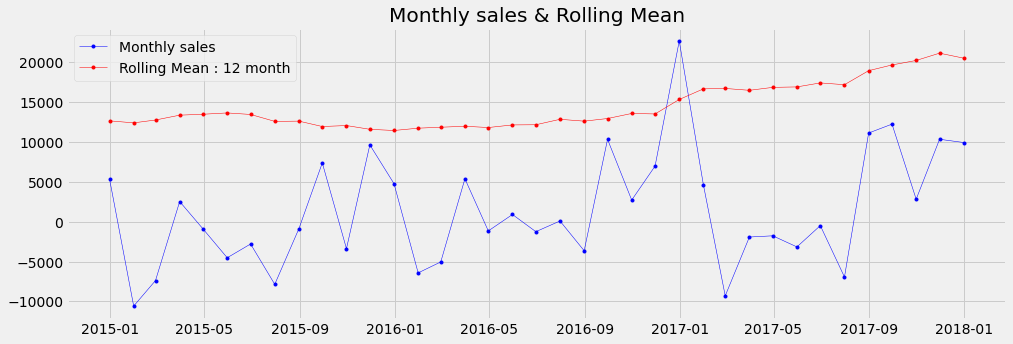

In [ ]:
plt.plot(ts_moving_avg_diff, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

Decomposition of a time series into its components(trend, seasonality,noise):
You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.
The seasonal_decompose in statsmodels implements this conveniently.
visualize our data using a method called time-series decomposition that allows us to decompose our time series into 3 distinct components: - trend, - seasonality, and - noise.

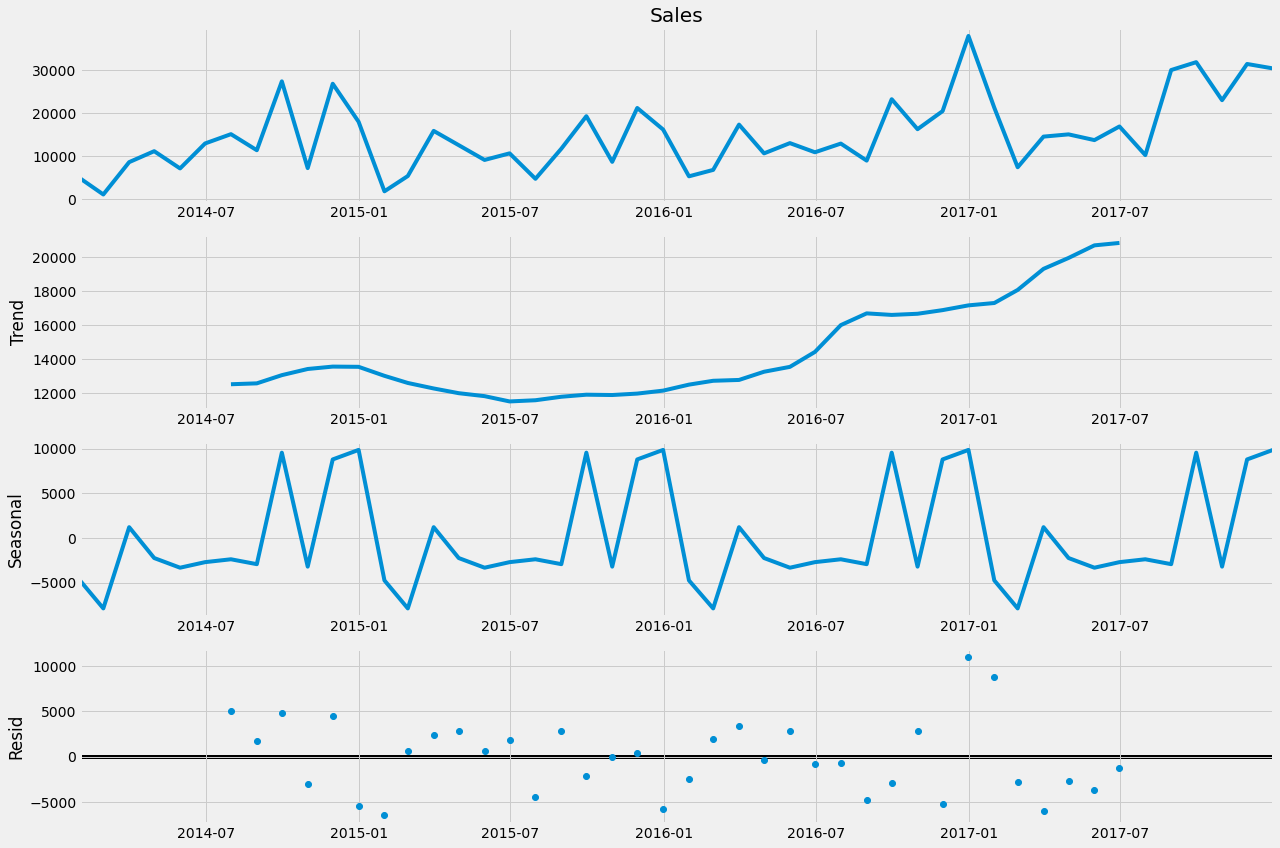

In [ ]:
#Additive Decomposition

rcParams['figure.figsize'] = 18, 12

result_additive = seasonal_decompose(OfficeSupplies_monthly['Sales'],
                                     model='additive')

fig = result_additive.plot()

ARIMA FORECASTING:
    Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models

An ARIMA model is characterized by 3 terms: p, d, q where,
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

Use ad-fuller test for stationarity check:

In [ ]:
# check stationarity
#H0:Data is non-stationary
#H1:Data is stationary
result = adfuller(OfficeSupplies.loc['2015']['Sales'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.356377
p-value: 0.000000


Interpretation: We get p=0 which is less than 0.05=>H0 rejected =>Data is stationary=>Non seasonal

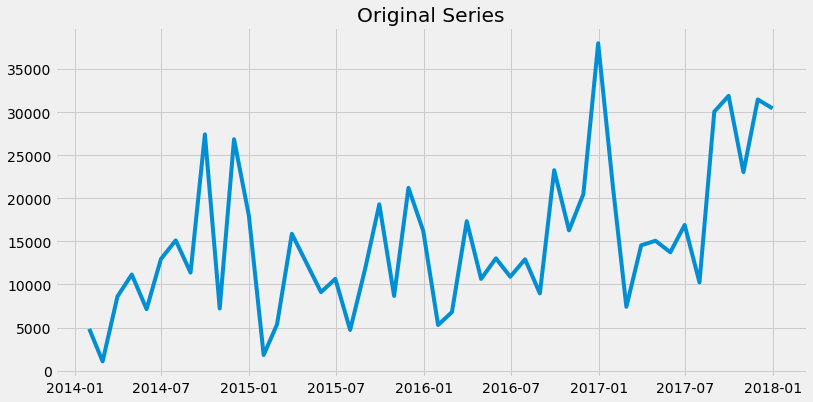

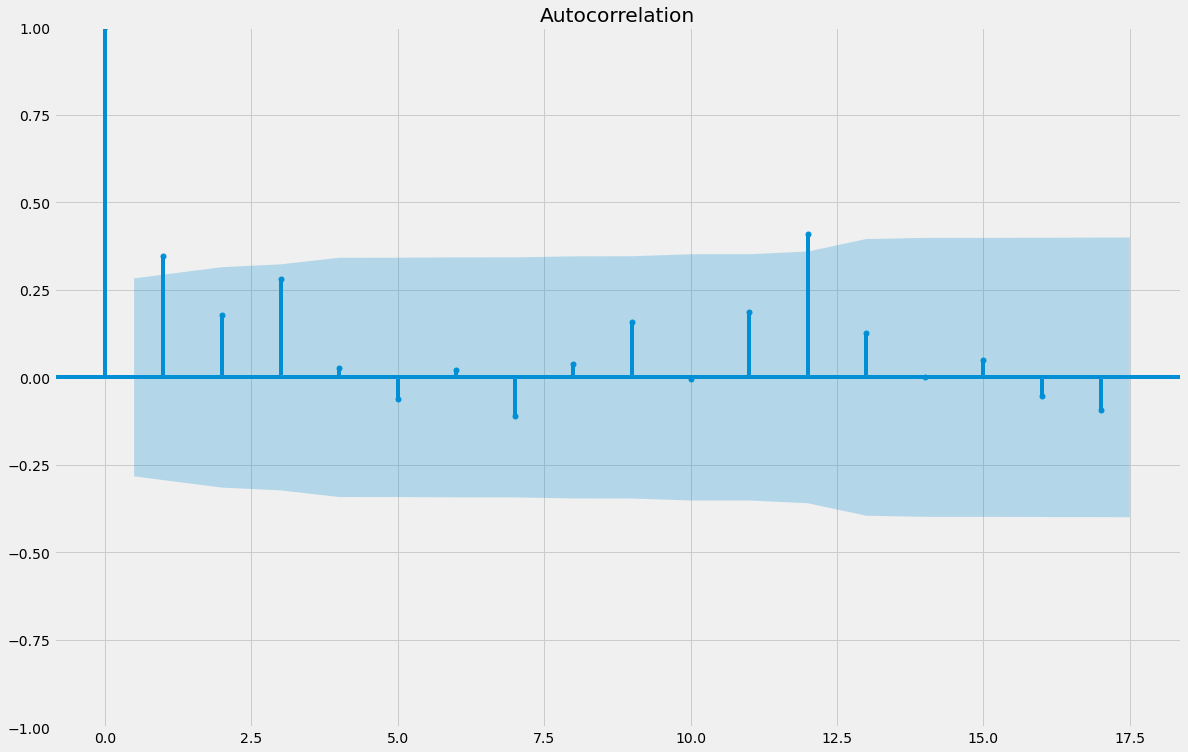

In [ ]:
# Original Series
# fig, axes = plt.subplots(6, 1, sharex=True)
#fig, axes = plt.subplots(3, 2, figsize=(11, 8))
plt.figure(figsize=(12, 6))

plt.plot(ts)
plt.title('Original Series')
acf0 = plot_acf(ts)

Finding order of differencing(d):

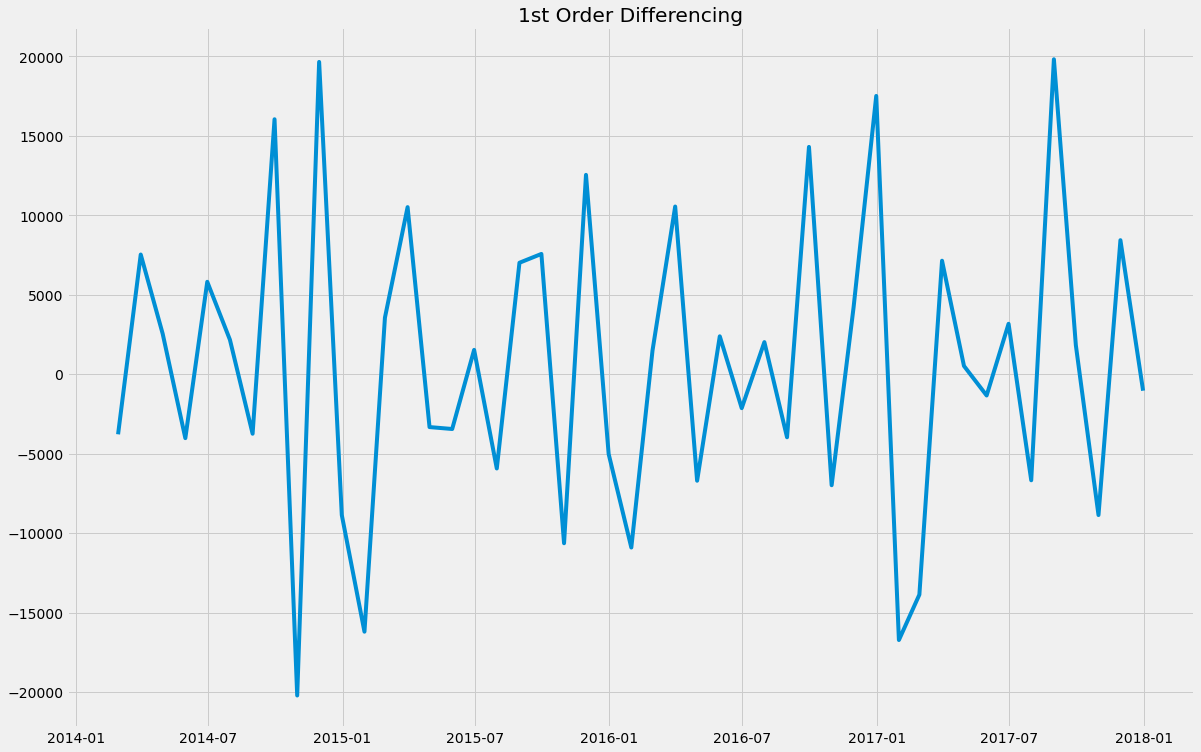

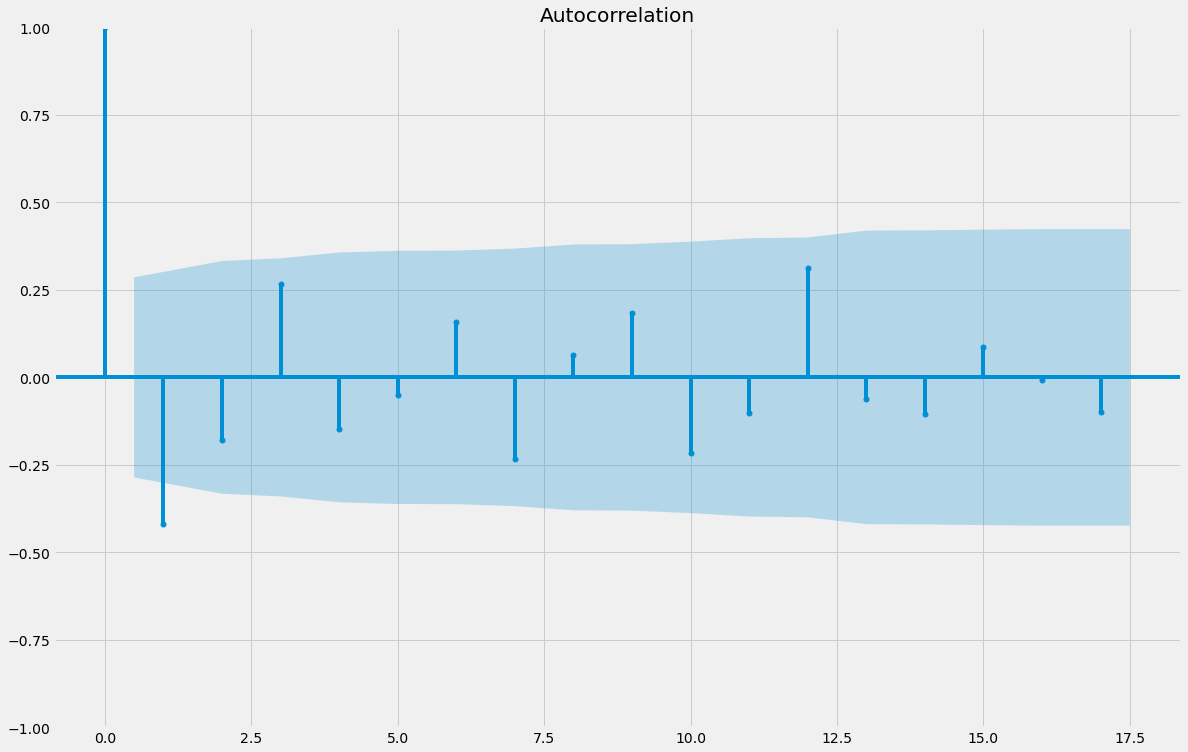

In [ ]:
# 1st order Differencing
plt.plot(ts.diff());
plt.title('1st Order Differencing')
acf1 = plot_acf(ts.diff().dropna())

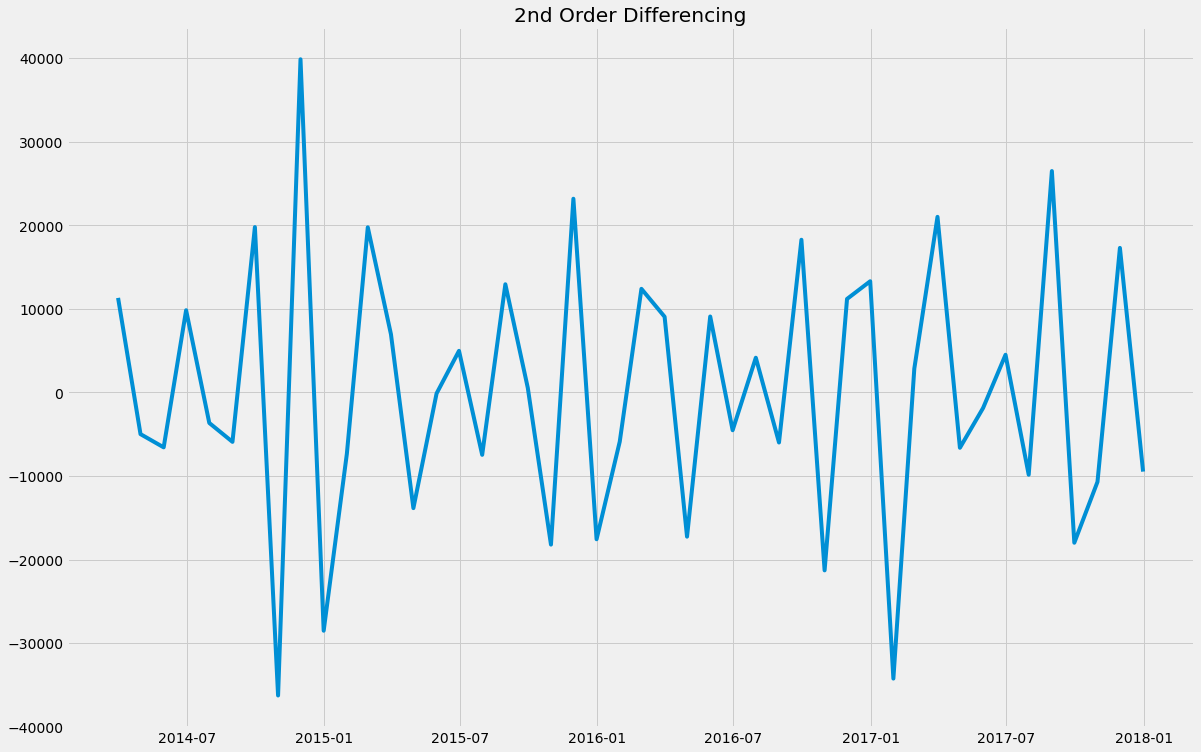

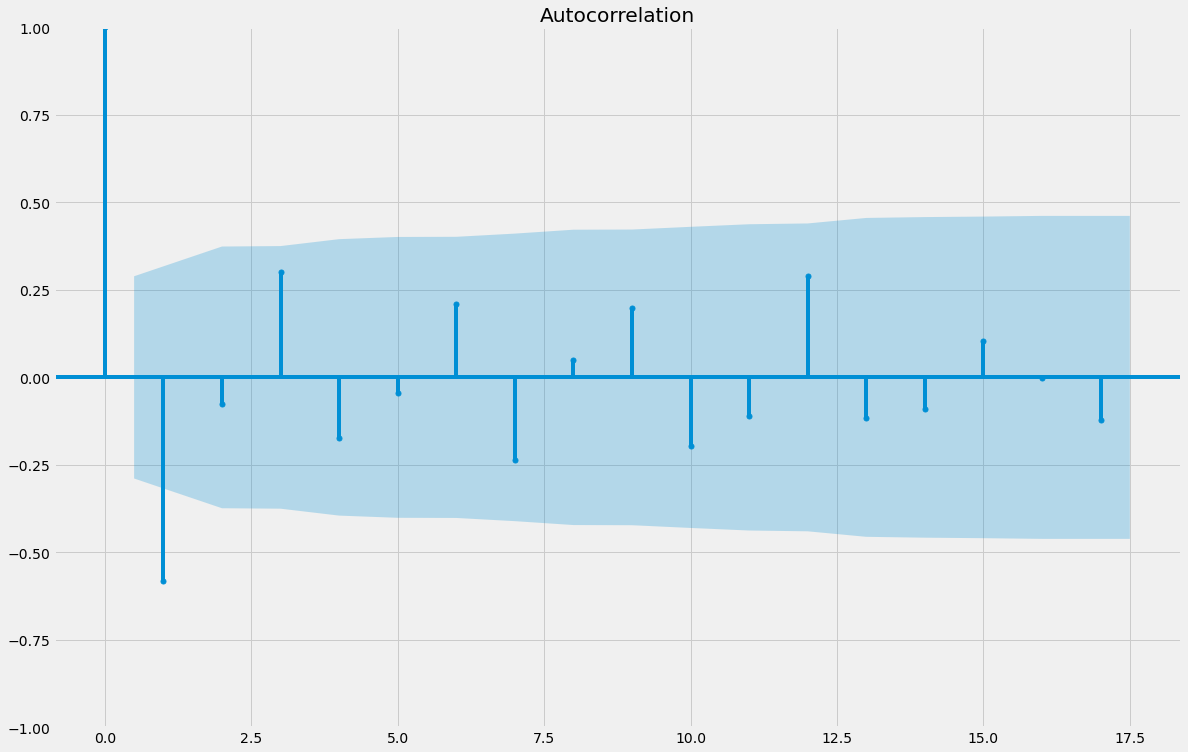

In [ ]:
# 2nd order Differencing
plt.plot(ts.diff().diff());
plt.title('2nd Order Differencing')
acf2 = plot_acf(ts.diff().diff().dropna())

Observation: The time series is stationary without any differencing. In 1st order differencing with lag1,the ACF goes into negative zone, which indicates over differencing. Therefore,d=0

Finding order of MA term(q): MA term is the error of lagged forecast. The ACF tells you how many MA terms are required to remove any autocorrelation in the stationarized series.

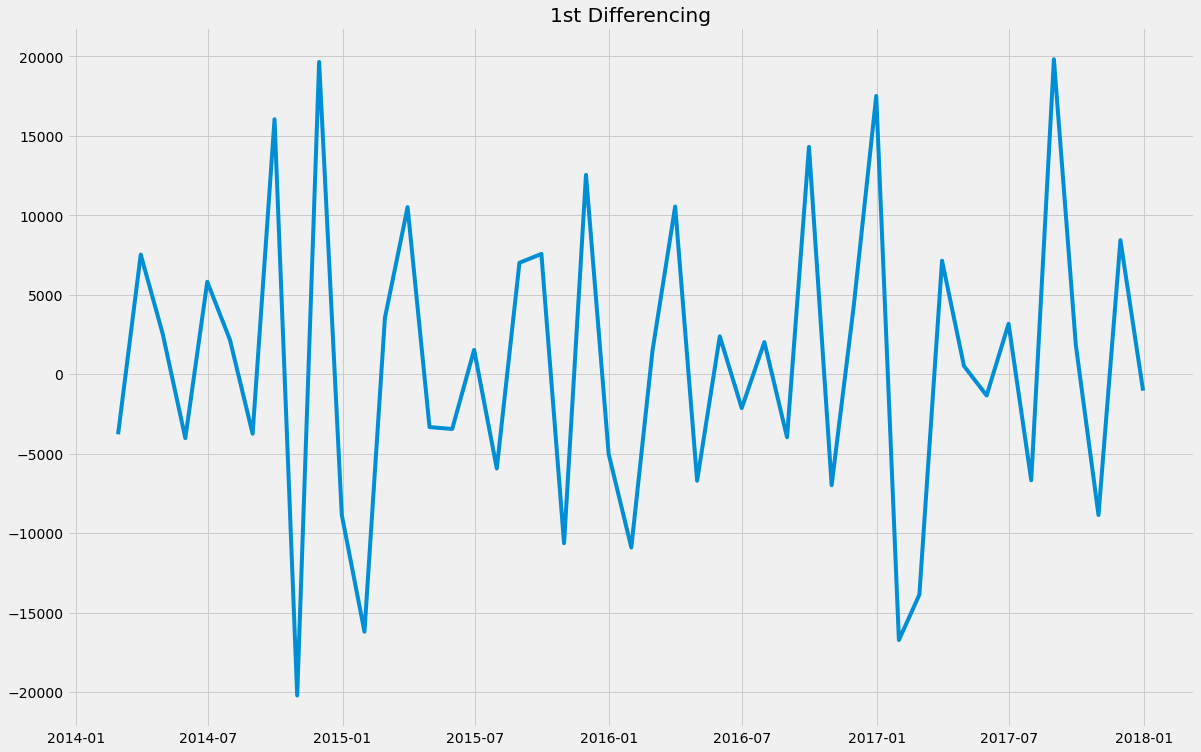

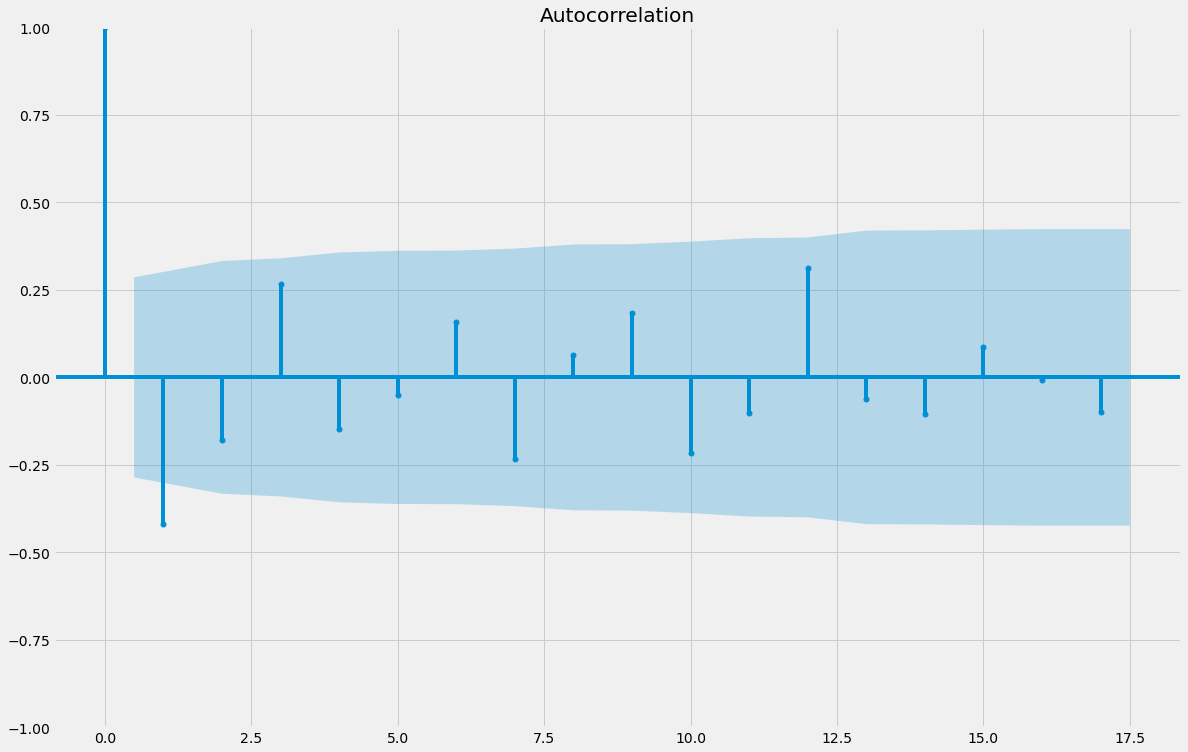

In [ ]:
plt.plot(ts.diff());
plt.title('1st Differencing')

#axes[1].set(ylim=(0,1.2))

acf = plot_acf(ts.diff().dropna())

We see that with lag1,the ACF is going negative Therefore,we take q=0.

Finding p value:

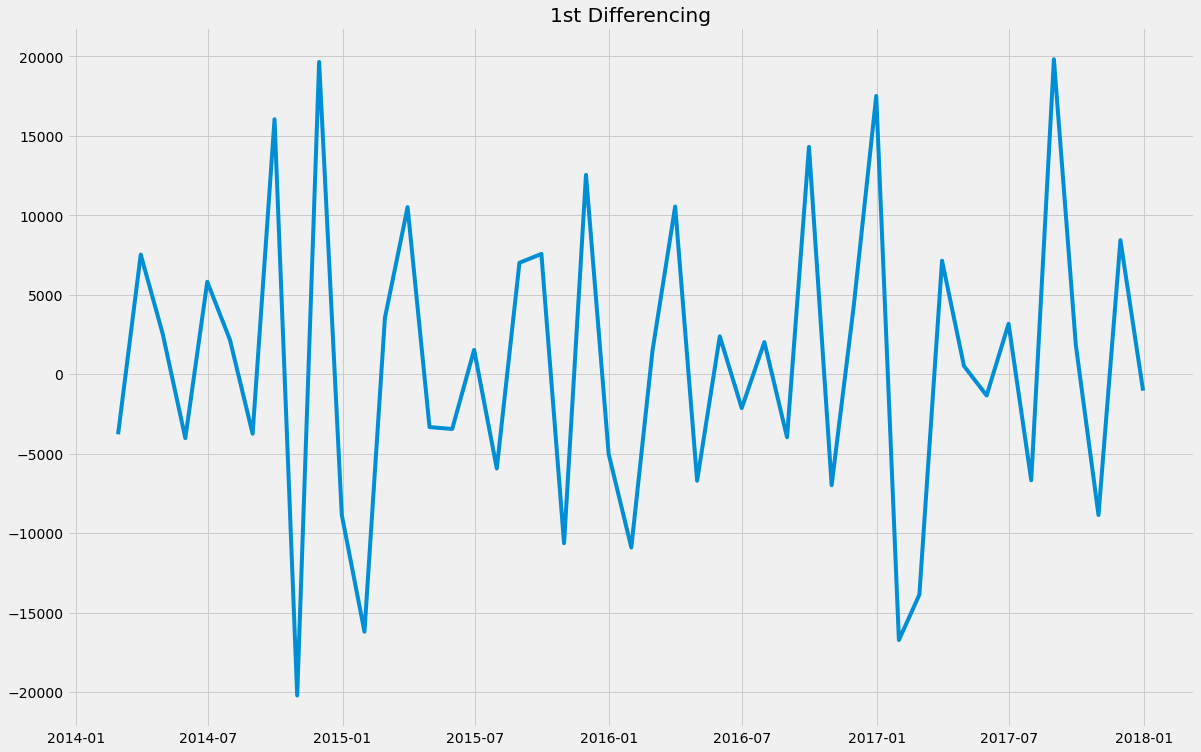

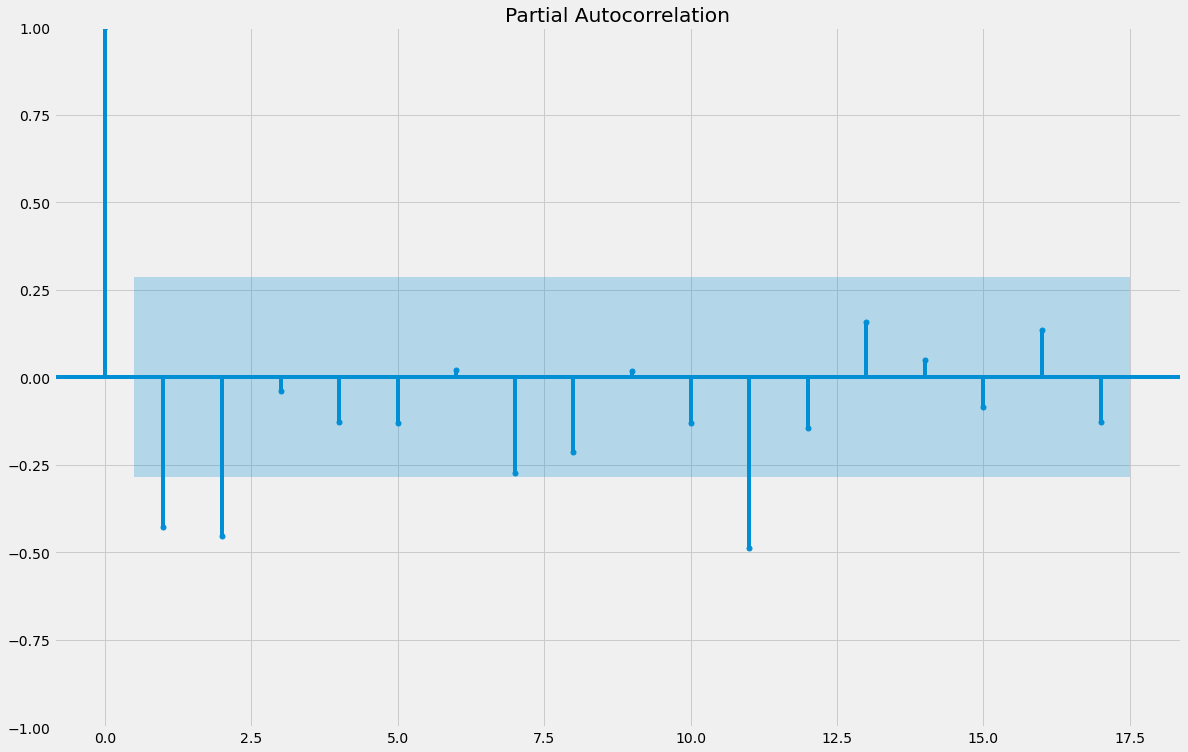

In [ ]:
plt.plot(ts.diff());
plt.title('1st Differencing')

#axes[1].set(ylim=(0,1.2))

acf = plot_pacf(ts.diff().dropna())

Observation:
    We see that p=0.

BUILDING THE ARIMA MODEL: with p=0,d=0,q=0

In [ ]:
mod_default = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 0, 0),
                                seasonal_order=(1, 0 , 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default = mod_default.fit()

In [ ]:
print(results_default.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       3.9195   3.05e-26   1.29e+26      0.000       3.920       3.920
ma.S.L12    1.666e+14         -0       -inf      0.000    1.67e+14    1.67e+14
sigma2      1.131e-12   3.21e-10      0.004      0.997   -6.28e-10     6.3e-10


VALIDATING FORECASTS: We start by comparing predicted values to real values of the time series.We set forecasts to start at 2016–12–31 to the end of the data.

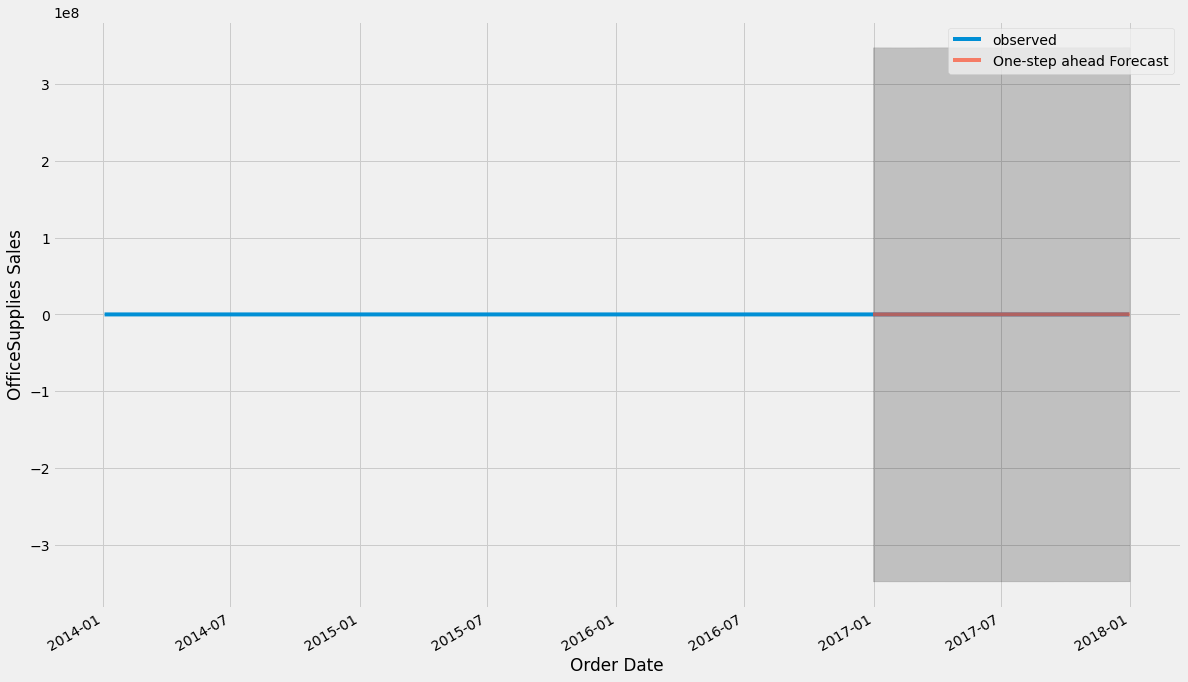

In [ ]:
pred = results_default.get_prediction(start=pd.to_datetime('2016-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = OfficeSupplies.loc['2014':]['Sales'].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Order Date')
ax.set_ylabel('OfficeSupplies Sales')
plt.legend()
plt.show()
# The line plot is showing the observed values compared to the rolling forecast predictions.
# Overall, our forecasts differs with the true values, but shows an upward trend starts from the
# beginning of the year and captured the seasonality toward the end of the year.

In [ ]:
# Predicted sales values
y_forecasted = pred.predicted_mean
# actual sales values
y_truth = OfficeSupplies.loc['2016-12-31':]['Sales']

In [ ]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3481006423.98


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 59000.05


Observation:
    We find the mean squared error(i.e. which is the average squared differnence
                                  between actual and predicted)is high.
    =>Model is not forecasted well and line of best fit is not obtaines.

Considering Technology category alone:

In [ ]:
#Get the rows with Category "Technology"
Technology=data.loc[data['Category']=='Technology']
Technology

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7          8  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
11        12  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
19        20  CA-2014-143336 2014-08-27 2014-09-01    Second Class   
26        27  CA-2016-121755 2016-01-16 2016-01-20    Second Class   
35        36  CA-2016-117590 2016-12-08 2016-12-10     First Class   
...      ...             ...        ...        ...             ...   
9983    9984  US-2016-157728 2016-09-22 2016-09-28  Standard Class   
9986    9987  CA-2016-125794 2016-09-29 2016-10-03  Standard Class   
9987    9988  CA-2017-163629 2017-11-17 2017-11-21  Standard Class   
9988    9989  CA-2017-163629 2017-11-17 2017-11-21  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   

     Customer ID       Customer Name    Segment        Country           City  \
7       BH-11710     Brosina Hoffman   Consumer  United States    Los Angeles   
11      BH-11710     Brosina Hoffman   Consumer  United States    Los Angeles   
19      ZD-21925  Zuschuss Donatelli   Consumer  United States  San Francisco   
26      EH-13945       Eric Hoffmann   Consumer  United States    Los Angeles   
35      GH-14485           Gene Hale  Corporate  United States     Richardson   
...          ...                 ...        ...            ...            ...   
9983    RC-19960          Ryan Crowe   Consumer  United States   Grand Rapids   
9986    ML-17410        Maris LaWare   Consumer  United States    Los Angeles   
9987    RA-19885        Ruben Ausman  Corporate  United States         Athens   
9988    RA-19885        Ruben Ausman  Corporate  United States         Athens   
9991    DB-13060         Dave Brooks   Consumer  United States     Costa Mesa   

      ... Postal Code   Region       Product ID    Category Sub-Category  \
7     ...       90032     West  TEC-PH-10002275  Technology       Phones   
11    ...       90032     West  TEC-PH-10002033  Technology       Phones   
19    ...       94109     West  TEC-PH-10001949  Technology       Phones   
26    ...       90049     West  TEC-AC-10003027  Technology  Accessories   
35    ...       75080  Central  TEC-PH-10004977  Technology       Phones   
...   ...         ...      ...              ...         ...          ...   
9983  ...       49505  Central  TEC-PH-10001305  Technology       Phones   
9986  ...       90008     West  TEC-AC-10003399  Technology  Accessories   
9987  ...       30605    South  TEC-AC-10001539  Technology  Accessories   
9988  ...       30605    South  TEC-PH-10004006  Technology       Phones   
9991  ...       92627     West  TEC-PH-10003645  Technology       Phones   

                                           Product Name     Sales  Quantity  \
7                        Mitel 5320 IP Phone VoIP phone   907.152         6   
11        Konftel 250 Conference phone - Charcoal black   911.424         4   
19                              Cisco SPA 501G IP Phone   213.480         3   
26     Imation 8GB Mini TravelDrive USB 2.0 Flash Drive    90.570         3   
35                                          GE 30524EE4  1097.544         7   
...                                                 ...       ...       ...   
9983                   Panasonic KX TS208W Corded phone    97.980         2   
9986  Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...    36.240         1   
9987  Logitech G430 Surround Sound Gaming Headset wi...    79.990         1   
9988                    Panasonic KX - TS880B Telephone   206.100         5   
9991                              Aastra 57i VoIP phone   258.576         2   

      Discount    Profit  
7          0.2   90.7152  
11         0.2   68.3568  
19         0.2   16.0110  
26         0.0   11.7741  
35         0.2  123.4737  
...        ...       ...  
9983       0.0   27.4344  
9986       0.0   15.2208  
9987       0.0   28.7964  
9988       0.0   55.6470  
9991       0.2   19.3932  

[1847

In [ ]:
#Fetch the range of dates in which order is placed
#for the category "Office Supplies"
Technology['Order Date'].min(),OfficeSupplies['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

DATA EXPLORATION

In [ ]:
Technology.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# columns to drop
cols = ['Row ID',
        'Order ID',
        'Ship Date',
        'Ship Mode',
        'Customer ID',
        'Customer Name',
        'Segment',
        'Country',
        'City',
        'State',
        'Postal Code',
        'Region',
        'Product ID',
        'Category',
        'Sub-Category',
        'Product Name',
        'Quantity',
        'Discount',
        'Profit']

In [ ]:
Technology.drop(cols,axis=1,inplace=True)

In [ ]:
Technology

Order Date     Sales
7    2014-06-09   907.152
11   2014-06-09   911.424
19   2014-08-27   213.480
26   2016-01-16    90.570
35   2016-12-08  1097.544
...         ...       ...
9983 2016-09-22    97.980
9986 2016-09-29    36.240
9987 2017-11-17    79.990
9988 2017-11-17   206.100
9991 2017-02-26   258.576

[1847 rows x 2 columns]

In [ ]:
#Check for null values
Technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
#Check if more than 1 sales data is there for a date
#First group by the order date and check sales.
temp=Technology.groupby('Order Date')['Sales'].size()

In [ ]:
temp[temp>1].sort_values(ascending=False)

Order Date
2017-09-24    10
2017-07-03     9
2017-11-12     8
2016-11-24     8
2017-11-13     8
              ..
2016-03-06     2
2016-03-01     2
2016-02-22     2
2016-02-21     2
2016-06-04     2
Name: Sales, Length: 473, dtype: int64

In [ ]:
#Aggregate sales by date
Technology=Technology.groupby('Order Date')['Sales'].sum().reset_index()
Technology

Order Date     Sales
0   2014-01-06  1147.940
1   2014-01-09    31.200
2   2014-01-13   646.740
3   2014-01-15   149.950
4   2014-01-16   124.200
..         ...       ...
819 2017-12-25   401.208
820 2017-12-27   164.388
821 2017-12-28    14.850
822 2017-12-29   302.376
823 2017-12-30    90.930

[824 rows x 2 columns]

In [ ]:
#Set the index as date
Technology=Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [ ]:
#Take 10 samples from the indexed data
Technology.sample(10)

Sales
Order Date          
2014-11-20   833.940
2014-04-11  1801.296
2015-10-05   341.040
2016-07-23   380.611
2015-05-08  3177.914
2017-10-14    46.360
2015-03-20   199.980
2016-04-25    82.800
2015-09-25  1228.830
2014-09-09  1500.210

<AxesSubplot:xlabel='Order Date'>

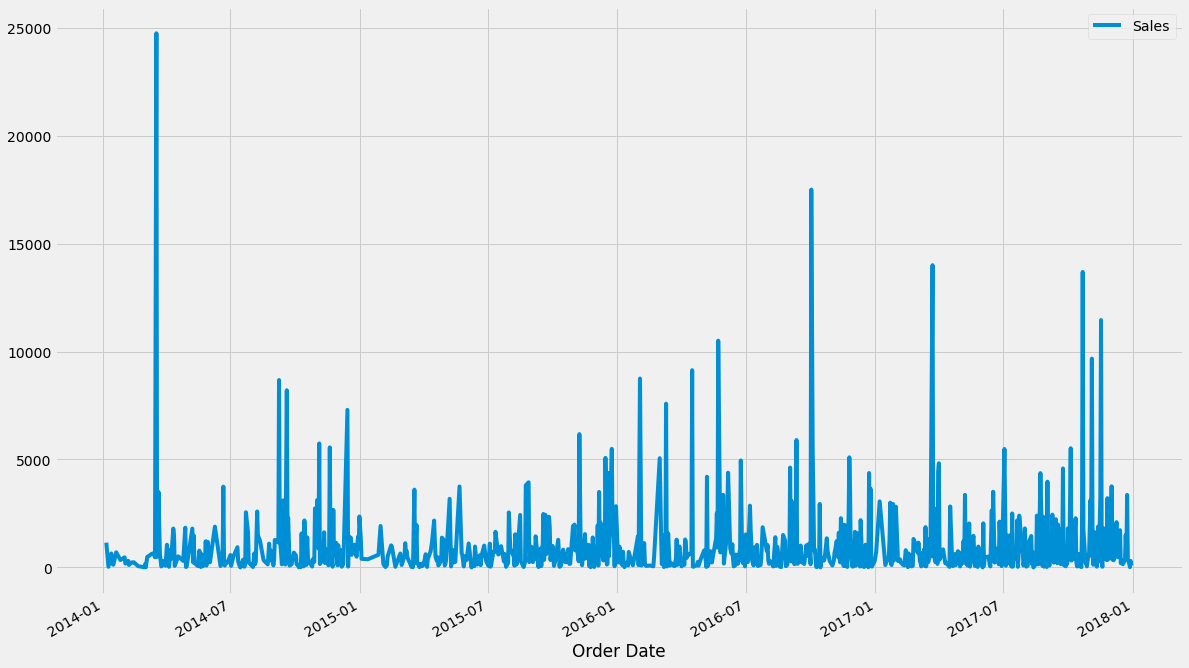

In [ ]:
Technology.plot()

In [ ]:
#Add few more columns to OfficeSupplies containing year,month and weekday name
Technology['Year']=pd.DatetimeIndex(Technology.index).year
Technology['Month']=pd.DatetimeIndex(Technology.index).month
Technology['Day Name']=pd.DatetimeIndex(Technology.index).day_name()
Technology

Sales  Year  Month   Day Name
Order Date                                  
2014-01-06  1147.940  2014      1     Monday
2014-01-09    31.200  2014      1   Thursday
2014-01-13   646.740  2014      1     Monday
2014-01-15   149.950  2014      1  Wednesday
2014-01-16   124.200  2014      1   Thursday
...              ...   ...    ...        ...
2017-12-25   401.208  2017     12     Monday
2017-12-27   164.388  2017     12  Wednesday
2017-12-28    14.850  2017     12   Thursday
2017-12-29   302.376  2017     12     Friday
2017-12-30    90.930  2017     12   Saturday

[824 rows x 4 columns]

In [ ]:
#display a random sample of 10 rows
Technology.sample(10,random_state=0)

Sales  Year  Month   Day Name
Order Date                                  
2014-07-23  2555.084  2014      7  Wednesday
2014-03-28   302.376  2014      3     Friday
2014-02-02   180.960  2014      2     Sunday
2015-10-20   239.970  2015     10    Tuesday
2017-12-27   164.388  2017     12  Wednesday
2017-10-05  5520.506  2017     10   Thursday
2017-07-21  2180.644  2017      7     Friday
2015-09-03   247.840  2015      9   Thursday
2015-12-18   166.240  2015     12     Friday
2017-03-19   957.004  2017      3     Sunday

<AxesSubplot:xlabel='Order Date'>

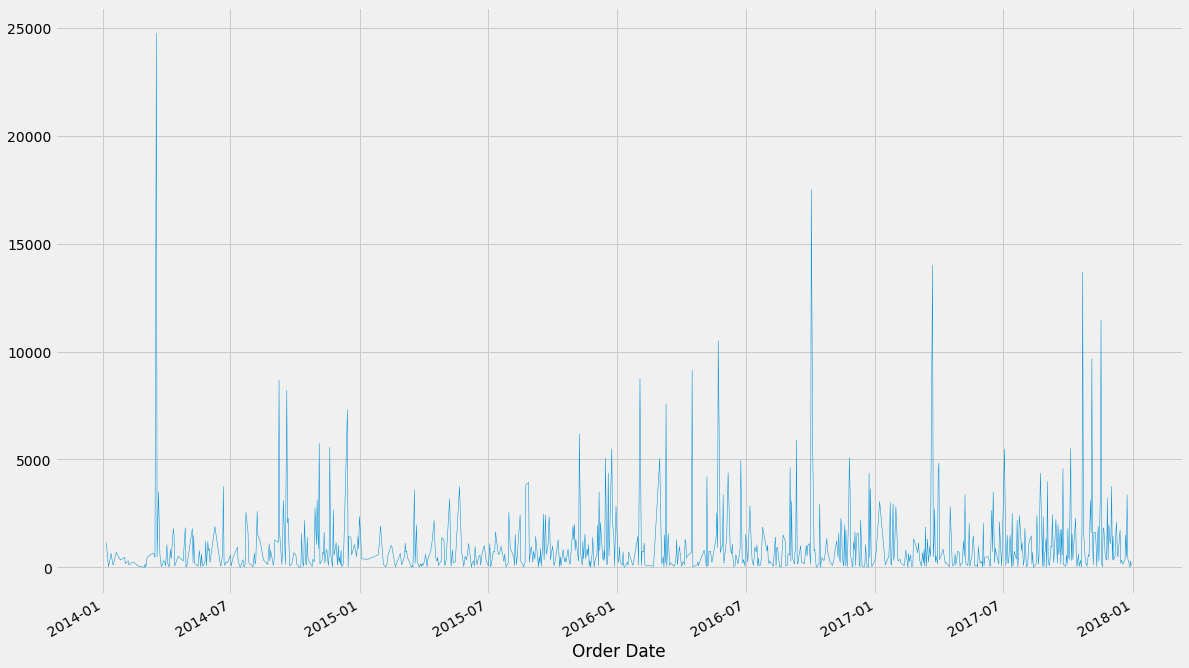

In [ ]:
# create a line plot of the full time series of daily sales,
Technology['Sales'].plot(linewidth=0.5)

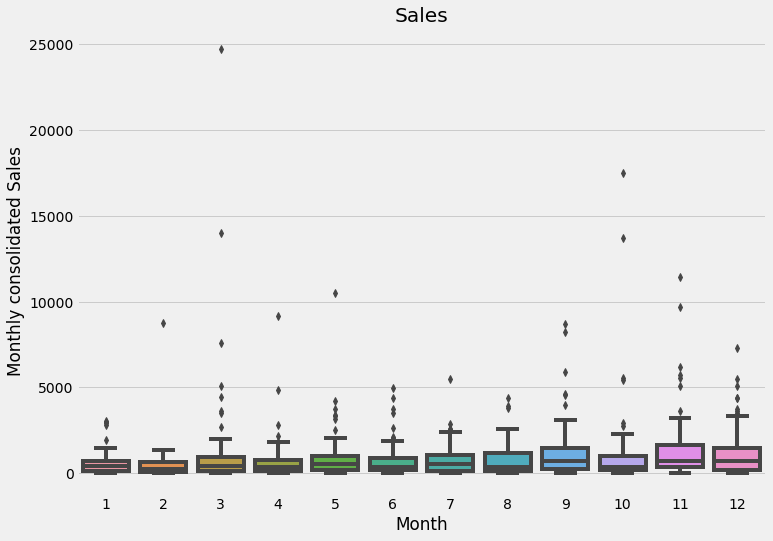

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=Technology, x='Month', y='Sales', ax=ax)

ax.set_title('Sales')

ax.set_ylabel('Monthly consolidated Sales');

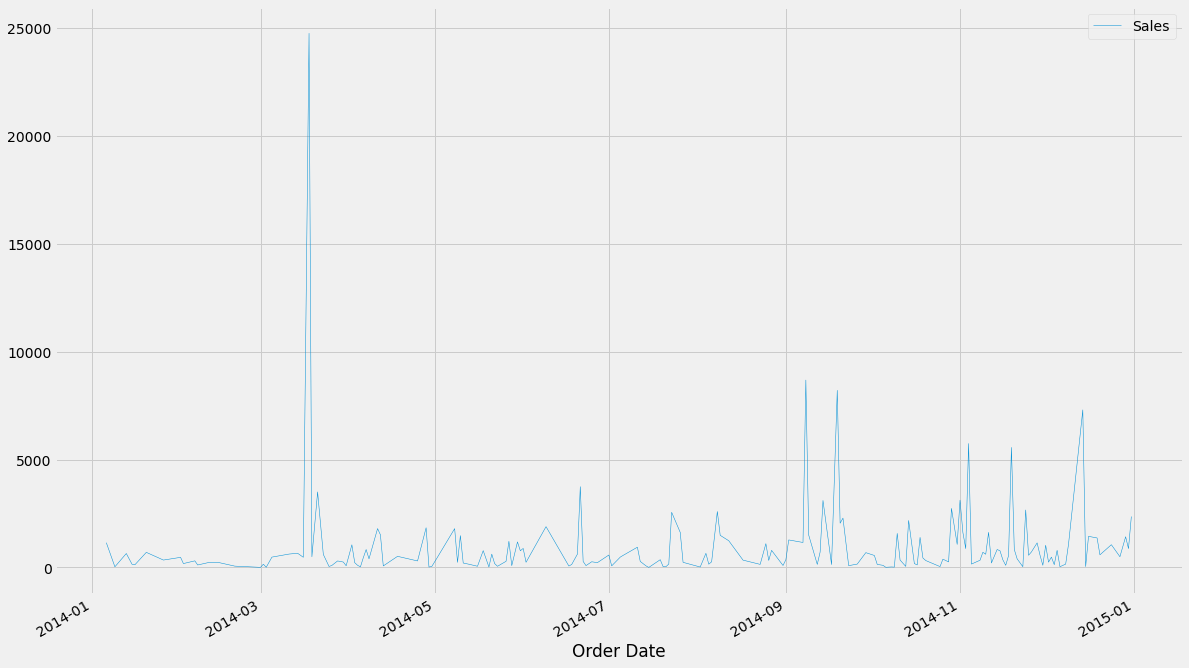

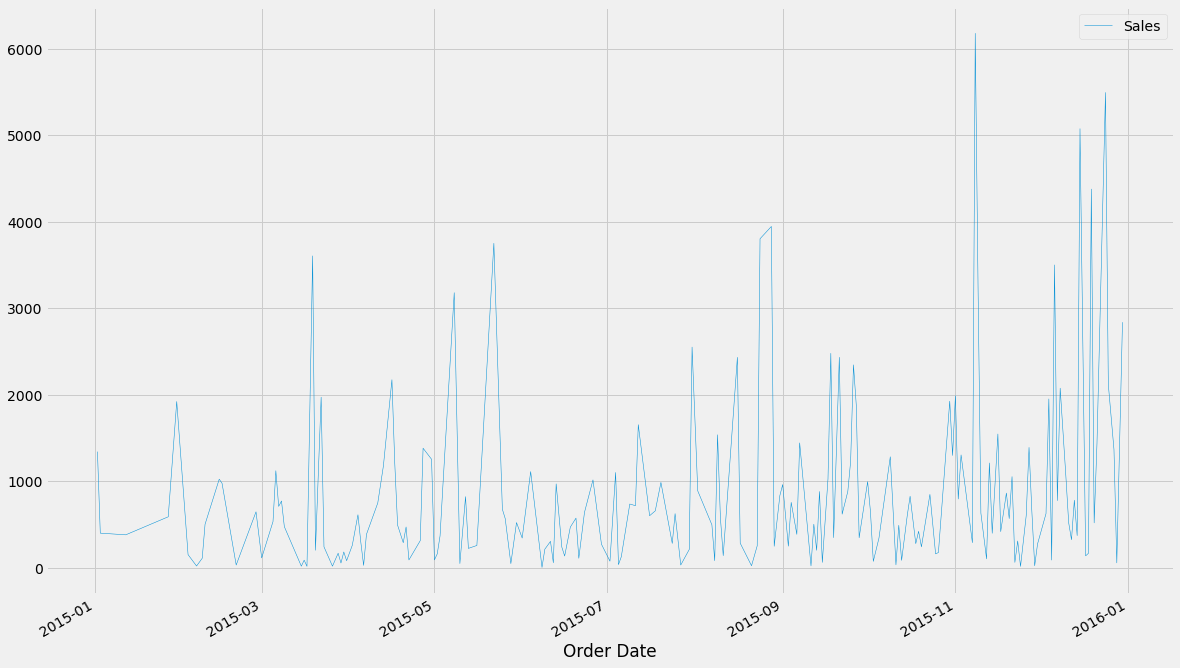

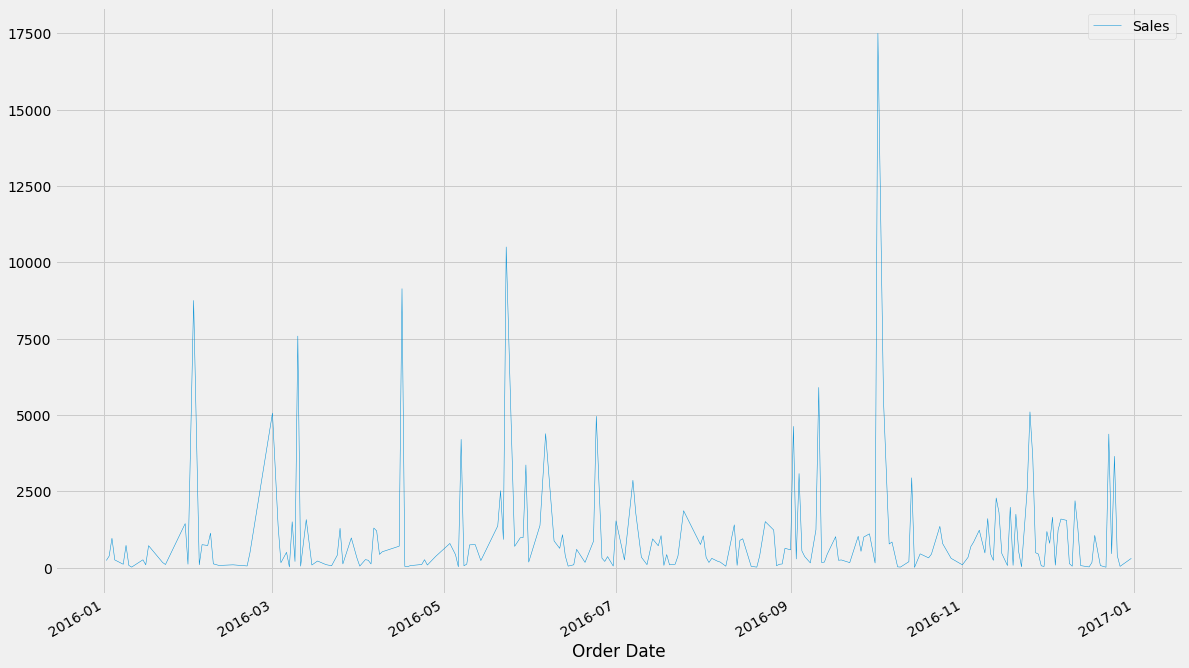

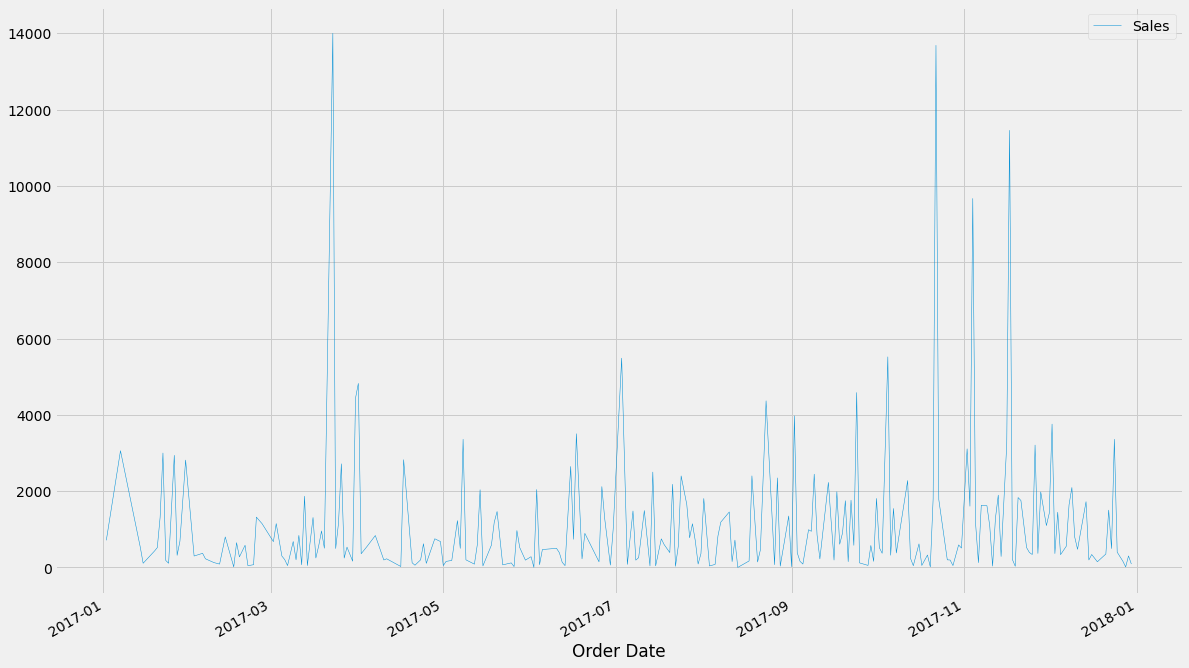

In [ ]:
#visualizing year wise sales
cols_plot=['Sales']
Technology.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology.loc['2017'][cols_plot].plot(linewidth=0.5);

Interpretation: The trend is not obvious from the above plots. There seems an indication of seasonality at the end of years 2014,2015,2017 where the sales decreases.

In [ ]:
#Weekly sales
data_columns=['Sales']
#Resample to weekly frequency,aggregating with mean
Technology_weekly=Technology[data_columns].resample('W').sum()
Technology_weekly
#the values which we got is mean of weekly sales

Sales
Order Date          
2014-01-12  1179.140
2014-01-19   920.890
2014-01-26  1043.260
2014-02-02   649.860
2014-02-09   421.920
...              ...
2017-12-03  8984.908
2017-12-10  6873.836
2017-12-17  2736.816
2017-12-24  5860.934
2017-12-31   973.752

[208 rows x 1 columns]

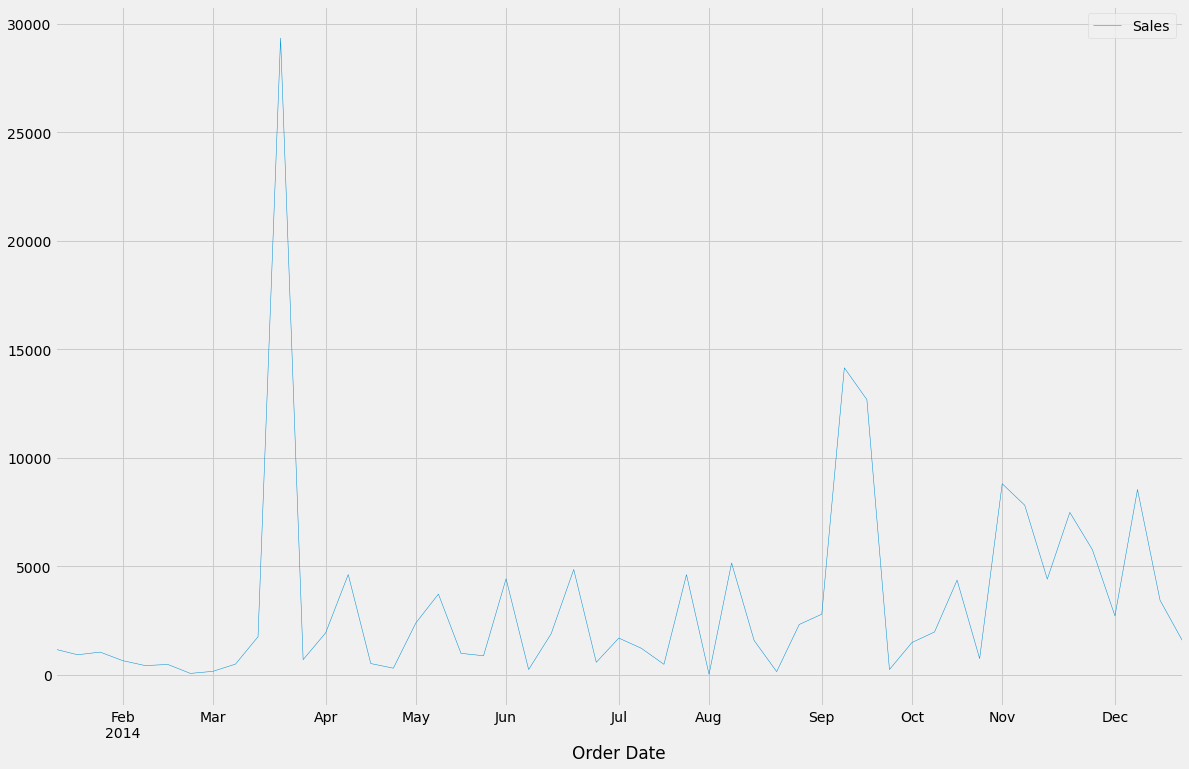

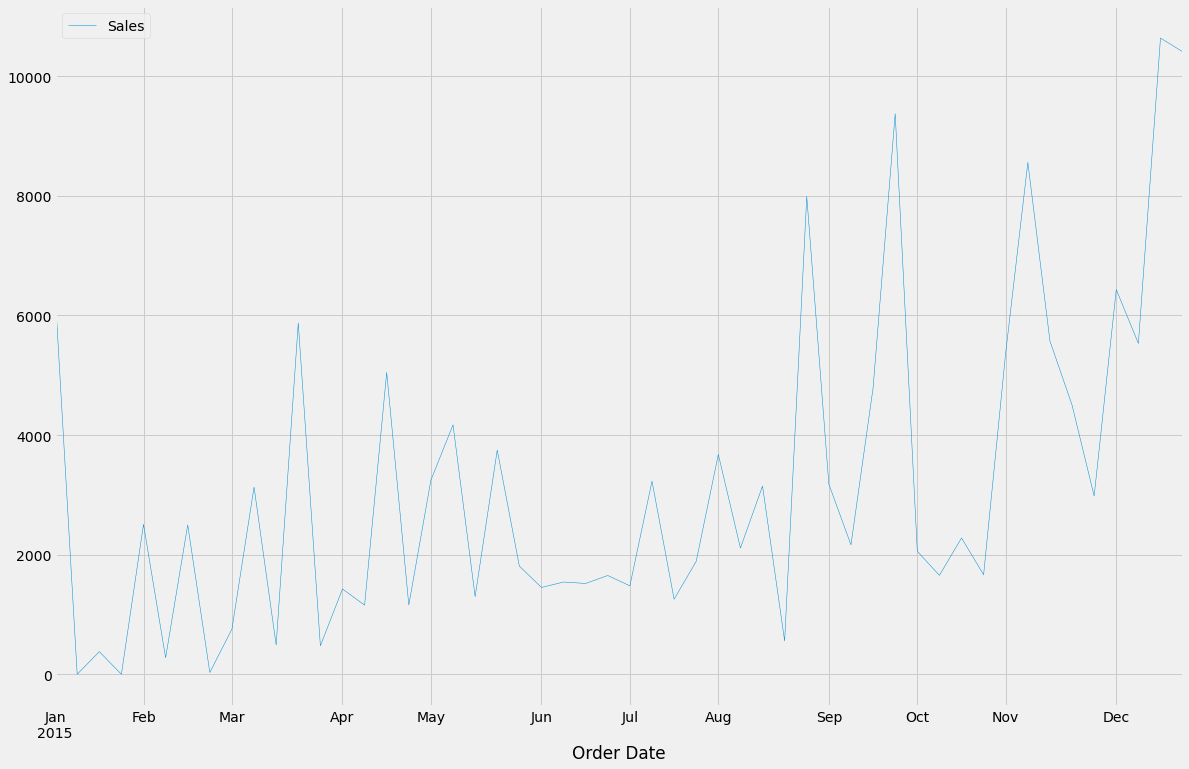

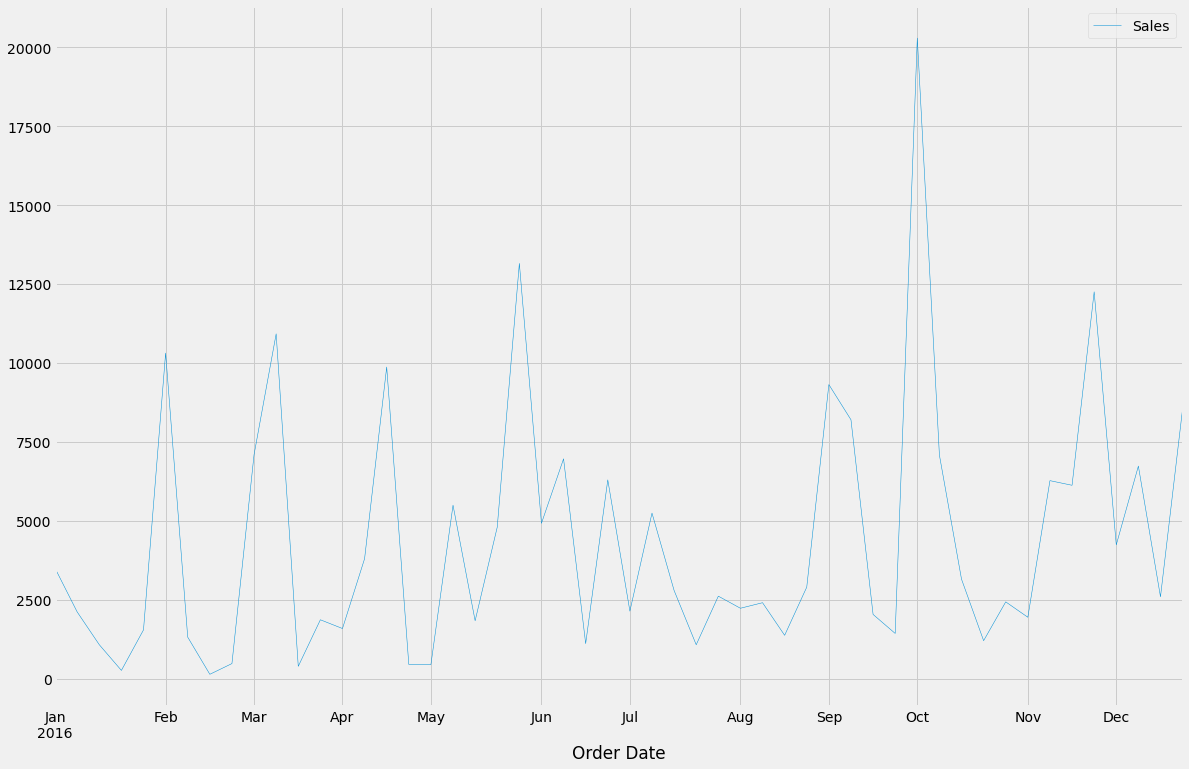

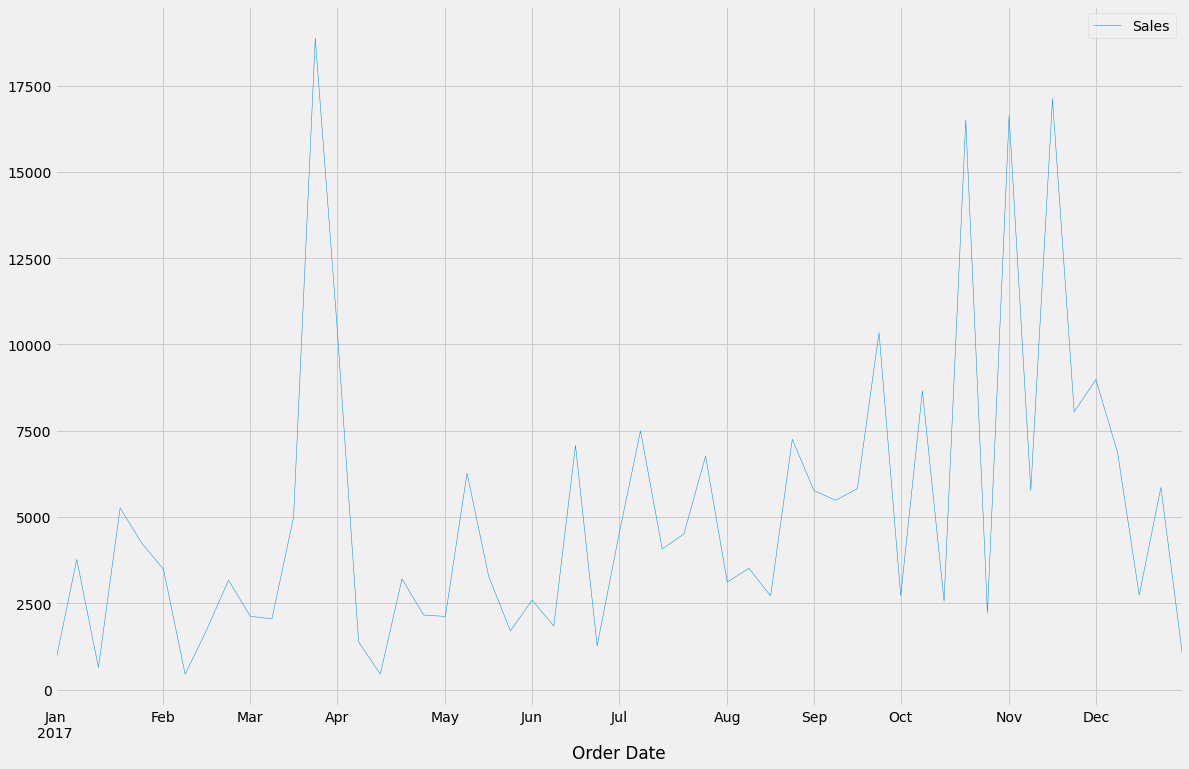

In [ ]:
#Plotting w.r.t weekly sales
cols_plot=['Sales']
Technology_weekly.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2017'][cols_plot].plot(linewidth=0.5);

In [ ]:
#Monthly sales
data_columns=['Sales']
#Resample to weekly frequency,aggregating with mean
Technology_monthly=Technology[data_columns].resample('M').sum()
Technology_monthly.head(3)
#the values which we got is mean of monthly sales

Sales
Order Date           
2014-01-31   3143.290
2014-02-28   1608.510
2014-03-31  32511.174

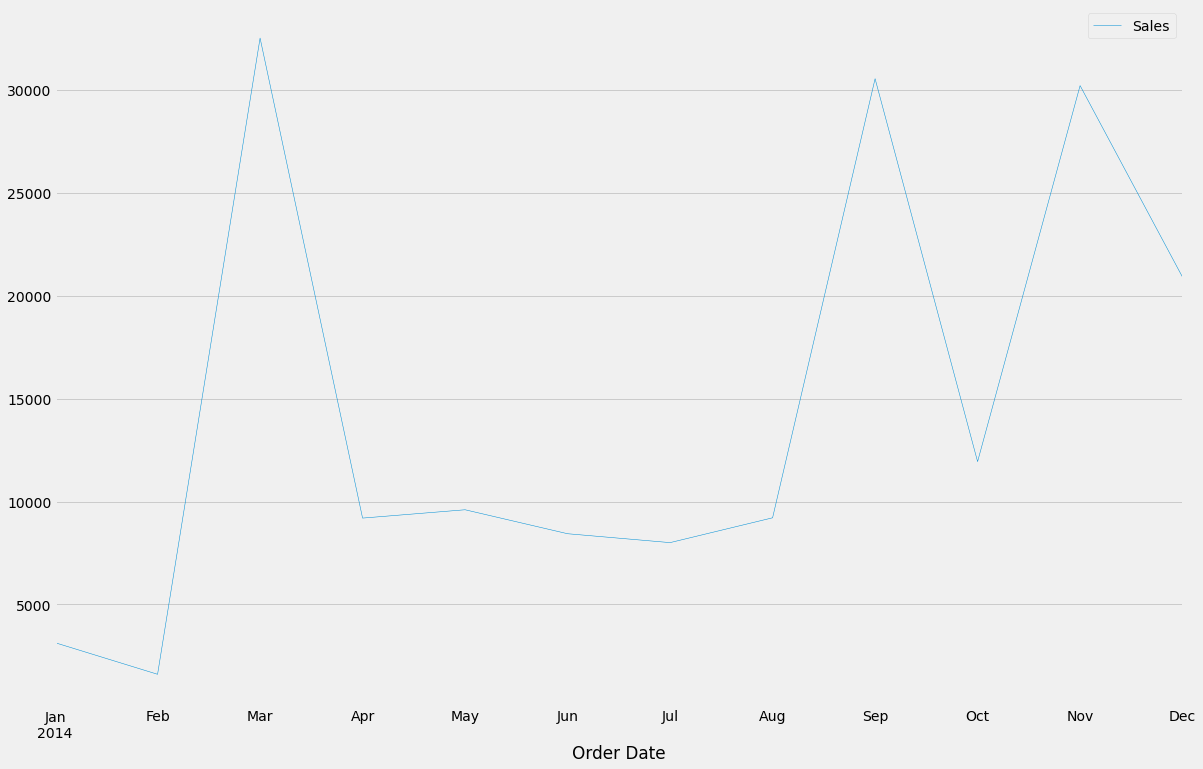

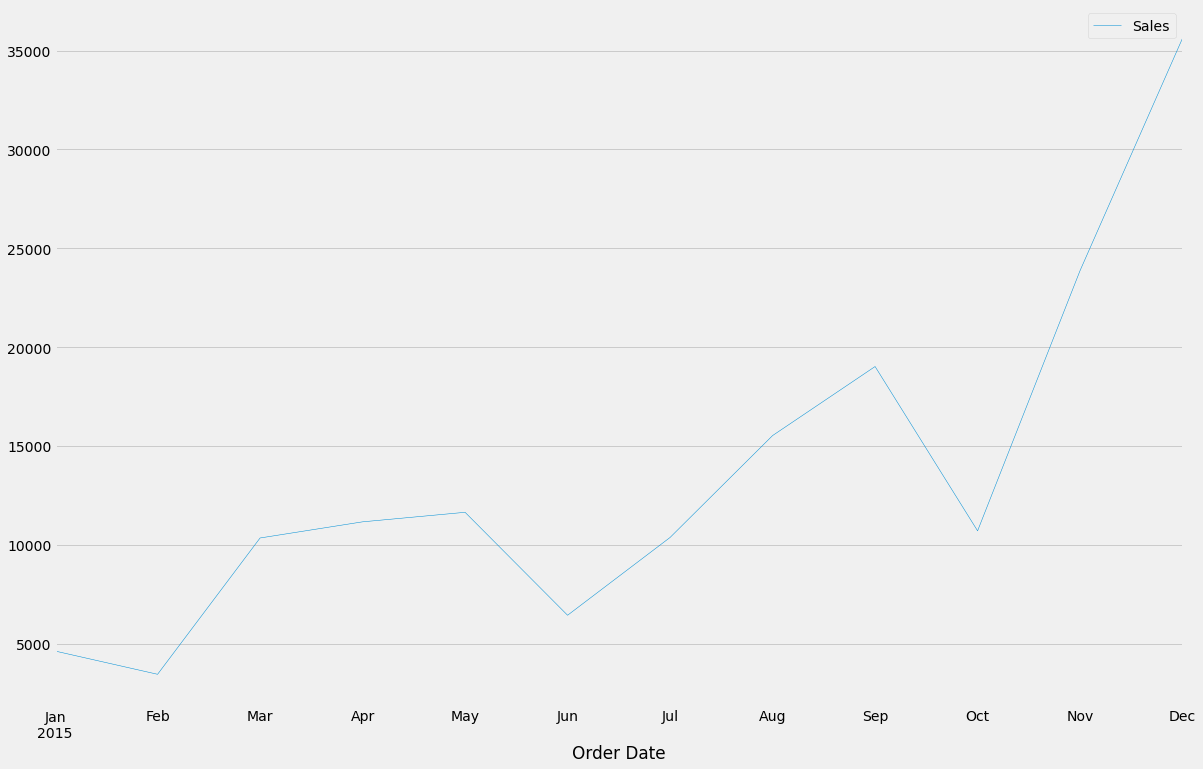

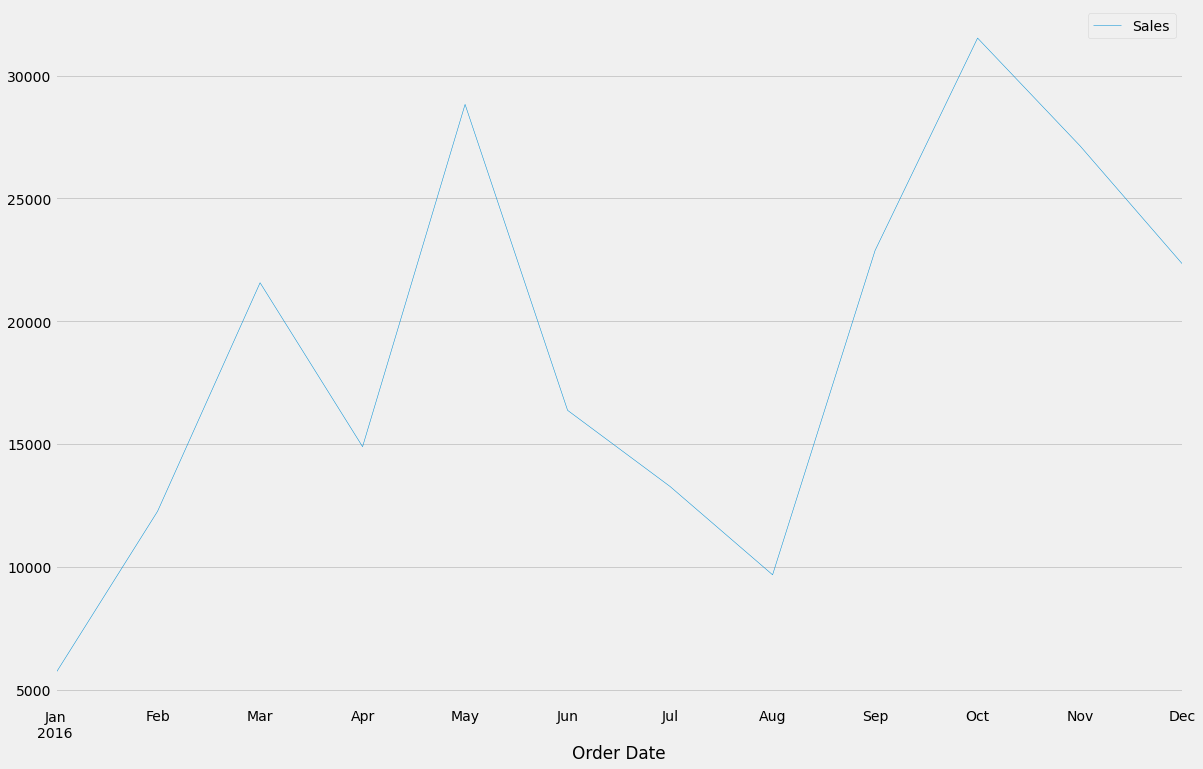

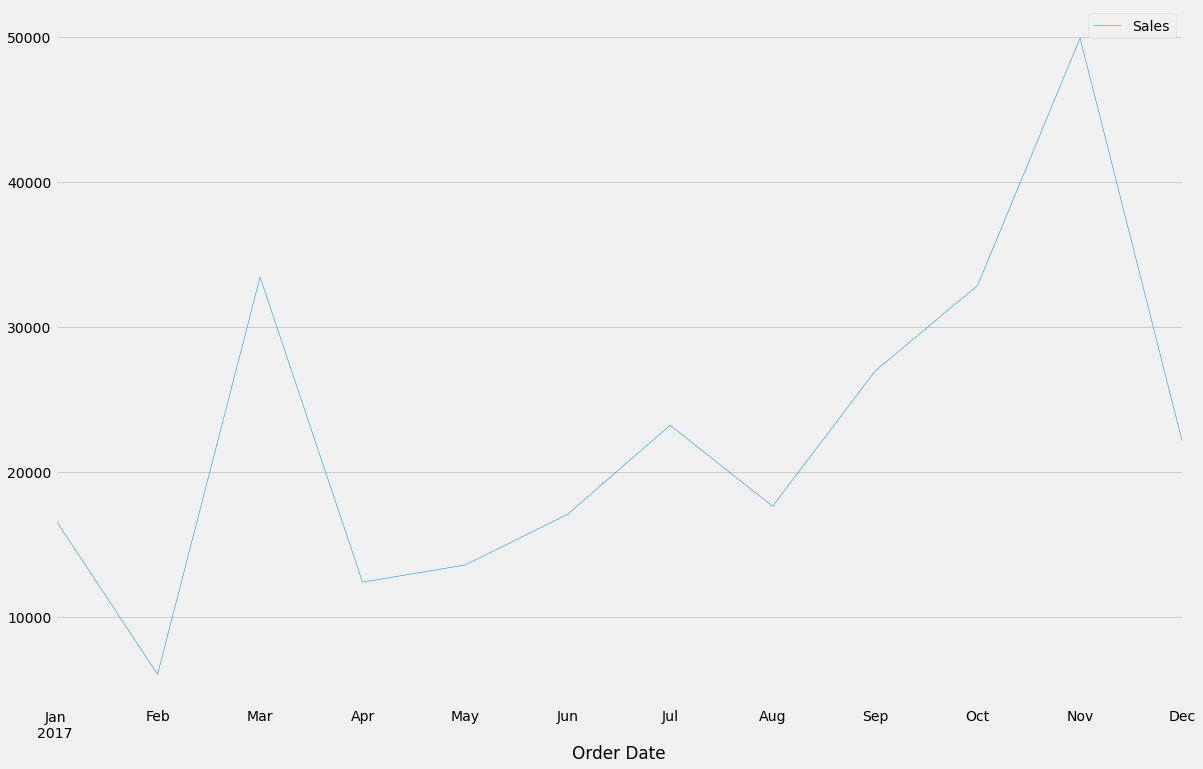

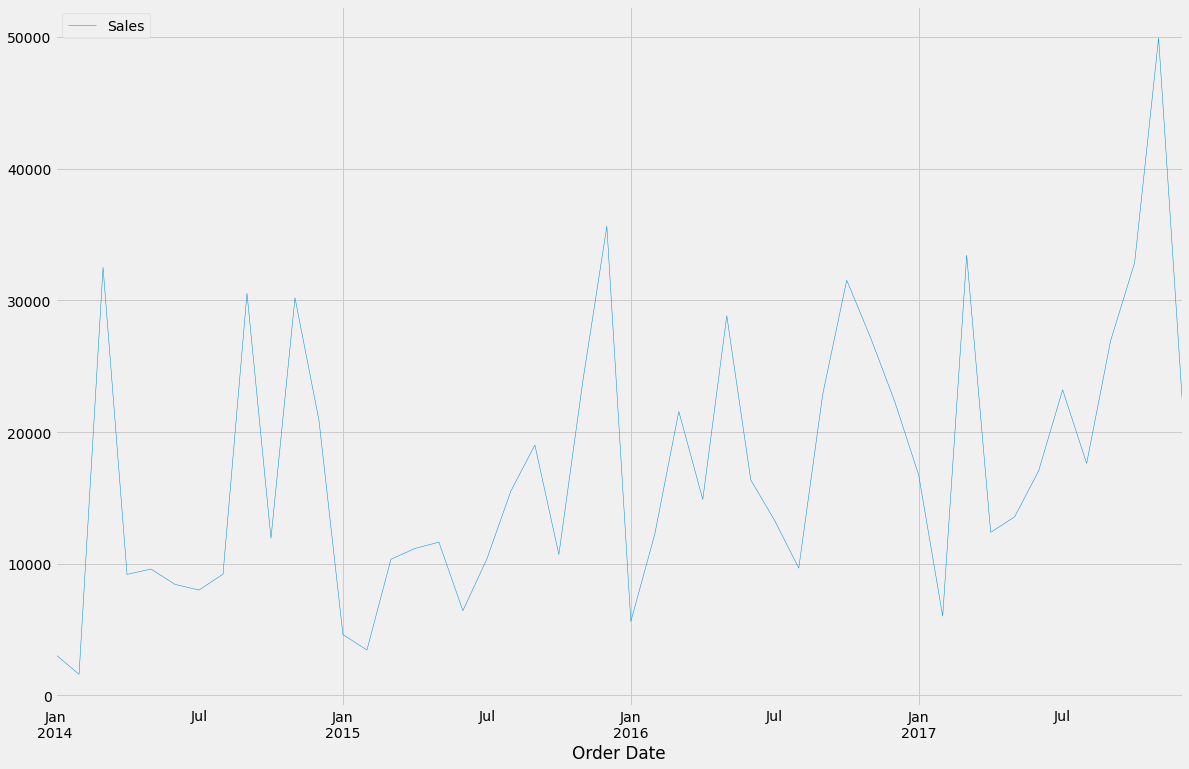

In [ ]:
#Plotting montly sales of all years
cols_plot = ['Sales']
Technology_monthly.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2017'][cols_plot].plot(linewidth=0.5);
Technology_monthly[cols_plot].plot(linewidth=0.5);

In [ ]:
# define a function to check trend and plot

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df,
             marker='.',
             linestyle='-',
             linewidth=0.5,
             color='blue',
             label='Original')

    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o',
             markersize=8,
             linestyle='-',
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()

Slope 1446.437493006992
NRMSE: 0.2998774826179322


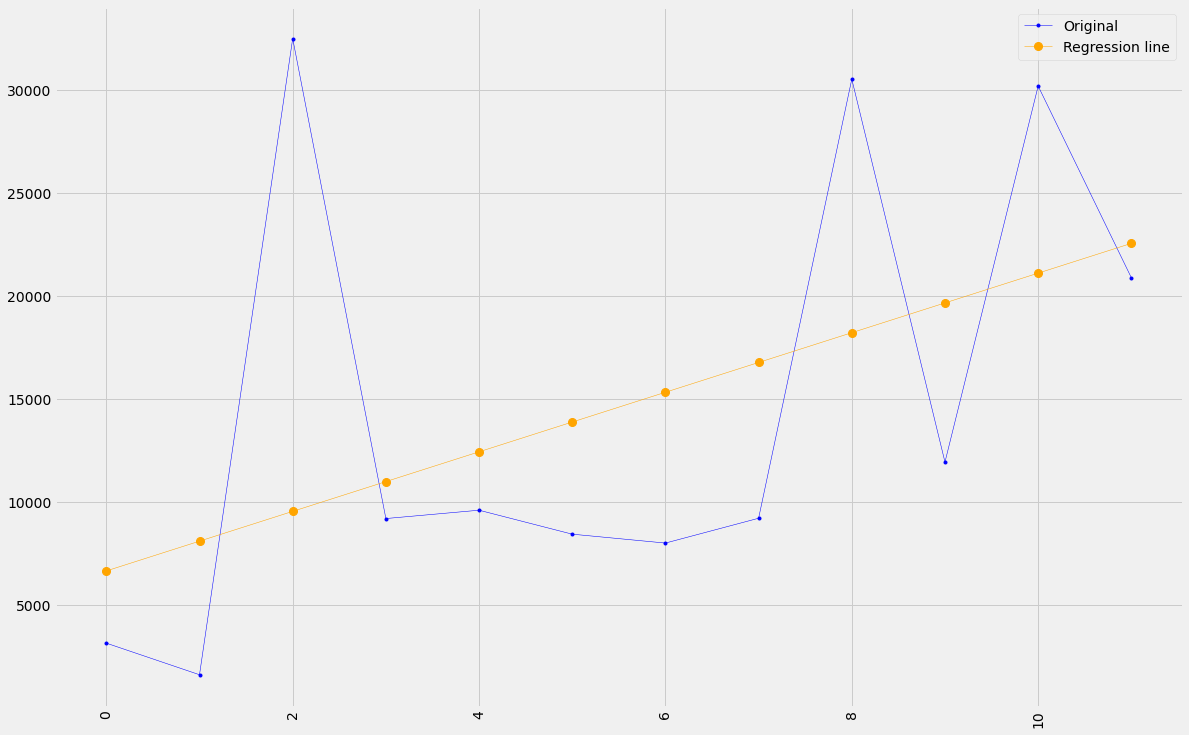

Slope 2035.9554020979017
NRMSE: 0.1567402875440208


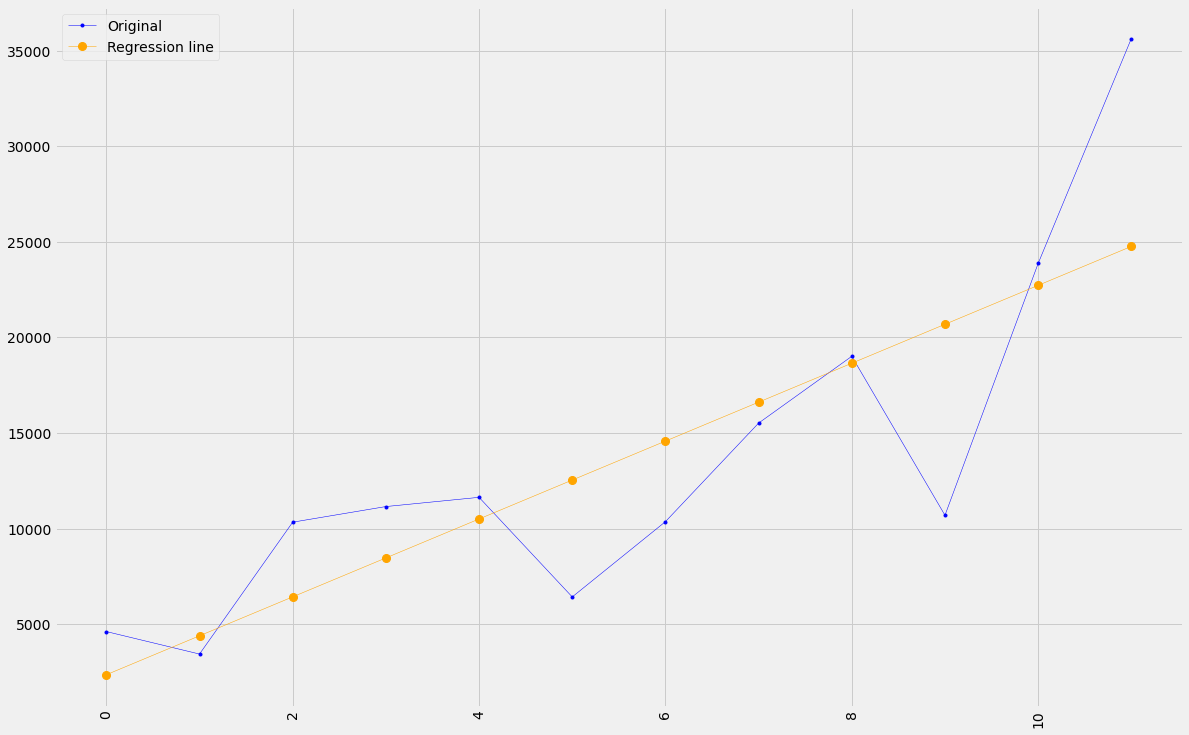

Slope 1282.5458601398589
NRMSE: 0.2454398397355311


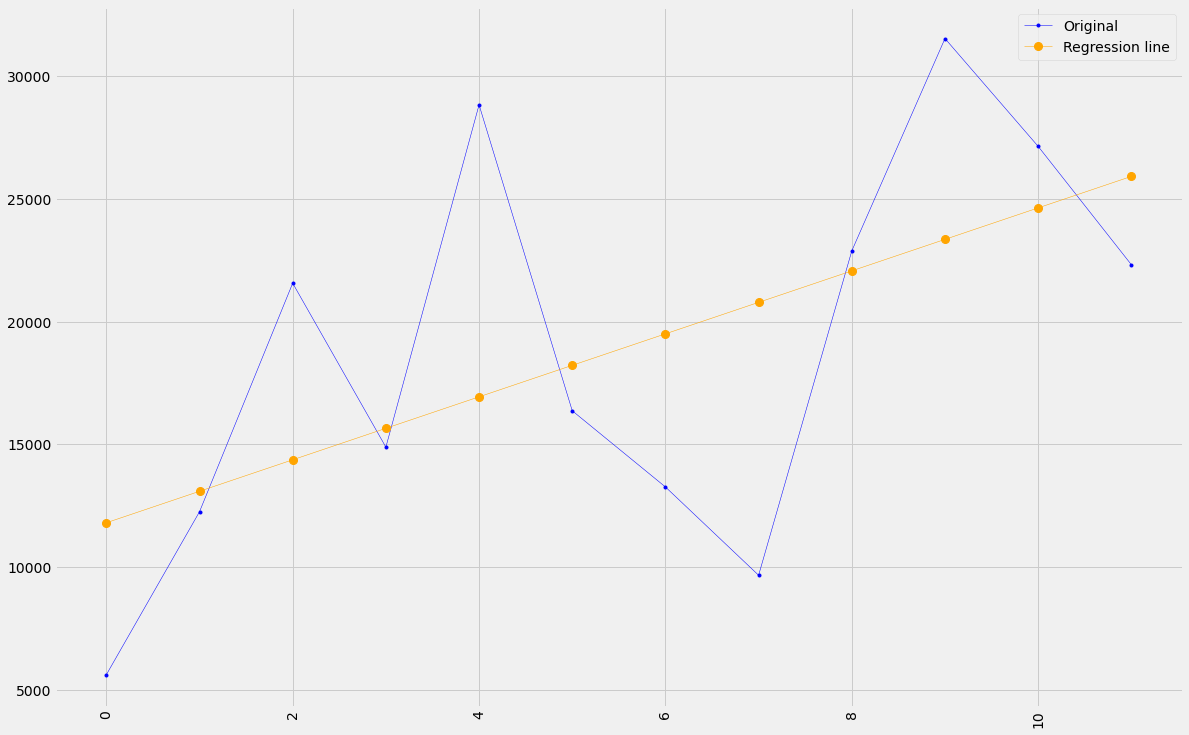

Slope 1887.7205699300696
NRMSE: 0.21100869791110768


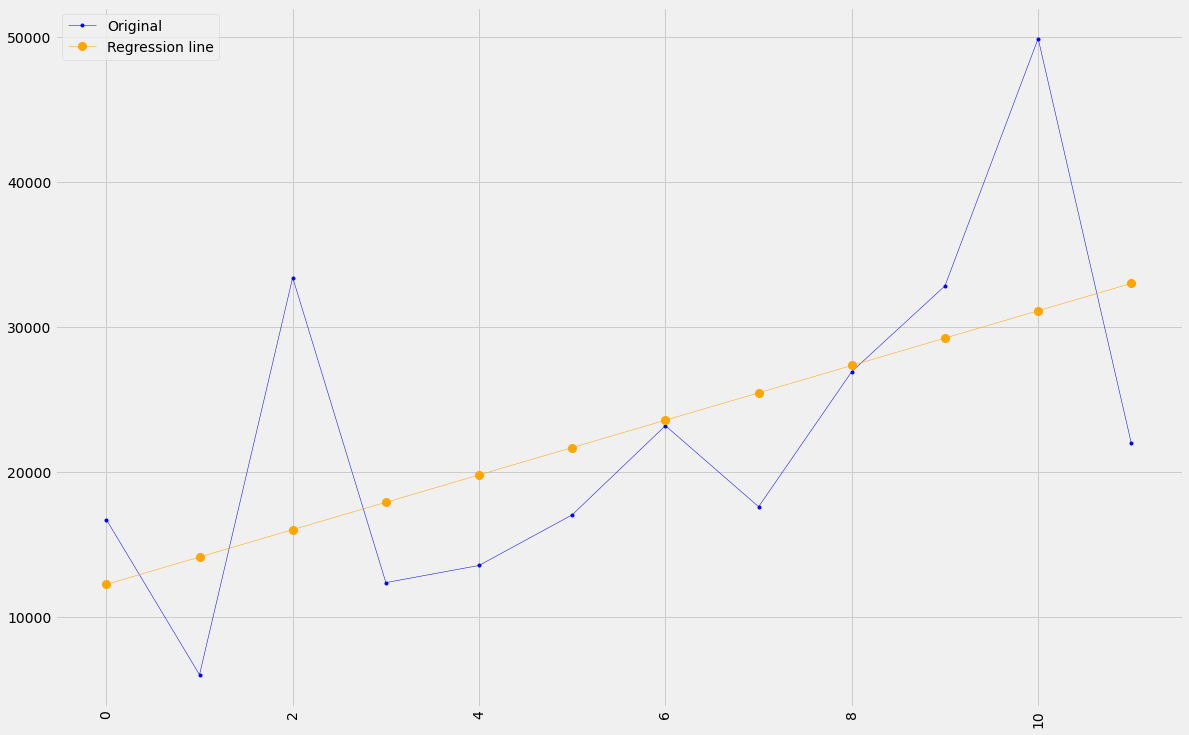

Slope [333.14990377]
NRMSE: 0.19109167565064264


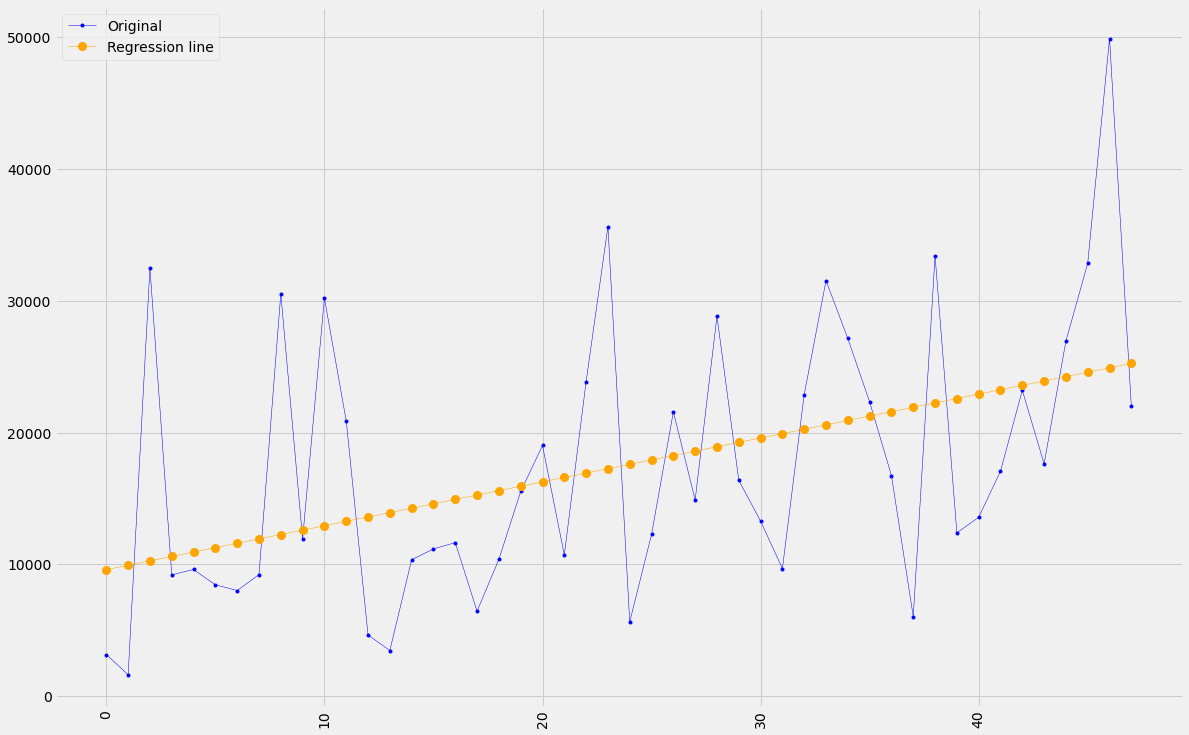

In [ ]:
#check for trend
#the regression line which we get is the trend line
cols_plot = ['Sales']

detect_trend(Technology_monthly.loc['2014']['Sales'].values)
detect_trend(Technology_monthly.loc['2015']['Sales'].values)
detect_trend(Technology_monthly.loc['2016']['Sales'].values)
detect_trend(Technology_monthly.loc['2017']['Sales'].values)
detect_trend(Technology_monthly[cols_plot].values)

Observation: Trend is more visible in the montly sales. Uptrend in sales numbers every year after the month of october, which indicated seasonality.

<AxesSubplot:xlabel='Order Date'>

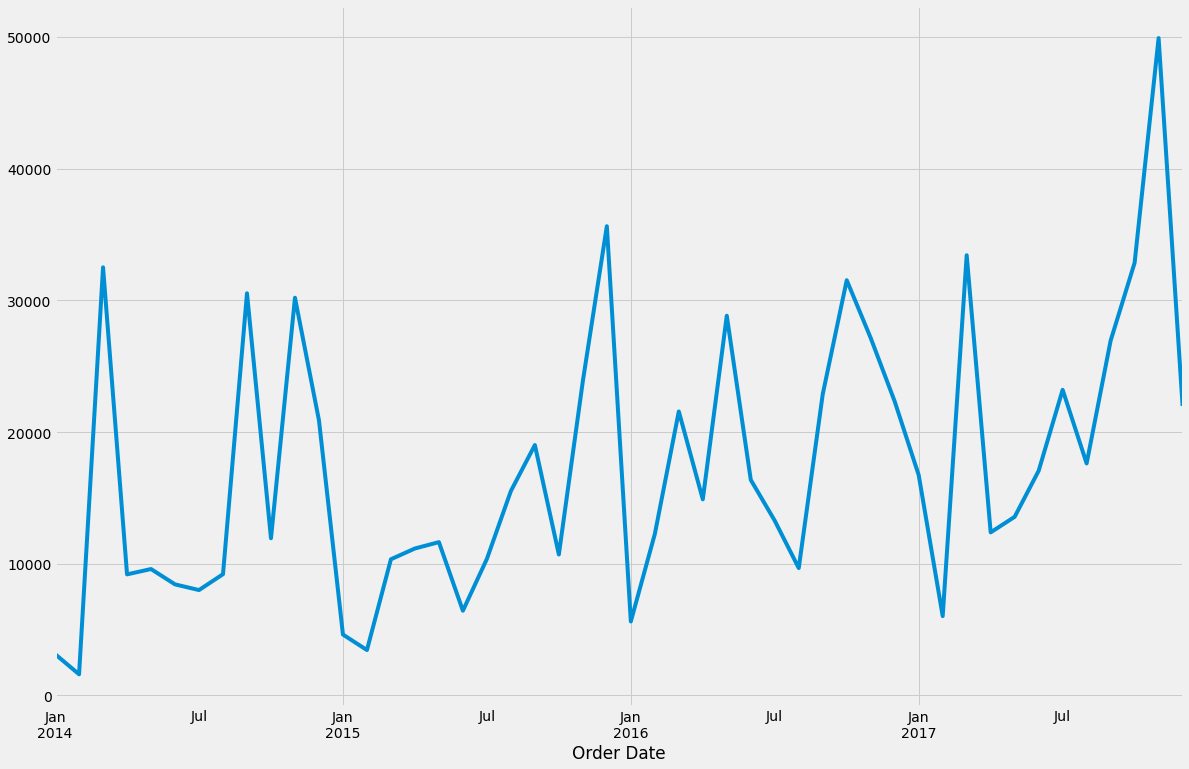

In [ ]:
Technology_monthly['Sales'].plot()

In [ ]:
#Split time series into 2 contiguous sequences.
#Calc the mean and variance of each grp of nos and compare the values
X = Technology_monthly['Sales'].values
split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     =   14085.79, mean2     =   20753.96
variance1 = 93096702.63, variance2 = 97720479.23


Observation: The mean and variance values are different.

Adfuller test for stationarity test:
H0:Time series is not stationary
H1:time series is stationary
If p-value<0.05:Reject H0

In [ ]:
for year in np.unique(Technology.Year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = Technology.loc[str(year)]['Sales'].values

    result = adfuller(X)

    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = Technology['Sales'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))


For the year :  2014
ADF Statistic: -13.348559
p-value: 0.000000
Critical Values:
	   1%:   -3.468
	   5%:   -2.878
	  10%:   -2.576

For the year :  2015
ADF Statistic: -12.599571
p-value: 0.000000
Critical Values:
	   1%:   -3.466
	   5%:   -2.877
	  10%:   -2.575

For the year :  2016
ADF Statistic: -13.891029
p-value: 0.000000
Critical Values:
	   1%:   -3.461
	   5%:   -2.875
	  10%:   -2.574

For the year :  2017
ADF Statistic: -15.631518
p-value: 0.000000
Critical Values:
	   1%:   -3.458
	   5%:   -2.874
	  10%:   -2.573

For the CONSOLIDATED 4 years
ADF Statistic: -28.189457
p-value: 0.000000
Critical Values:
	   1%:   -3.438
	   5%:   -2.865
	  10%:   -2.569


Conclusion: we get p=0 which is less than 0.05=>H0 rejected =>Data is stationary. =>Non-seasonal data.

Reduce noise
Methods used to reduce noise are: Aggregation Smoothing-Moving average Polynomial fitting

1.Smoothing-Moving Average In this approach,we take avg of 'k' consecutive values depending on the frequency of time series. Here we can take the avg over the past 1 yr,i.e.last 12 values. Pandas has specific fns defined for determining rolling statistics.

In [ ]:
ts=Technology_monthly['Sales']

In [ ]:
moving_avg=ts.rolling(window=12).mean()

In [ ]:
moving_avg.head()

Order Date
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
Freq: M, Name: Sales, dtype: float64

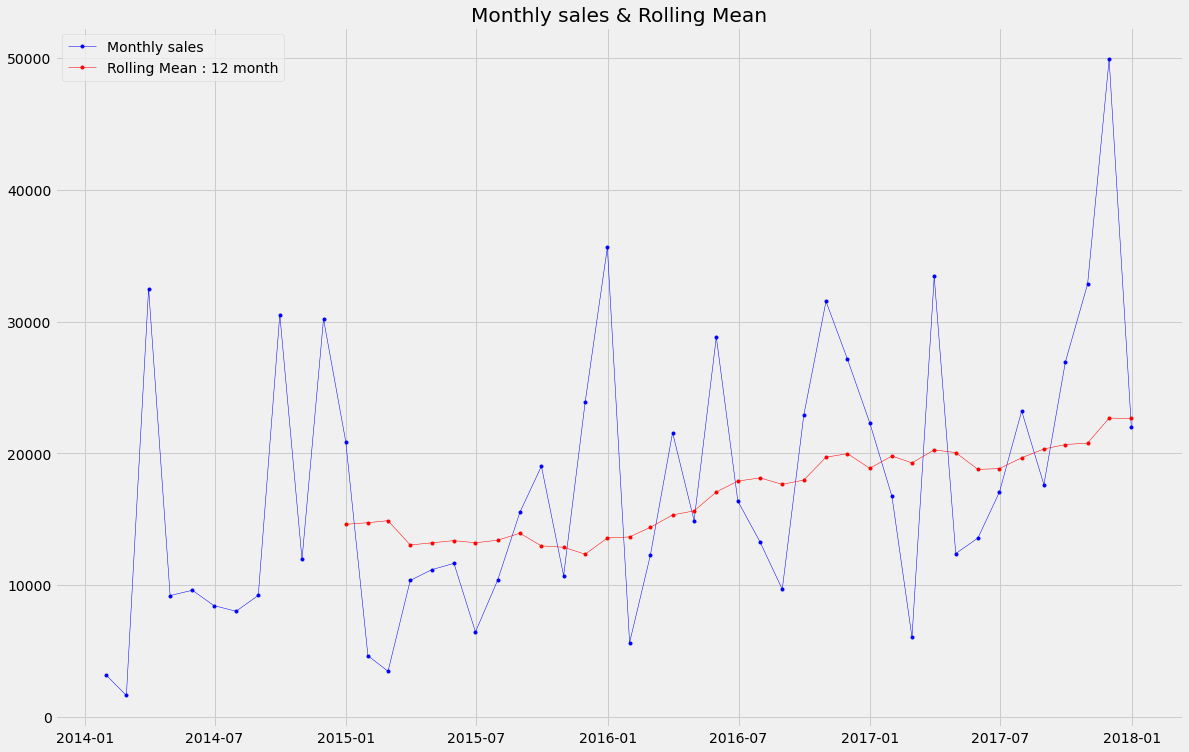

In [ ]:
plt.plot(ts, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

Let the rolling means subtract this from the original series(log transformed).

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.head(12)

Order Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31            NaN
2014-08-31            NaN
2014-09-30            NaN
2014-10-31            NaN
2014-11-30            NaN
2014-12-31    6286.672583
Freq: M, Name: Sales, dtype: float64

In [ ]:
ts_moving_avg_diff.dropna(inplace=True)

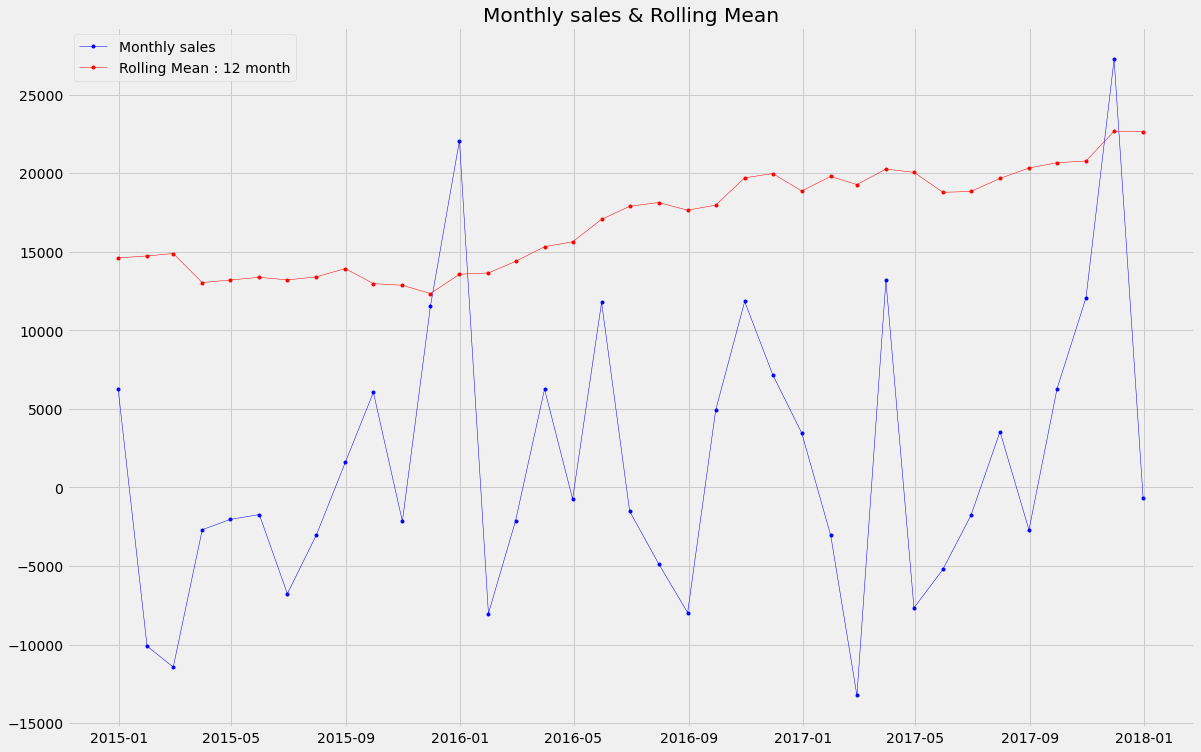

In [ ]:
plt.plot(ts_moving_avg_diff, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

Decomposition of a time series into its components(trend, seasonality,noise):
You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

visualize our data using a method called time-series decomposition that allows us to decompose our time series into 3 distinct components: - trend, - seasonality, and - noise.

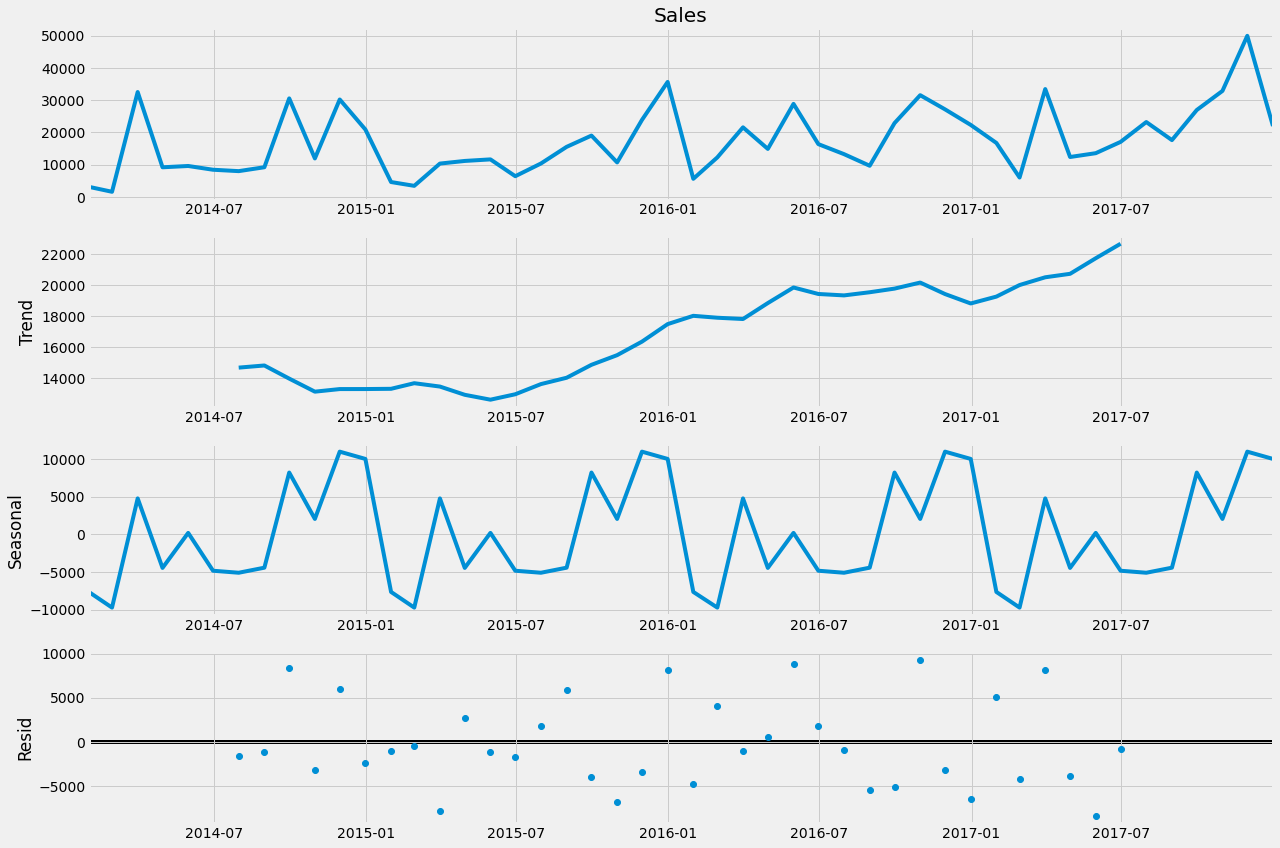

In [ ]:
#Additive Decomposition

rcParams['figure.figsize'] = 18, 12

result_additive = seasonal_decompose(Technology_monthly['Sales'],
                                     model='additive')

fig = result_additive.plot()

ARIMA FORECASTING:
Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models

An ARIMA model is characterized by 3 terms: p, d, q where,

p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

Use ad-fuller test for stationarity check:

In [ ]:
# check stationarity
#H0:Data is non-stationary
#H1:Data is stationary
result = adfuller(Technology.loc['2015']['Sales'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.599571
p-value: 0.000000


Interpretation: We get p=0 which is less than 0.05=>H0 rejected =>Data is stationary

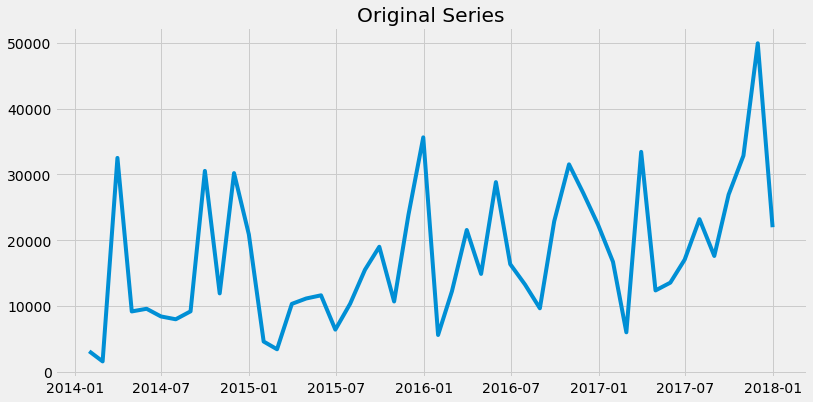

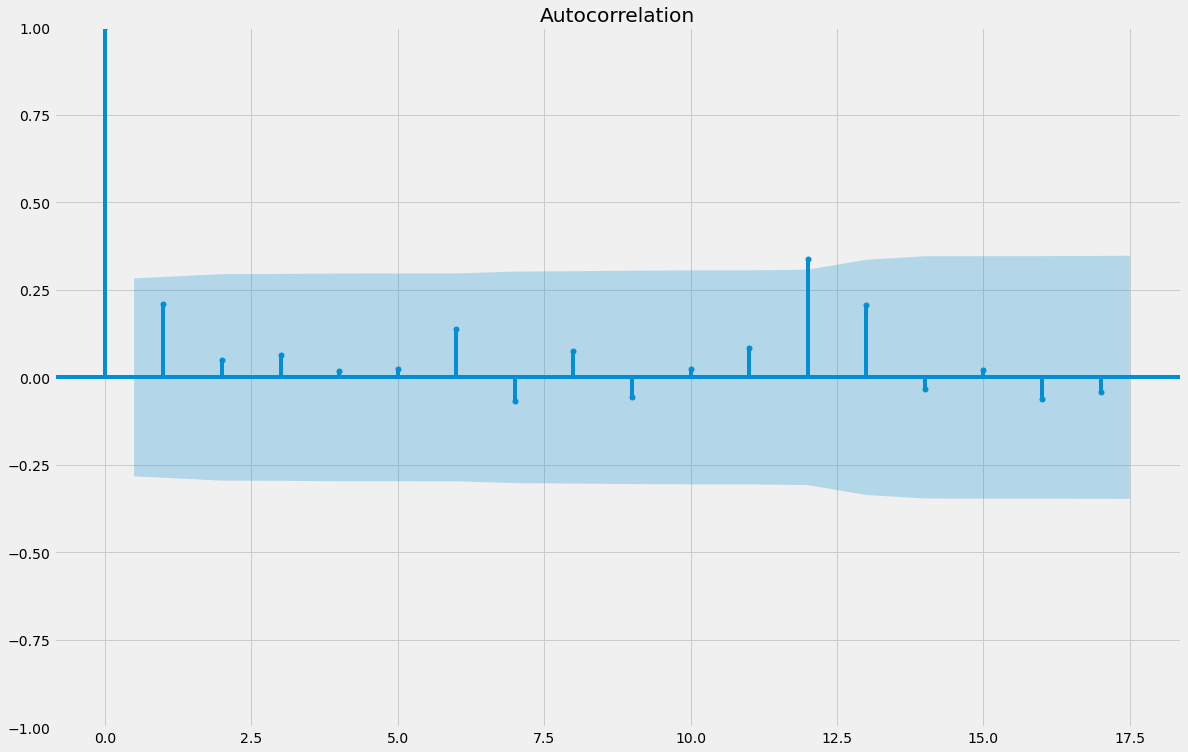

In [ ]:
# Original Series
# fig, axes = plt.subplots(6, 1, sharex=True)
#fig, axes = plt.subplots(3, 2, figsize=(11, 8))
plt.figure(figsize=(12, 6))

plt.plot(ts)
plt.title('Original Series')
acf0 = plot_acf(ts)

Find order of differencing(d):

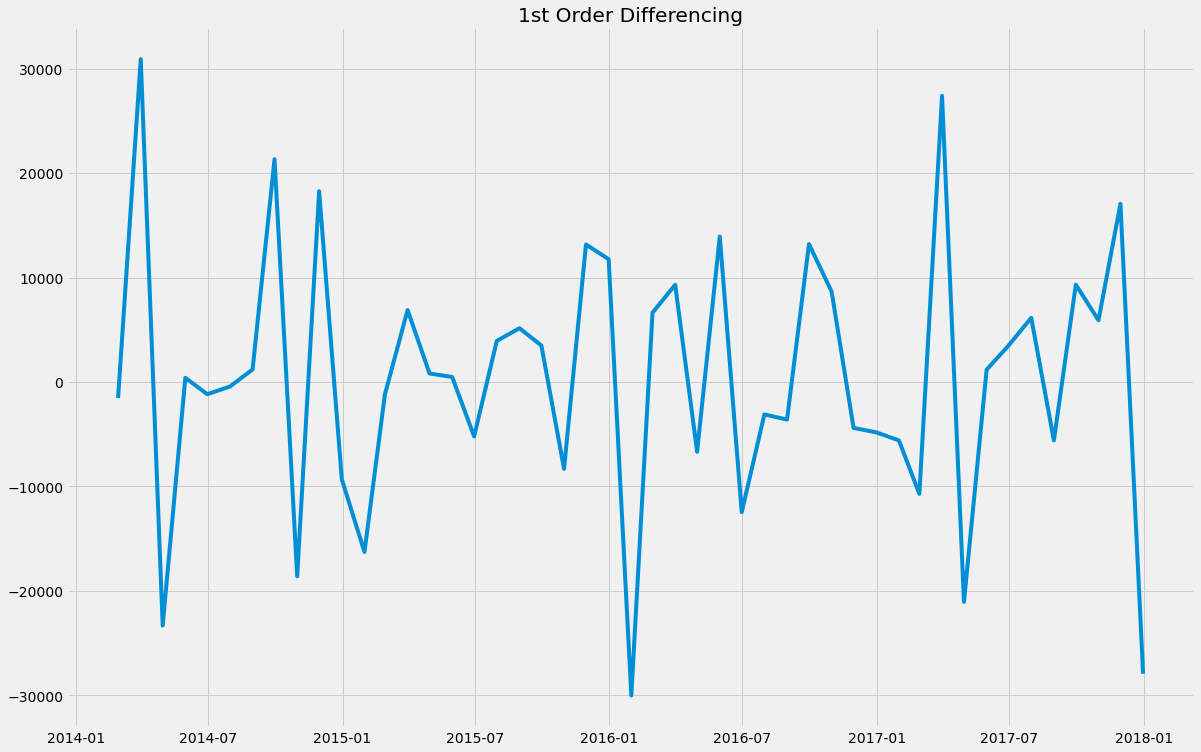

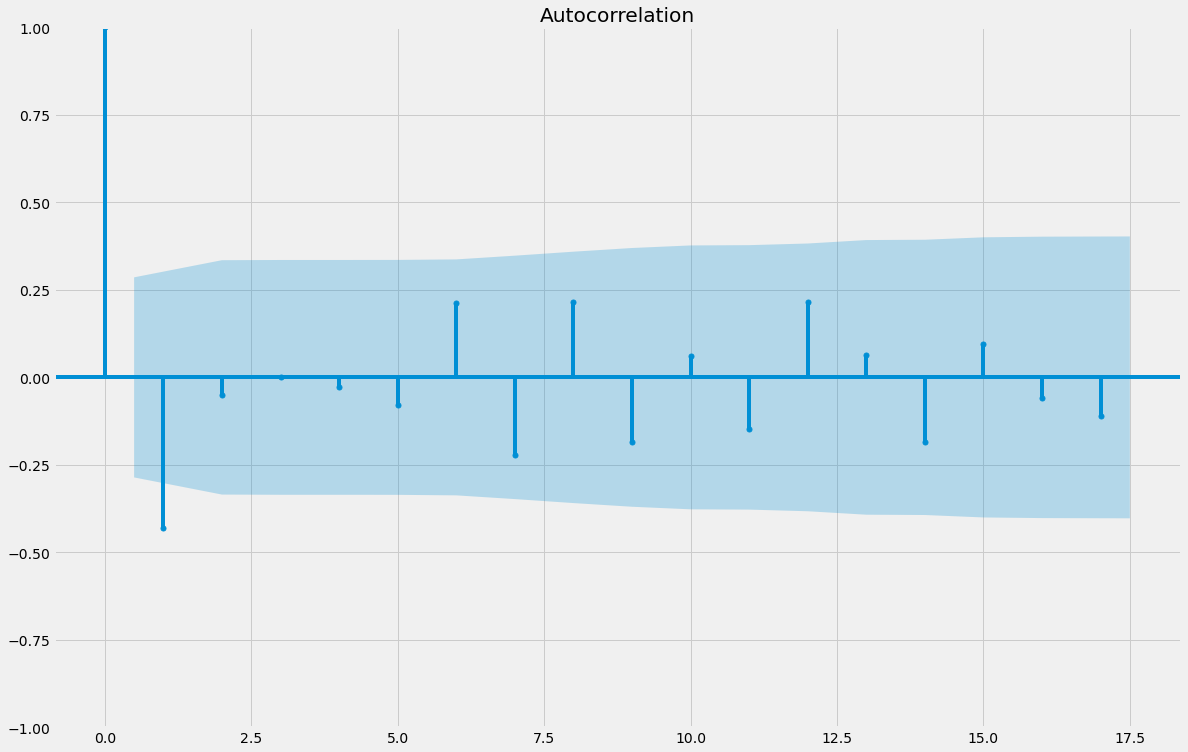

In [ ]:
# 1st order Differencing
plt.plot(ts.diff());
plt.title('1st Order Differencing')
acf1 = plot_acf(ts.diff().dropna())

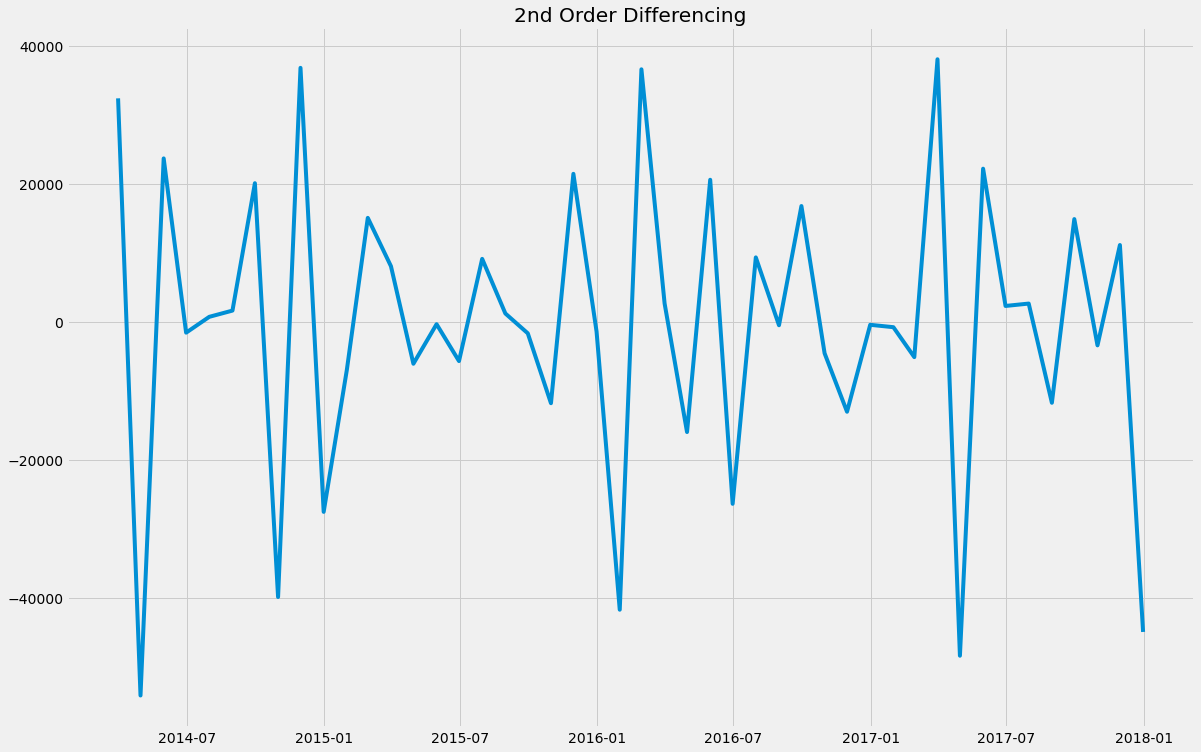

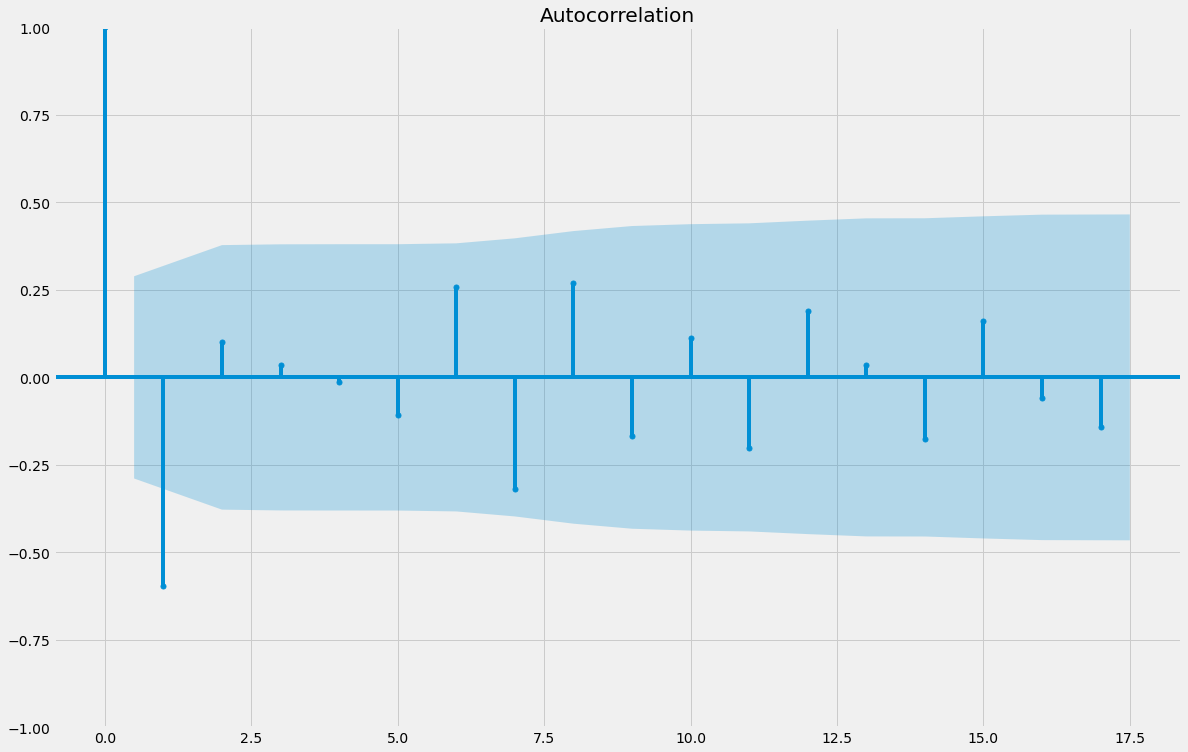

In [ ]:
# 2nd order Differencing
plt.plot(ts.diff().diff());
plt.title('2nd Order Differencing')
acf2 = plot_acf(ts.diff().diff().dropna())

Observation: The time series is stationary without any differencing. In 1st order differencing with lag1,the ACF goes into negative zone, which indicates over differencing. Therefore,d=0

Finding order of MA term(q): MA term is the error of lagged forecast. The ACF tells you how many MA terms are required to remove any autocorrelation in the stationarized series.

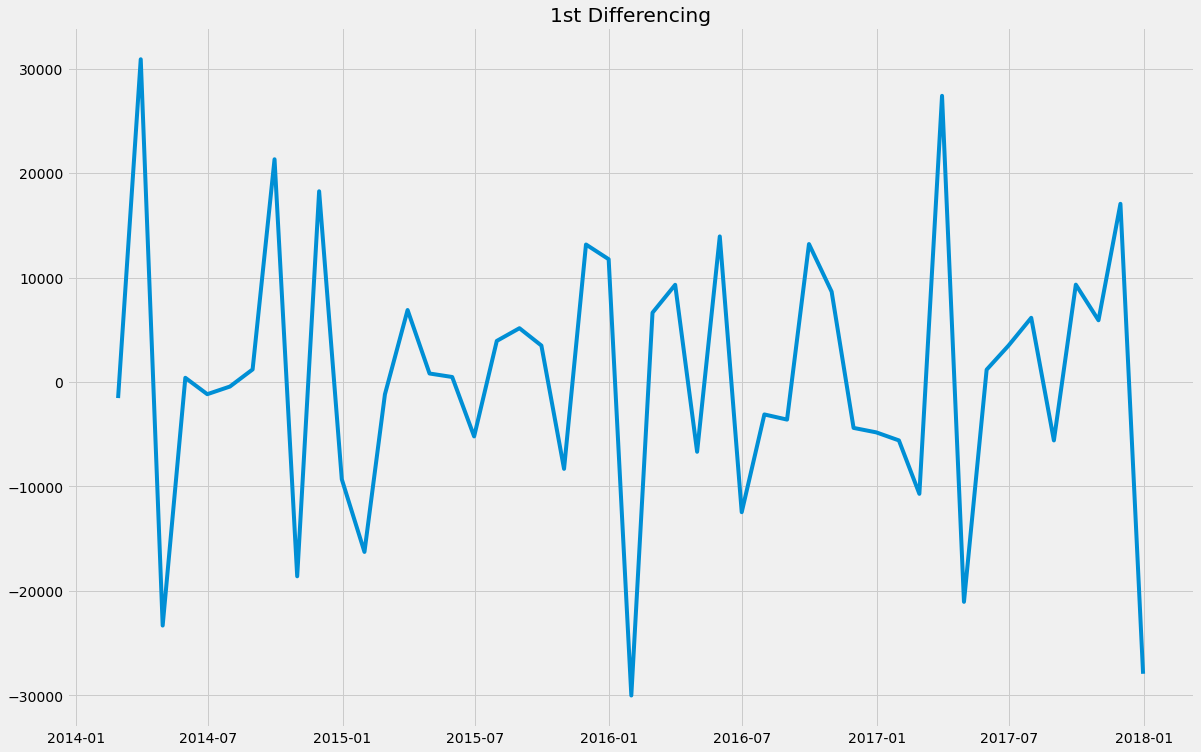

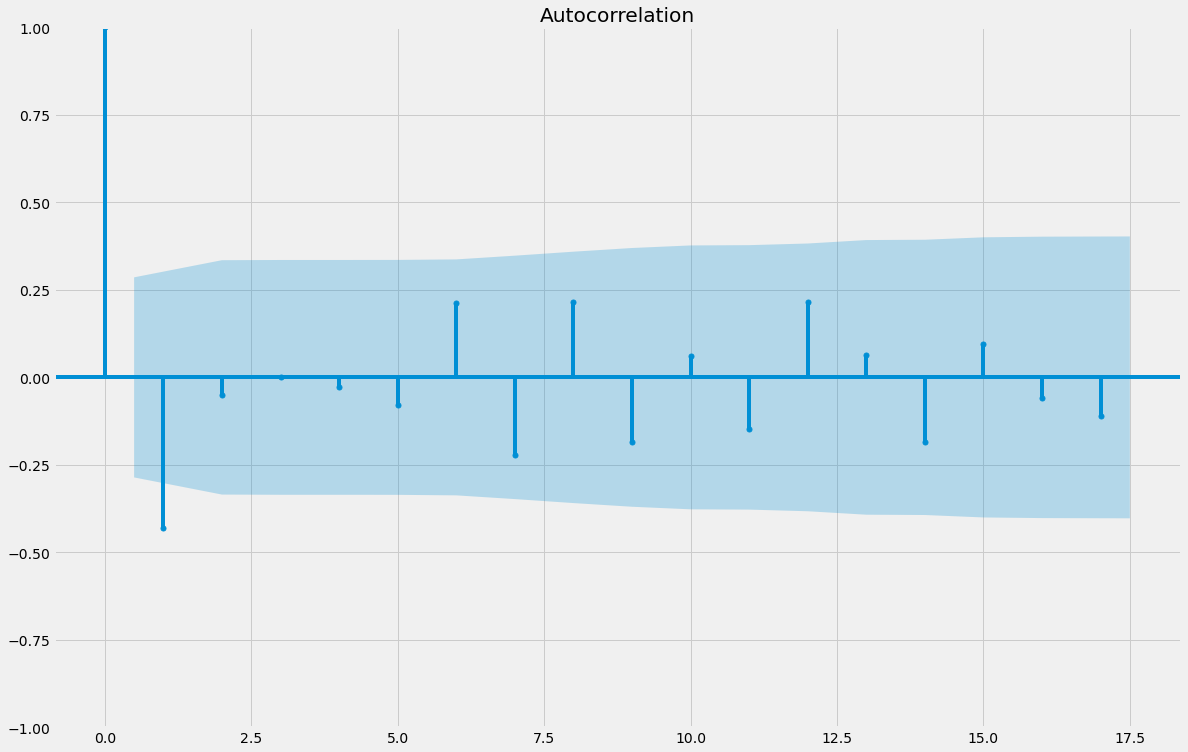

In [ ]:
plt.plot(ts.diff());
plt.title('1st Differencing')

#axes[1].set(ylim=(0,1.2))

acf = plot_acf(ts.diff().dropna())

We see that with lag1,the ACF is going negative Therefore,we take q=0.

Finding p value:

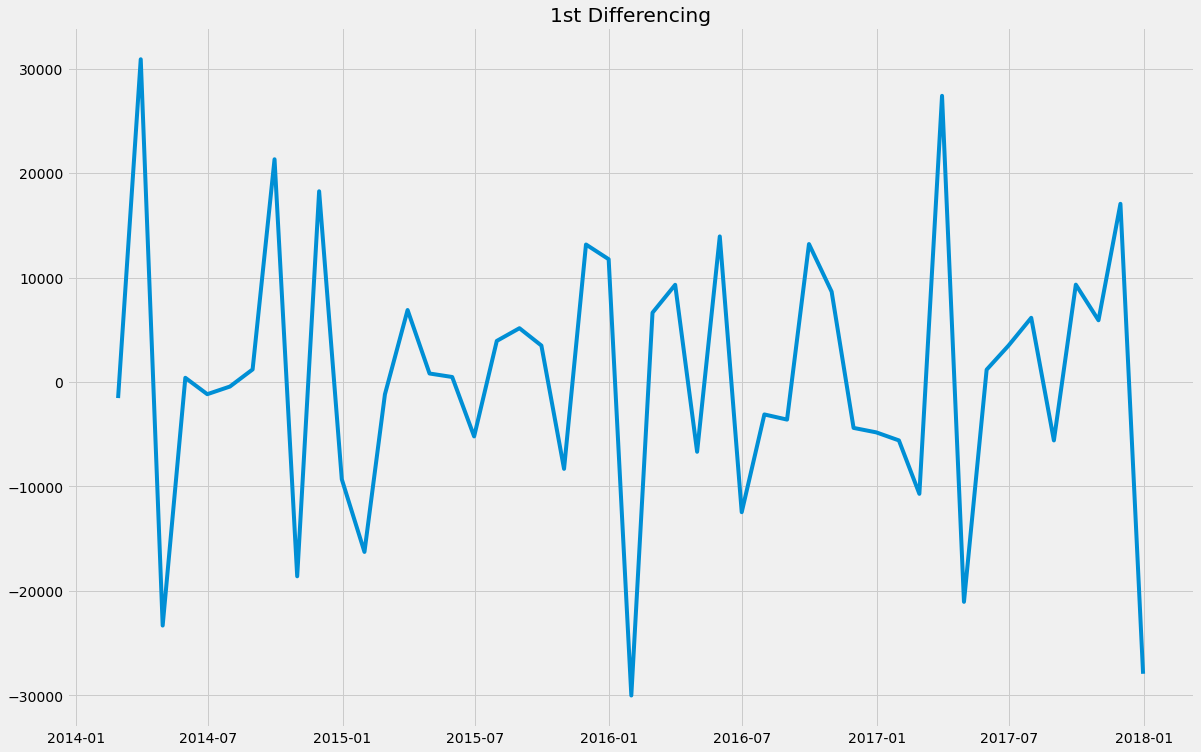

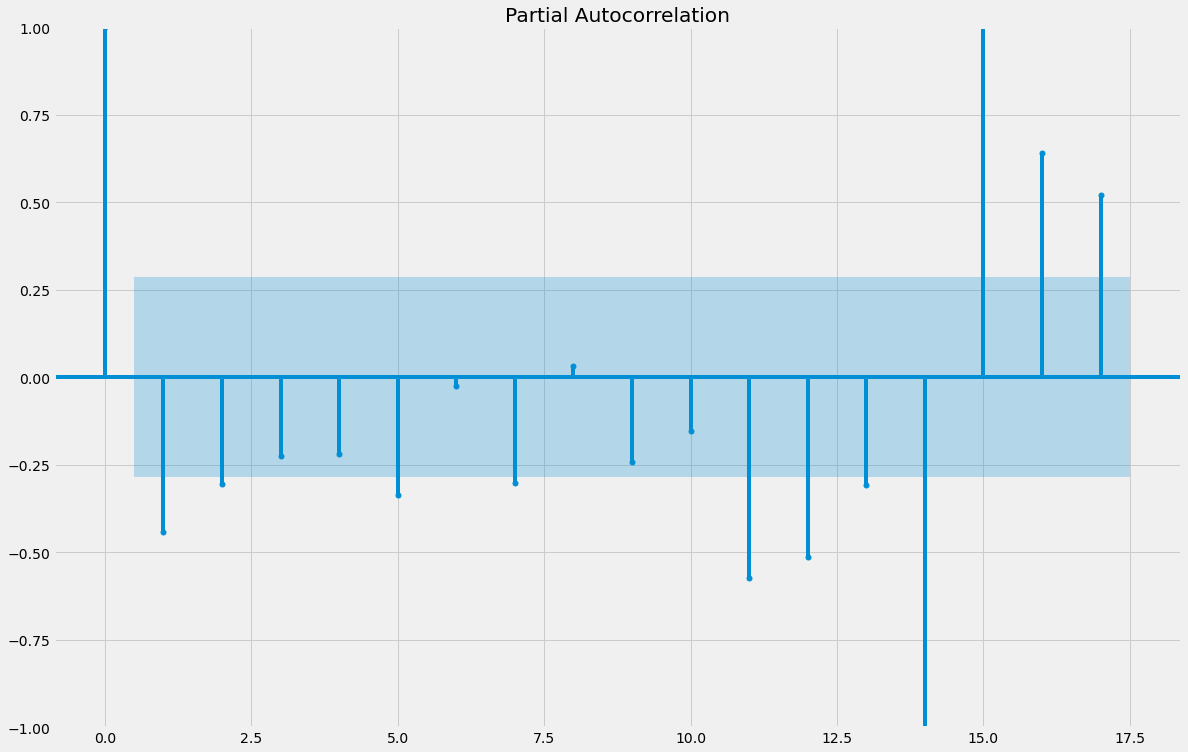

In [ ]:
plt.plot(ts.diff());
plt.title('1st Differencing')

#axes[1].set(ylim=(0,1.2))

pacf = plot_pacf(ts.diff().dropna())

Observation:
    We see that p=0.

In [ ]:
mod_default = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 0, 0),
                                seasonal_order=(1, 0 , 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default = mod_default.fit()

In [ ]:
print(results_default.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -3.6091   8.18e-26  -4.41e+25      0.000      -3.609      -3.609
ma.S.L12   -1.873e+14         -0        inf      0.000   -1.87e+14   -1.87e+14
sigma2      2.922e-13   3.21e-10      0.001      0.999   -6.28e-10    6.29e-10


VALIDATING FORECASTS: We start by comparing predicted values to real values of the time series we set forecasts to start at 2016–12–31 to the end of the data.

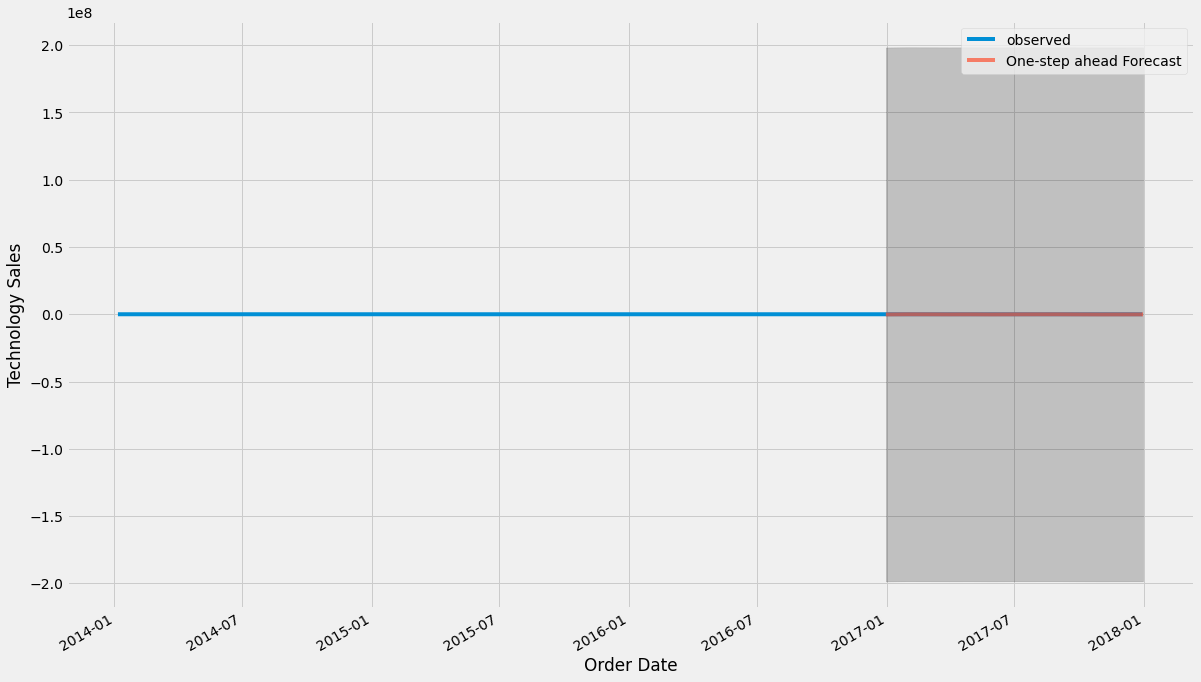

In [ ]:
pred = results_default.get_prediction(start=pd.to_datetime('2016-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = Technology.loc['2014':]['Sales'].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Order Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()
# The line plot is showing the observed values compared to the rolling forecast predictions.
# Overall, our forecasts differs with the true values, but shows an upward trend starts from the
# beginning of the year and captured the seasonality toward the end of the year.

In [ ]:
# Predicted sales values
y_forecasted = pred.predicted_mean
# actual sales values
y_truth = Technology.loc['2016-12-31':]['Sales']

In [ ]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7036213849.59


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 83882.14


Observation:
    We find the mean squared error(i.e. which is the average squared differnence
                                  between actual and predicted)is high.
    =>Model is not forecasted well and line of best fit is not obtaines.



The State Bank of India (SBI) wants to analyse customer attrition using a suitable
machine learning model. Design a pipeline using sklearn machine learning module to
predict whether the customer will leave the banking service offered by SBI using a
suitable dataset of your choice.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/churn.csv")

EXPLORATORY DATA ANALYSIS:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [ ]:
#Dropping the unwanted columns
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
df.head(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#Checking for null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We see that there are no null values present.

In [ ]:
#In Gender columnreplace the lable to number
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

We see that Female has been converted to 0 and male has been converted to 1.

In [ ]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       0   42       2       0.00              1   
1          608     Spain       0   41       1   83807.86              1   
2          502    France       0   42       8  159660.80              3   
3          699    France       0   39       1       0.00              2   
4          850     Spain       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

FEATURE ENGINEERING:

In [ ]:
#Separate features and class labels
y=df["Exited"]#Exited=1->the customer leaves the bank
x=df.drop("Exited",axis=1)

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
x.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       0   42       2       0.00              1   
1          608     Spain       0   41       1   83807.86              1   
2          502    France       0   42       8  159660.80              3   
3          699    France       0   39       1       0.00              2   
4          850     Spain       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [ ]:
#Use one-hot encoder to convert categorical columns which has more than 2 categories
#Geography location
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')#give 1 since "Geography" is in 2nd column and index starts from 0
x=np.array(ct.fit_transform(x))
print(x)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [ ]:
y=y.values#converting to numpy array

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

In [ ]:
# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
# pipe flow is :
# PCA(Dimension reduction to two) -> Scaling the data -> DecisionTreeClassification
pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()),('decision_tree', DecisionTreeClassifier())], verbose=True)
#pipe1 = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()),('random_forest', RandomForestRegressor(max_depth=10,random_state=2))], verbose=True)

In [ ]:
# fitting the data in the pipe
pipe.fit(X_train, y_train)
#pipe1.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.2s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.1s


Pipeline(steps=[('pca', PCA(n_components=2)), ('std', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier())],
         verbose=True)

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

0.6715


Interpretation:We get accuracy to be 67%

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1256  341]
 [ 316   87]]
